# Developing Machine Learning Models for Predicting Atmospheric Emissions

## Scenario:

You have been engaged as a contract data scientist by Athana Data Science Services (ADSS), a small company specialising in the provision of data science consultancy services to public and private sector organisations. ADSS have just been awarded a contract by a government department (the Department of Environment) to help with the development of machine learning-based models for predicting atmospheric emissions (and pollution) from data gathered by various borough and county environment monitoring units. Your team leader wants you to assist with this project, and you will be required to carry out a number of tasks using the Anaconda/Scikit-Learn Python ML framework and its components.

## Note

Note that ADSS will ultimately be working on datasets compiled over a 50-year period, but you will be focusing only on a single year (2013), in the first instance, when developing the ML models.

## Tasks

    1- Identify and describe in some detail at least 3 machine learning algorithms/techniques that you intend to use in 
       your project.  Provide your reasons for selecting those ML methods.
    2- Specify the types of predictive insights you expect to glean from the data after you have applied your ML models.
       Your response should be based on actual inspection of the datasets and should be as specific as possible.
    3- Develop the respective ML models using your Jupyter notebook and Anaconda/Scikit-Learn toolkit to work on the 
       datasets available on the website.
    4- Assess the performance of each model using suitable ML metrics and explain in detail any differences in 
       model performance.

## Used DataSets  

  **Grid Emissions Summary**
  
     1- LAEI2013_Emissions_Summary-CO2_v1.1.xlsx
     2- LAEI2013_Emissions_Summary-NOx_v1.1.xlsx
     3- LAEI2013_Emissions_Summary-PM2.5_v1.1.xlsx
     4- LAEI2013_Emissions_Summary-PM10_v1.1.xlsx
  
  **Road Traffic Data**
  
     1- LAEI2013_2013_AADT-VKM.xlsx
  
       
  **Concentrations**
  
   Modelled 2013 and 2020 concentrations of NO2, NOx, PM10, PM10d and PM2.5 at 20m grid level
       
      1- PostLAEI2013_2013_NO2.csv
      2- PostLAEI2013_2013_NOx.csv
      3- PostLAEI2013_2013_PM10.csv
      4- PostLAEI2013_2013_PM25.csv

### Insights
    
    1- Predictions of future levels of air pollution in different parts of London based on current emissions data. 
    
    2- By analyzing the emission levels in different areas of London, it is possible to pinpoint specific locations where          pollution is more concentrated. This information can then be used to target interventions aimed at reducing                emissions in those particular areas.
    
    3- In general, areas with a higher number of vehicles emitting pollutants into a smaller area are likely to have higher        concentrations of pollutants. This can be correlated with the density of the road network in a given area.

### Approach

        Our approach involves examining the emissions from all sources and analyzing the correlations and behaviors of various features from these sources. Based on this, we consolidated the datasets from the summary, road traffic, and concentration sources for each pollutant (CO2, NOx, PM10, PM25) under consideration.

### <font color='blue'> 1- Importing Required Packages

In [1]:
# 1- Import required libraries
# Baisc libraries

import pandas as pd
## To display all cols in dataframe
pd.set_option('display.max_columns' , None)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
import math
import numpy as np
import warnings
# ignore warning message
warnings.simplefilter("ignore")

# Visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

# sklearn packages
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score,get_scorer_names
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestRegressor




#Other packages
from scipy.stats import linregress


### <font color='blue'> 2- Loading the used datasets 

In [2]:
# 2- Read the all datasets
## Emissions Datasets
emissions_summary_CO2_df       = pd.read_excel('LAEI2013_Emissions_Summary-CO2_v1.1.xlsx', sheet_name = 1, header = 3).query('Year == 2013')
emissions_summary_NOx_df       = pd.read_excel('LAEI2013_Emissions_Summary-NOx_v1.1.xlsx', sheet_name = 1, header = 3).query('Year == 2013')
emissions_summary_PM25_df      = pd.read_excel('LAEI2013_Emissions_Summary-PM2.5_v1.1.xlsx', sheet_name = 1, header = 3).query('Year == 2013')
emissions_summary_PM10_df      = pd.read_excel('LAEI2013_Emissions_Summary-PM10_v1.1.xlsx', sheet_name = 1, header = 3).query('Year == 2013')


In [3]:
## Road Traffic Datasets

road_traffic_major_AADT_VKM_df = pd.read_excel('LAEI2013_2013_AADT-VKM.xlsx', sheet_name = 1) 
road_traffic_minor_VKM_df      = pd.read_excel('LAEI2013_2013_AADT-VKM.xlsx', sheet_name = 2) 

In [4]:
## Concentrations Datasets

concentration_NOx_df   = pd.read_csv('PostLAEI2013_2013_NOx.csv')
concentration_PM10_df  = pd.read_csv('PostLAEI2013_2013_PM10.csv')
concentration_PM25_df  = pd.read_csv('PostLAEI2013_2013_PM25.csv')

### <font color='blue'> 3- Expolring Data Analysis

In [5]:
# 3.1 Changing the Columns name by replacing the space and lowercase for better reading and naming convension
emissions_summary_CO2_df.columns       = emissions_summary_CO2_df.columns.str.replace(' ', '_').str.lower()
emissions_summary_NOx_df.columns       = emissions_summary_NOx_df.columns.str.replace(' ', '_').str.lower()
emissions_summary_PM25_df.columns      = emissions_summary_PM25_df.columns.str.replace(' ', '_').str.lower()
emissions_summary_PM10_df.columns      = emissions_summary_PM10_df.columns.str.replace(' ', '_').str.lower()
road_traffic_major_AADT_VKM_df.columns = road_traffic_major_AADT_VKM_df.columns.str.replace(' ', '_').str.lower()
road_traffic_minor_VKM_df.columns      = road_traffic_minor_VKM_df.columns.str.replace(' ', '_').str.lower()
concentration_NOx_df.columns           = concentration_NOx_df.columns.str.replace(' ', '_').str.lower()
concentration_PM10_df.columns          = concentration_PM10_df.columns.str.replace(' ', '_').str.lower()
concentration_PM25_df.columns          = concentration_PM25_df.columns.str.replace(' ', '_').str.lower()

In [6]:
emissions_summary_CO2_df.head()

year  laei_1km2_id  grid_exactcut_id  easting  northing borough    zone  \
6710  2013          5910                 1   510500    203500  NonGLA  NonGLA   
6711  2013          5911                 2   511500    203500  NonGLA  NonGLA   
6712  2013          5912                 3   512500    203500  NonGLA  NonGLA   
6713  2013          5915                 4   515500    203500  NonGLA  NonGLA   
6714  2013          5916                 5   516500    203500  NonGLA  NonGLA   

      household_and_garden  small_waste_and_accidental_fires  agriculture stw  \
6710                     0                                 0            0   0   
6711                     0                                 0            0   0   
6712                     0                                 0            0   0   
6713                     0                                 0            0   0   
6714                     0                                 0            0   0   

      wts     landfill  nrmm_construction  nrmm_industry  c&d_dust  \
6710    0    30.771862                0.0      17.438226         0   
6711    0     0.000000                0.0       9.876312         0   
6712    0     0.000000                0.0      46.682868         0   
6713    0  7648.680119                0.0      11.833086         0   
6714    0  2647.389495                0.0       0.617749         0   

      domestic_gas  commercial_gas  domestic_other_fuels  \
6710    140.989217      205.551058             33.359346   
6711     79.786433      235.145195             19.031179   
6712    222.424536      235.143255             18.832564   
6713    930.138644      473.992924              5.898459   
6714    962.877492      423.644940              8.588090   

      commercial_other_fuels  industry_part_a  industry_part_b  aviation  \
6710              117.389451              0.0              0.0       0.0   
6711              131.454671              0.0              0.0       0.0   
6712              131.453587              0.0              0.0       0.0   
6713              131.454671              0.0              0.0       0.0   
6714              131.453587              0.0              0.0       0.0   

      passenger_shipping  commercial_shipping  rail_freight  rail_passengers  \
6710                 0.0                  0.0           0.0              0.0   
6711                 0.0                  0.0           0.0              0.0   
6712                 0.0                  0.0           0.0              0.0   
6713                 0.0                  0.0           0.0              0.0   
6714                 0.0                  0.0           0.0              0.0   

      resuspension  motorcycle       taxi   petrol_car   diesel_car  \
6710             0    0.774054   0.723672    56.270062    31.009361   
6711             0   39.496883  96.311449  4371.946372  3629.820262   
6712             0   12.542140  47.097267  1948.728458  1895.523415   
6713             0    0.772024   0.721706    56.084401    30.907046   
6714             0    0.696501   0.651233    50.638572    27.905954   

      electric_car  petrol_lgv   diesel_lgv  electric_lgv    tfl_bus  \
6710             0    0.247012    11.142148             0   1.866641   
6711             0   48.949518  2136.423703             0  74.311546   
6712             0   26.183085  1063.221961             0  11.043148   
6713             0    0.246190    11.105096             0   1.860839   
6714             0    0.222296    10.027279             0   1.678366   

      non-tfl_bus_and_coach    artic_hgv    rigid_hgv         total  
6710               2.119227     1.032639     6.620063    657.304039  
6711             180.493117  2443.494624  1071.847896  14568.389161  
6712              75.213400  1697.340408   603.291676   8034.721767  
6713               2.112639     1.025461     6.598140   9313.431445  
6714               1.905475     0.927474     5.957539   4275.182041

In [7]:
# 3.2 Check the shape for all data sets
print('emissions_summary_CO2_df shape is       '     + str(emissions_summary_CO2_df.shape))
print('emissions_summary_NOx_df shape is       '     + str(emissions_summary_NOx_df.shape))
print('emissions_summary_PM10_df shape is      '     + str(emissions_summary_PM10_df.shape))
print('emissions_summary_PM25_df shape is      '     + str(emissions_summary_PM25_df.shape))
print('emissions_summary_PM25_df shape is      '     + str(emissions_summary_PM25_df.shape))
print('road_traffic_major_AADT_VKM_df shape is '     + str(road_traffic_major_AADT_VKM_df.shape))
print('road_traffic_minor_VKM_df shape is      '     + str(road_traffic_minor_VKM_df.shape))
print('concentration_NOx_df shape is           '     + str(concentration_NOx_df.shape))
print('concentration_PM10_df shape is          '     + str(concentration_PM10_df.shape))
print('concentration_PM25_df shape is          '     + str(concentration_PM25_df.shape))

emissions_summary_CO2_df shape is       (3355, 41)
emissions_summary_NOx_df shape is       (3355, 41)
emissions_summary_PM10_df shape is      (3355, 65)
emissions_summary_PM25_df shape is      (3355, 65)
emissions_summary_PM25_df shape is      (3355, 65)
road_traffic_major_AADT_VKM_df shape is (87996, 44)
road_traffic_minor_VKM_df shape is      (3355, 21)
concentration_NOx_df shape is           (5856428, 4)
concentration_PM10_df shape is          (5856428, 4)
concentration_PM25_df shape is          (5856428, 4)


In [8]:
# 3.3 Check the missing values in all data sets
print('emissions_summary_CO2_df  missing values are =       '  + str(emissions_summary_CO2_df.isnull().sum().sum()))
print('emissions_summary_NOx_df  missing values are =       '  + str(emissions_summary_NOx_df.isnull().sum().sum()))
print('emissions_summary_PM10_df missing values are =       '  + str(emissions_summary_PM10_df.isnull().sum().sum()))
print('emissions_summary_PM25_df missing values are =       '  + str(emissions_summary_PM25_df.isnull().sum().sum()))
print('road_traffic_major_AADT_VKM_df missing values are =  '  + str(road_traffic_major_AADT_VKM_df.isnull().sum().sum()))
print('road_traffic_minor_VKM_df missing values are =       '  + str(road_traffic_minor_VKM_df.isnull().sum().sum()))
print('concentration_NOx_df missing values are =            '  + str(concentration_NOx_df.isnull().sum().sum()))
print('concentration_PM10_df missing values are =           '  + str(concentration_PM10_df.isnull().sum().sum()))
print('concentration_PM25_df missing values are =           '  + str(concentration_PM25_df.isnull().sum().sum()))

emissions_summary_CO2_df  missing values are =       0
emissions_summary_NOx_df  missing values are =       0
emissions_summary_PM10_df missing values are =       0
emissions_summary_PM25_df missing values are =       0
road_traffic_major_AADT_VKM_df missing values are =  0
road_traffic_minor_VKM_df missing values are =       0
concentration_NOx_df missing values are =            0
concentration_PM10_df missing values are =           0
concentration_PM25_df missing values are =           0


In [9]:
# 3.4 Check the duplicates 
print('emissions_summary_CO2_df  has duplicated count =       '  + str(emissions_summary_CO2_df.duplicated().sum()))
print('emissions_summary_NOx_df  has duplicated count =       '  + str(emissions_summary_NOx_df.duplicated().sum()))
print('emissions_summary_PM10_df has duplicated count =       '  + str(emissions_summary_PM10_df.duplicated().sum()))
print('emissions_summary_PM25_df has duplicated count =       '  + str(emissions_summary_PM25_df.duplicated().sum()))
print('road_traffic_major_AADT_VKM_df has duplicated count =  '  + str(road_traffic_major_AADT_VKM_df.duplicated().sum()))
print('road_traffic_minor_VKM_df has duplicated count =       '  + str(road_traffic_minor_VKM_df.duplicated().sum()))
print('concentration_NOx_df has duplicated count =            '  + str(concentration_NOx_df.duplicated().sum()))
print('concentration_PM10_df has duplicated count =           '  + str(concentration_PM10_df.duplicated().sum()))
print('concentration_PM25_df has duplicated count =           '  + str(concentration_PM25_df.duplicated().sum()))

emissions_summary_CO2_df  has duplicated count =       0
emissions_summary_NOx_df  has duplicated count =       0
emissions_summary_PM10_df has duplicated count =       0
emissions_summary_PM25_df has duplicated count =       0
road_traffic_major_AADT_VKM_df has duplicated count =  0
road_traffic_minor_VKM_df has duplicated count =       0
concentration_NOx_df has duplicated count =            0
concentration_PM10_df has duplicated count =           0
concentration_PM25_df has duplicated count =           0


In [10]:
# 3.5 Exploring the first 5 records in each dataset
emissions_summary_CO2_df.head()

year  laei_1km2_id  grid_exactcut_id  easting  northing borough    zone  \
6710  2013          5910                 1   510500    203500  NonGLA  NonGLA   
6711  2013          5911                 2   511500    203500  NonGLA  NonGLA   
6712  2013          5912                 3   512500    203500  NonGLA  NonGLA   
6713  2013          5915                 4   515500    203500  NonGLA  NonGLA   
6714  2013          5916                 5   516500    203500  NonGLA  NonGLA   

      household_and_garden  small_waste_and_accidental_fires  agriculture stw  \
6710                     0                                 0            0   0   
6711                     0                                 0            0   0   
6712                     0                                 0            0   0   
6713                     0                                 0            0   0   
6714                     0                                 0            0   0   

      wts     landfill  nrmm_construction  nrmm_industry  c&d_dust  \
6710    0    30.771862                0.0      17.438226         0   
6711    0     0.000000                0.0       9.876312         0   
6712    0     0.000000                0.0      46.682868         0   
6713    0  7648.680119                0.0      11.833086         0   
6714    0  2647.389495                0.0       0.617749         0   

      domestic_gas  commercial_gas  domestic_other_fuels  \
6710    140.989217      205.551058             33.359346   
6711     79.786433      235.145195             19.031179   
6712    222.424536      235.143255             18.832564   
6713    930.138644      473.992924              5.898459   
6714    962.877492      423.644940              8.588090   

      commercial_other_fuels  industry_part_a  industry_part_b  aviation  \
6710              117.389451              0.0              0.0       0.0   
6711              131.454671              0.0              0.0       0.0   
6712              131.453587              0.0              0.0       0.0   
6713              131.454671              0.0              0.0       0.0   
6714              131.453587              0.0              0.0       0.0   

      passenger_shipping  commercial_shipping  rail_freight  rail_passengers  \
6710                 0.0                  0.0           0.0              0.0   
6711                 0.0                  0.0           0.0              0.0   
6712                 0.0                  0.0           0.0              0.0   
6713                 0.0                  0.0           0.0              0.0   
6714                 0.0                  0.0           0.0              0.0   

      resuspension  motorcycle       taxi   petrol_car   diesel_car  \
6710             0    0.774054   0.723672    56.270062    31.009361   
6711             0   39.496883  96.311449  4371.946372  3629.820262   
6712             0   12.542140  47.097267  1948.728458  1895.523415   
6713             0    0.772024   0.721706    56.084401    30.907046   
6714             0    0.696501   0.651233    50.638572    27.905954   

      electric_car  petrol_lgv   diesel_lgv  electric_lgv    tfl_bus  \
6710             0    0.247012    11.142148             0   1.866641   
6711             0   48.949518  2136.423703             0  74.311546   
6712             0   26.183085  1063.221961             0  11.043148   
6713             0    0.246190    11.105096             0   1.860839   
6714             0    0.222296    10.027279             0   1.678366   

      non-tfl_bus_and_coach    artic_hgv    rigid_hgv         total  
6710               2.119227     1.032639     6.620063    657.304039  
6711             180.493117  2443.494624  1071.847896  14568.389161  
6712              75.213400  1697.340408   603.291676   8034.721767  
6713               2.112639     1.025461     6.598140   9313.431445  
6714               1.905475     0.927474     5.957539   4275.182041

In [11]:
emissions_summary_NOx_df.head()

year  laei_1km2_id  grid_exactcut_id  easting  northing borough    zone  \
6710  2013          5910                 1   510500    203500  NonGLA  NonGLA   
6711  2013          5911                 2   511500    203500  NonGLA  NonGLA   
6712  2013          5912                 3   512500    203500  NonGLA  NonGLA   
6713  2013          5915                 4   515500    203500  NonGLA  NonGLA   
6714  2013          5916                 5   516500    203500  NonGLA  NonGLA   

      household_and_garden  small_waste_and_accidental_fires  agriculture  \
6710              0.003669                          0.000574     0.112469   
6711              0.011739                          0.001173     0.110863   
6712              0.007337                          0.002752     0.123716   
6713              0.011006                          0.001260     0.114076   
6714              0.009538                          0.000293     0.133356   

      stw  wts  landfill  nrmm_construction  nrmm_industry  c&d_dust  \
6710  0.0    0         0                0.0       0.120304         0   
6711  0.0    0         0                0.0       0.068135         0   
6712  0.0    0         0                0.0       0.322059         0   
6713  0.0    0         0                0.0       0.081635         0   
6714  0.0    0         0                0.0       0.004262         0   

      domestic_gas  commercial_gas  domestic_other_fuels  \
6710      0.107189        0.203546              0.035980   
6711      0.060659        0.232852              0.019930   
6712      0.169102        0.232850              0.019833   
6713      0.707152        0.469370              0.006177   
6714      0.732042        0.419513              0.008891   

      commercial_other_fuels  industry_part_a  industry_part_b  aviation  \
6710                0.262809              0.0              0.0       0.0   
6711                0.294406              0.0              0.0       0.0   
6712                0.294404              0.0              0.0       0.0   
6713                0.294406              0.0              0.0       0.0   
6714                0.294404              0.0              0.0       0.0   

      passenger_shipping  commercial_shipping  rail_freight  rail_passengers  \
6710                 0.0                  0.0           0.0              0.0   
6711                 0.0                  0.0           0.0              0.0   
6712                 0.0                  0.0           0.0              0.0   
6713                 0.0                  0.0           0.0              0.0   
6714                 0.0                  0.0           0.0              0.0   

      resuspension  motorcycle      taxi  petrol_car  diesel_car  \
6710             0    0.000844  0.003581    0.079241    0.143207   
6711             0    0.103814  0.330908    4.335216   16.023591   
6712             0    0.030352  0.165532    1.662980    8.536822   
6713             0    0.000841  0.003308    0.086842    0.149491   
6714             0    0.000759  0.003034    0.075509    0.132386   

      electric_car  petrol_lgv  diesel_lgv  electric_lgv   tfl_bus  \
6710             0    0.000663    0.058637             0  0.014423   
6711             0    0.145799    7.589802             0  0.368136   
6712             0    0.076668    3.821292             0  0.081056   
6713             0    0.000704    0.061383             0  0.014378   
6714             0    0.000626    0.054813             0  0.012968   

      non-tfl_bus_and_coach  artic_hgv  rigid_hgv      total  
6710               0.016329   0.006152   0.044135   1.213751  
6711               0.846845   6.742827   4.563411  41.850106  
6712               0.368465   4.531599   2.632886  23.079704  
6713               0.016279   0.006110   0.043989   2.068405  
6714               0.014682   0.005526   0.039718   1.942320

In [12]:
emissions_summary_PM10_df.head()

year  laei_1km2_id  grid_exactcut_id  easting  northing borough    zone  \
6710  2013          5910                 1   510500    203500  NonGLA  NonGLA   
6711  2013          5911                 2   511500    203500  NonGLA  NonGLA   
6712  2013          5912                 3   512500    203500  NonGLA  NonGLA   
6713  2013          5915                 4   515500    203500  NonGLA  NonGLA   
6714  2013          5916                 5   516500    203500  NonGLA  NonGLA   

      household_and_garden  small_waste_and_accidental_fires  agriculture  \
6710              0.000091                          0.006338     0.011741   
6711              0.000290                          0.018299     0.009654   
6712              0.000181                          0.017470     0.011879   
6713              0.000272                          0.017637     0.012895   
6714              0.000236                          0.012895     0.015345   

      stw  wts  landfill  nrmm_construction  nrmm_industry  c&d_dust  \
6710    0  0.0  0.000038                0.0       0.006436       0.0   
6711    0  0.0  0.000000                0.0       0.003645       0.0   
6712    0  0.0  0.000000                0.0       0.017229       0.0   
6713    0  0.0  0.000000                0.0       0.004367       0.0   
6714    0  0.0  0.000000                0.0       0.000228       0.0   

      domestic_gas  commercial_gas  domestic_other_fuels  \
6710      0.001381        0.003075              0.012512   
6711      0.000781        0.003518              0.002802   
6712      0.002178        0.003518              0.003332   
6713      0.009109        0.007091              0.000870   
6714      0.009429        0.006338              0.000745   

      commercial_other_fuels  industry_part_a  industry_part_b  aviation  \
6710                0.032046              0.0              0.0       0.0   
6711                0.036826              0.0              0.0       0.0   
6712                0.036826              0.0              0.0       0.0   
6713                0.036826              0.0              0.0       0.0   
6714                0.036826              0.0              0.0       0.0   

      passenger_shipping  commercial_shipping  rail_freight  rail_passengers  \
6710                 0.0                  0.0           0.0              0.0   
6711                 0.0                  0.0           0.0              0.0   
6712                 0.0                  0.0           0.0              0.0   
6713                 0.0                  0.0           0.0              0.0   
6714                 0.0                  0.0           0.0              0.0   

      resuspension  motorcycle_exhaust  motorcycle_brake  motorcycle_tyre  \
6710      0.010017            0.000095          0.000161         0.000030   
6711      2.655941            0.003849          0.001438         0.000913   
6712      1.557358            0.001041          0.000702         0.000289   
6713      0.009983            0.000095          0.000160         0.000030   
6714      0.009012            0.000086          0.000145         0.000027   

      taxi_exhaust  taxi_brake  taxi_tyre  petrol_car_exhaust  \
6710      0.000234    0.000147   0.000032            0.000508   
6711      0.023470    0.002426   0.002158            0.042770   
6712      0.012192    0.001468   0.001059            0.018498   
6713      0.000169    0.000147   0.000032            0.000506   
6714      0.000164    0.000132   0.000029            0.000457   

      petrol_car_brake  petrol_car_tyre  diesel_car_exhaust  diesel_car_brake  \
6710          0.013777         0.003014            0.006932          0.008175   
6711          0.218739         0.180390            0.449510          0.185208   
6712          0.129670         0.082708            0.231227          0.108975   
6713          0.013732         0.003004            0.008180          0.008148   
6714          0.012398         0.002713            0.006910      

In [13]:
emissions_summary_PM25_df.head()

year  laei_1km2_id  grid_exactcut_id  easting  northing borough    zone  \
24  2013          8137               218   501500    190500  NonGLA  NonGLA   
25  2013          8309               220   501500    189500  NonGLA  NonGLA   
26  2013          8481               222   501500    188500  NonGLA  NonGLA   
27  2013          8653               224   501500    187500  NonGLA  NonGLA   
28  2013          8825               226   501500    186500  NonGLA  NonGLA   

    household_and_garden  small_waste_and_accidental_fires  agriculture  stw  \
24              0.000017                          0.000920     0.012957    0   
25              0.000034                          0.001824     0.008299    0   
26              0.000273                          0.014594     0.009028    0   
27              0.000273                          0.014764     0.011129    0   
28              0.000102                          0.005492     0.009892    0   

    wts  landfill  nrmm_construction  nrmm_industry  c&d_dust  domestic_gas  \
24  0.0  0.000642                0.0       0.000183       0.0      0.000197   
25  0.0  0.000088                0.0       0.000000       0.0      0.002510   
26  0.0  0.000000                0.0       0.000000       0.0      0.007726   
27  0.0  0.000000                0.0       0.000241       0.0      0.006249   
28  0.0  0.000000                0.0       0.000071       0.0      0.004300   

    commercial_gas  domestic_other_fuels  commercial_other_fuels  \
24        0.003562              0.000118                0.108395   
25        0.004083              0.000191                0.066472   
26        0.004280              0.000147                0.042327   
27        0.004279              0.000384                0.042327   
28        0.003098              0.003163                0.042327   

    industry_part_a  industry_part_b  aviation  passenger_shipping  \
24              0.0              0.0  0.000000                 0.0   
25              0.0              0.0  0.000000                 0.0   
26              0.0              0.0  0.000240                 0.0   
27              0.0              0.0  0.001219                 0.0   
28              0.0              0.0  0.000000                 0.0   

    commercial_shipping  rail_freight  rail_passengers  resuspension  \
24                  0.0       0.00000          0.00000      0.059313   
25                  0.0       0.00000          0.00000      0.075796   
26                  0.0       0.01047          0.17593      0.075332   
27                  0.0       0.00000          0.00000      0.081276   
28                  0.0       0.00000          0.00000      0.076636   

    motorcycle_exhaust  motorcycle_brake  motorcycle_tyre  taxi_exhaust  \
24            0.001965          0.000468         0.000409      0.013387   
25            0.002540          0.000705         0.000539      0.016485   
26            0.002535          0.000733         0.000541      0.016192   
27            0.003524          0.001010         0.000714      0.017490   
28            0.002578          0.000770         0.000552      0.015859   

    taxi_brake  taxi_tyre  petrol_car_exhaust  petrol_car_brake  \
24    0.000735   0.000931            0.020682          0.063714   
25    0.001071   0.001213            0.026470          0.094548   
26    0.001121   0.001213            0.026335          0.099006   
27    0.001410   0.001420            0.032489          0.129337   
28    0.001158   0.001235            0.026593          0.102953   

    petrol_car_tyre  diesel_car_exhaust  diesel_car_brake  diesel_car_tyre  \
24         0.070094            0.259640          0.072627         0.081365   
25         0.091829            0.326346          0.106994         0.106157   
26         0.091979            0.322585          0.111835         0.106186   
27         0.113214            0.361697          0.130788         0.118935   
28         0.093716            0.322996          0.116419         

In [14]:
road_traffic_major_AADT_VKM_df.head()

rowid  year              toid  grid_exactcut_id location_exactcut  \
0      1  2013  4000000030472390               836             Outer   
1      2  2013  4000000030478841              2217             Outer   
2      3  2013  4000000030128707               282          External   
3      4  2013  4000000030132311               873             Outer   
4      5  2013  4000000030132311              2930             Outer   

  boroughname_exactcut   tlrn motorwaynumber  aadt_motorcycle   aadt_taxi  \
0           Hillingdon  Other          Other        88.301916   77.112580   
1           Hillingdon  Other          Other        88.301916   77.112580   
2               NonGLA  Other          Other       310.363572  100.322495   
3           Hillingdon  Other          Other        39.473081  144.548284   
4           Hillingdon  Other          Other        39.473081  144.548284   

      aadt_pcar    aadt_dcar  aadt_plgv    aadt_dlgv  aadt_ltbus  aadt_coach  \
0   4093.961441  2429.165893  21.502284  1080.377347  235.453345   74.723988   
1   4093.961441  2429.165893  21.502284  1080.377347  235.125653   74.723988   
2  10087.319861  5985.345419  39.934745  2006.512158   53.436368   39.957689   
3   7709.574508  4574.502157  27.580811  1385.791535   16.741434    6.123638   
4   7709.574508  4574.502157  27.580811  1385.791535   16.741434    6.123638   

   aadt_rigid2axle  aadt_rigid3axle  aadt_rigid4axle  aadt_artic3axle  \
0       147.036213        28.026842        19.541540         8.106493   
1       147.036213        28.026842        19.541540         8.106493   
2       312.273405        72.614170        69.001679        41.253397   
3       507.392837       106.440958        53.151045        24.428295   
4       507.392837       106.440958        53.151045        24.428295   

   aadt_artic5axle  aadt_artic6axle  aadt_electriccar  aadt_electriclgv  \
0         5.492629         1.999639          2.170702          0.618469   
1         5.492629         1.999639          2.170702          0.618469   
2        47.428538        39.717406          5.348502          1.148642   
3        42.324228       101.675382          4.087773          0.793306   
4        42.324228       101.675382          4.087773          0.793306   

     aadt_total  speed_(kph)  length_(m)  vkm_motorcycle     vkm_taxi  \
0   8313.591321    36.938200    5.472146      176.368343   154.019511   
1   8313.263629    35.285178    3.605559      116.207872   101.482382   
2  19211.978046    49.065141  113.618491    12871.009867  4160.449042   
3  14744.629271    49.173100   52.797356      760.687130  2785.595031   
4  14744.629271    49.173100  179.504952     2586.248957  9470.703474   

        vkm_pcar       vkm_dcar     vkm_plgv      vkm_dlgv    vkm_ltbus  \
0    8177.004838    4851.853527    42.947224   2157.873473   470.278768   
1    5387.771477    3196.852461    28.297627   1421.807786   309.432150   
2  418328.713029  248216.759321  1656.123809  83211.562650  2216.046236   
3  148571.479776   88155.390937   531.510766  26705.637104   322.624763   
4  505125.983487  299718.213847  1807.075618  90796.101831  1096.887173   

     vkm_coach  vkm_rigid2axle  vkm_rigid3axle  vkm_rigid4axle  \
0   149.248696      293.680300       55.978941       39.030966   
1    98.338925      193.503902       36.884134       25.717231   
2  1657.075319    12950.212101     3011.364039     2861.551314   
3   118.008843     9777.985094     2051.227418     1024.275647   
4   401.216526    33244.027352     6973.937855     3482.419671   

   vkm_artic3axle  vkm_artic5axle  vkm_artic6axle  vkm_electriccar  \
0       16.191367       10.970609        3.993946         4.335614   
1       10.668379        7.228458        2.631583         2.856706   
2     1710.809301     1966.897025     1647.110606       221.806380   
3      470.758531      815.631678     1959.389833        78.775616   
4     1600.524988     2773.054115     6661.700602       267.828056   

   vkm_electriclgv      vkm_

In [15]:
road_traffic_minor_VKM_df.head()

year    id  grid_exactcut_id location_exactcut boroughname_exactcut  \
0  2013  5910                 1          External               NonGLA   
1  2013  5911                 2          External               NonGLA   
2  2013  5912                 3          External               NonGLA   
3  2013  5915                 4          External               NonGLA   
4  2013  5916                 5          External               NonGLA   

   easting  northing  speed_(kph)  vkm_motorcycle     vkm_taxi  vkm_bus  \
0   510500    203500           30     7223.168225  3303.116745      0.0   
1   511500    203500           30     4742.141375  2167.935313      0.0   
2   512500    203500           30     7278.285529  3327.995491      0.0   
3   515500    203500           30     7204.224780  3294.143071      0.0   
4   516500    203500           30     6499.471249  2972.477278      0.0   

     vkm_coach    vkm_rigid   vkm_artic  vkm_petrolcar  vkm_dieselcar  \
0  4513.072361  7680.054517  853.427764  309599.517097  183701.922502   
1  2962.995481  5041.590112  559.699517  203270.767843  120611.398853   
2  4548.852095  7740.195812  860.663552  312015.145930  185135.244055   
3  4499.043482  7654.621079  847.495192  308578.002296  183095.803234   
4  4057.870123  6911.448474  766.513286  278614.894550  165317.091727   

   vkm_electriccar  vkm_petrollgv  vkm_diesellgv  vkm_electriclgv  \
0       164.155952    1083.285552   54429.435225        31.158503   
1       107.778290     711.243897   35736.287198        20.457482   
2       165.436767    1091.752757   54854.868005        31.402045   
3       163.614324    1079.683190   54248.435380        31.054888   
4       147.727276     974.893390   48983.295782        28.040823   

       vkm_total  
0  572582.314443  
1  375932.295360  
2  577049.842037  
3  570696.120915  
4  515273.723959

In [16]:
concentration_NOx_df.head()

x       y     conct  year
0  501460  170580  49.21837  2013
1  501460  170600  49.78666  2013
2  501460  170620  50.36728  2013
3  501460  170640  50.94635  2013
4  501460  170660  51.51179  2013

In [17]:
concentration_PM10_df.head()

x       y     conct  year
0  501460  170580  23.74403  2013
1  501460  170600  23.78645  2013
2  501460  170620  23.82961  2013
3  501460  170640  23.87249  2013
4  501460  170660  23.91457  2013

In [18]:
concentration_PM25_df.head()

x       y     conct  year
0  501460  170580  14.90253  2013
1  501460  170600  14.91900  2013
2  501460  170620  14.93577  2013
3  501460  170640  14.95249  2013
4  501460  170660  14.96894  2013

In [19]:
# 3.6- Calculate the rank of emission per Borough and Zone for better visulizations and query
emissions_summary_CO2_df = emissions_summary_CO2_df.assign(borough_rank = (
                                                           emissions_summary_CO2_df.groupby(['borough'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )
emissions_summary_CO2_df = emissions_summary_CO2_df.assign(zone_rank = (
                                                           emissions_summary_CO2_df.groupby(['zone'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )

In [20]:
emissions_summary_NOx_df = emissions_summary_NOx_df.assign(borough_rank = (
                                                           emissions_summary_NOx_df.groupby(['borough'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )
emissions_summary_NOx_df = emissions_summary_NOx_df.assign(zone_rank = (
                                                           emissions_summary_NOx_df.groupby(['zone'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )

In [21]:
emissions_summary_PM10_df = emissions_summary_PM10_df.assign(borough_rank = (
                                                           emissions_summary_PM10_df.groupby(['borough'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )
emissions_summary_PM10_df = emissions_summary_PM10_df.assign(zone_rank = (
                                                           emissions_summary_PM10_df.groupby(['zone'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )

In [22]:
emissions_summary_PM25_df = emissions_summary_PM25_df.assign(borough_rank = (
                                                           emissions_summary_PM25_df.groupby(['borough'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )
emissions_summary_PM25_df = emissions_summary_PM25_df.assign(zone_rank = (
                                                           emissions_summary_PM25_df.groupby(['zone'])['total']
                                                           .rank(method='min', ascending=False)
                                                           .astype(int)
                                                                          )
                                                          )

In [23]:
## Get Top four Borough of co2 per zone (we have 4 zones)
emissions_summary_CO2_df.nsmallest(16, 'zone_rank')

year  laei_1km2_id  grid_exactcut_id  easting  northing  \
6943   2013         10599               234   555500    176500   
7325   2013          7827               616   535500    192500   
8281   2013         10235              1572   535500    178500   
10014  2013          9885              3305   529500    180500   
6941   2013         10428               232   556500    177500   
7568   2013          9898               859   542500    180500   
9307   2013          6968              2598   536500    197500   
10052  2013          9712              3343   528500    181500   
7540   2013          9561               831   549500    182500   
8214   2013          9556              1505   544500    182500   
8962   2013         10204              2253   504500    178500   
10064  2013          9716              3355   532500    181500   
7576   2013         10032               867   504500    179500   
7601   2013         10226               892   526500    178500   
8217   2013          9560              1508   548500    182500   
10062  2013          9714              3353   530500    181500   

                      borough     zone  household_and_garden  \
6943                   NonGLA   NonGLA                     0   
7325                  Enfield    Outer                     0   
8281                 Lewisham    Inner                     0   
10014     City of Westminster  Central                     0   
6941                   NonGLA   NonGLA                     0   
7568                   Newham    Inner                     0   
9307                  Enfield    Outer                     0   
10052     City of Westminster  Central                     0   
7540     Barking and Dagenham    Outer                     0   
8214                   Newham    Inner                     0   
8962                   NonGLA   NonGLA                     0   
10064                    City  Central                     0   
7576                   NonGLA   NonGLA                     0   
7601   Kensington and Chelsea    Inner                     0   
8217     Barking and Dagenham    Outer                     0   
10062                  Camden  Central                     0   

       small_waste_and_accidental_fires  agriculture    stw  wts  \
6943                                  0            0  33000    0   
7325                                  0            0      0    0   
8281                                  0            0      0    0   
10014                                 0            0      0    0   
6941                                  0            0      0    0   
7568                                  0            0      0    0   
9307                                  0            0      0    0   
10052                                 0            0      0    0   
7540                                  0            0      0    0   
8214                                  0            0      0    0   
8962                                  0            0      0    0   
10064                                 0            0      |    0   
7576                                  0            0      0    0   
7601                                  0            0      0    0   
8217                                  0            0      0    0   
10062                                 0            0      0    0   

           landfill  nrmm_construction  nrmm_industry  c&d_dust  domestic_gas  \
6943    7797.780629           0.000000       3.814604         0    265.774013   
7325     136.791804           0.000000     521.692283         0    531.954994   
8281       0.000000           0.000000      72.881422         0   1435.466870   
10014      0.000000         682.030200     402.246642         0   3885.429208   
6941       0.000000           0.000000     162.226314         0    142.608483   
7568       0.000000           3.819115       7.577362         0   1299.713904   
9307       0.000000           0.000000     722.649283         0   2368.

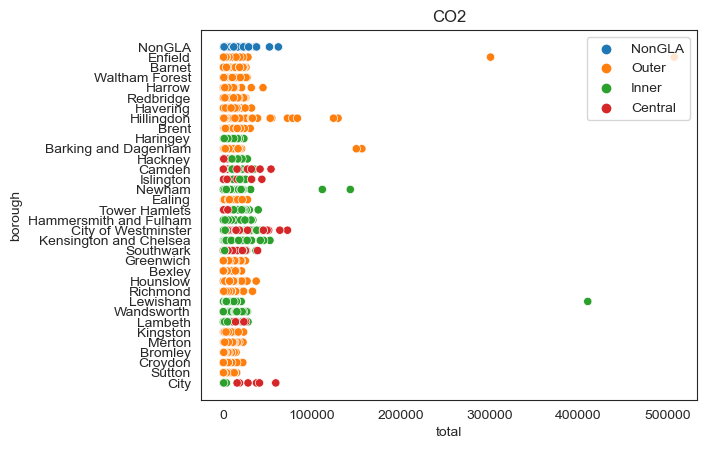

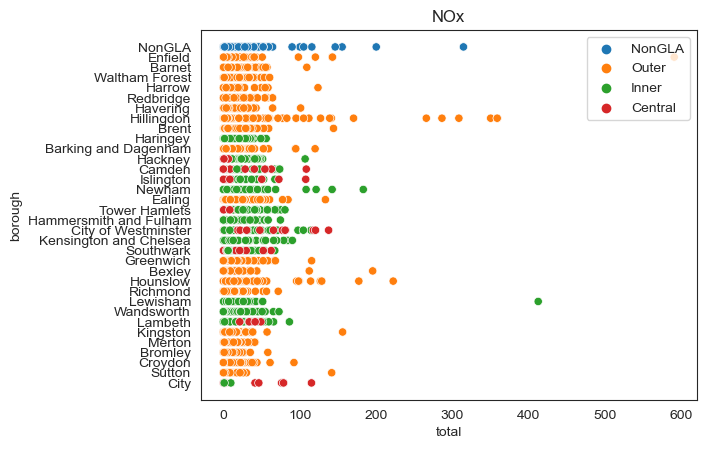

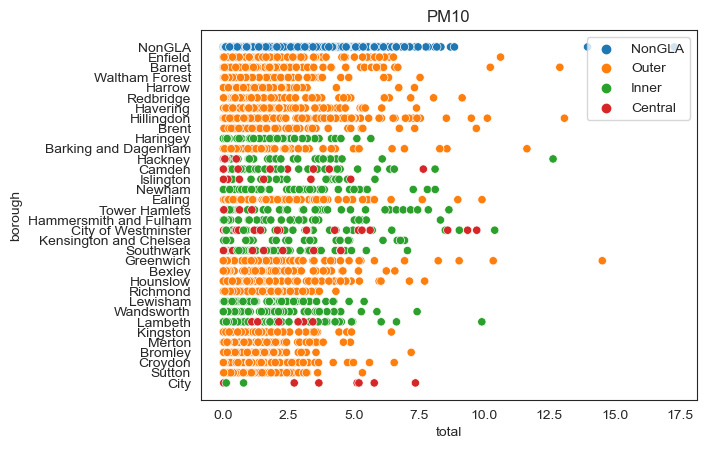

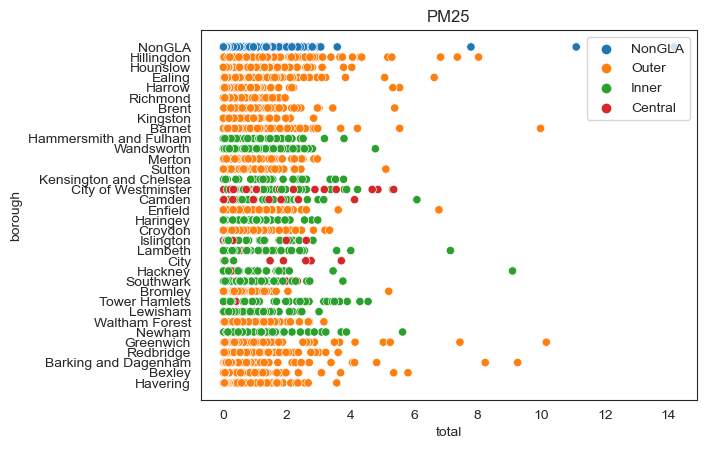

In [24]:
# Analyzing the diribution of polluents among all boroughs
df = [emissions_summary_CO2_df, emissions_summary_NOx_df, emissions_summary_PM10_df, emissions_summary_PM25_df]
c = ['b','y','g','r']
labelvar = ['CO2','NOx','PM10','PM25']
for dfvar in range(0,4):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    sns.scatterplot(x= df[dfvar].total, 
                    y= df[dfvar].borough,
                    hue = df[dfvar].zone,
                    c = c[dfvar]
                    
                   )
    plt.legend(loc='upper right')
    plt.title(labelvar[dfvar])
    plt.show()




**Observations**

    According to the data analysis, the NonGLA region has the lowest zone emissions for the four pollutants under  consideration. Specifically, CO2 emissions are found to be higher in both outer and inner zones, whereas NOx emissions are found to be higher in the outer zone. PM10 emissions, on the other hand, are observed to be higher in the outer and inner zones, and PM25 emissions are found to be higher in the outer zone.

In [25]:
# 3.7- check the data types for all datasets
emissions_summary_CO2_df.dtypes

year                                  int64
laei_1km2_id                          int64
grid_exactcut_id                      int64
easting                               int64
northing                              int64
borough                              object
zone                                 object
household_and_garden                  int64
small_waste_and_accidental_fires      int64
agriculture                           int64
stw                                  object
wts                                   int64
landfill                            float64
nrmm_construction                   float64
nrmm_industry                       float64
c&d_dust                              int64
domestic_gas                        float64
commercial_gas                      float64
domestic_other_fuels                float64
commercial_other_fuels              float64
industry_part_a                     float64
industry_part_b                     float64
aviation                        

In [26]:
## Check why STW is object
emissions_summary_CO2_df['stw'].unique()

array([0, 33000, '|'], dtype=object)

In [27]:
## Fixing the data of STW by zero
emissions_summary_CO2_df.loc[emissions_summary_CO2_df.query("stw == '|'").index ,'stw'] = 0

In [28]:
## Check the data types again
emissions_summary_CO2_df['stw'] = pd.to_numeric(emissions_summary_CO2_df['stw'])
emissions_summary_CO2_df.dtypes

year                                  int64
laei_1km2_id                          int64
grid_exactcut_id                      int64
easting                               int64
northing                              int64
borough                              object
zone                                 object
household_and_garden                  int64
small_waste_and_accidental_fires      int64
agriculture                           int64
stw                                   int64
wts                                   int64
landfill                            float64
nrmm_construction                   float64
nrmm_industry                       float64
c&d_dust                              int64
domestic_gas                        float64
commercial_gas                      float64
domestic_other_fuels                float64
commercial_other_fuels              float64
industry_part_a                     float64
industry_part_b                     float64
aviation                        

In [29]:
emissions_summary_CO2_df.describe().T

count           mean           std  \
year                              3355.0    2013.000000      0.000000   
laei_1km2_id                      3355.0   10171.481073   2159.850074   
grid_exactcut_id                  3355.0    1678.000000    968.649403   
easting                           3355.0  529707.451565  14688.878533   
northing                          3355.0  178835.618480  12556.159991   
household_and_garden              3355.0       0.000000      0.000000   
small_waste_and_accidental_fires  3355.0       0.000000      0.000000   
agriculture                       3355.0       0.000000      0.000000   
stw                               3355.0       9.836066    569.728149   
wts                               3355.0       0.000000      0.000000   
landfill                          3355.0     397.597898   1697.041080   
nrmm_construction                 3355.0     139.986602    686.008571   
nrmm_industry                     3355.0      19.241947     55.145421   
c&d_dust                          3355.0       0.000000      0.000000   
domestic_gas                      3355.0    2579.309899   2996.045747   
commercial_gas                    3355.0    1205.346527   2916.638177   
domestic_other_fuels              3355.0      36.507547     50.039402   
commercial_other_fuels            3355.0     200.005521    235.290476   
industry_part_a                   3355.0     593.387804  12917.488077   
industry_part_b                   3355.0       8.978460    199.240016   
aviation                          3355.0     299.117948   4120.123426   
passenger_shipping                3355.0       4.007914     49.439550   
commercial_shipping               3355.0      13.752767    300.485588   
rail_freight                      3355.0       8.790185     32.314885   
rail_passengers                   3355.0      18.417144     91.779783   
resuspension                      3355.0       0.000000      0.000000   
motorcycle                        3355.0      25.209950     41.248788   
taxi                              3355.0      83.005416    229.262681   
petrol_car                        3355.0    1069.082892   1145.749783   
diesel_car                        3355.0     645.837274    795.314838   
electric_car                      3355.0       0.000000      0.000000   
petrol_lgv                        3355.0       7.268748     10.268499   
diesel_lgv                        3355.0     323.976967    431.770890   
electric_lgv                      3355.0       0.000000      0.000000   
tfl_bus                           3355.0     205.265763    404.900889   
non-tfl_bus_and_coach             3355.0      67.375028    120.795122   
artic_hgv                         3355.0     234.300462    684.346838   
rigid_hgv                         3355.0     244.189819    327.826839   
total                             3355.0    8439.796549  15615.659093   
borough_rank                      3355.0     184.742176    266.291053   
zone_rank                         3355.0     657.456334    481.304893   

                                            min            25%            50%  \
year                                2013.000000    2013.000000    2013.000000   
laei_1km2_id                        5910.000000    8487.500000   10059.000000   
grid_exactcut_id                       1.000000     839.500000    1678.000000   
easting                           501500.000000  517500.000000  529500.000000   
northing                          152500.000000  169500.000000  179500.000000   
household_and_garden                   0.000000       0.000000       0.000000   
small_waste_and_accidental_fires       0.000000       0.000000       0.000000   
agriculture                            0.000000       0.000000       0.000000   
stw                                    0.000000       0.000000       0.000000   
wts                                    0.000000       0.000000       0.000000   
landfill                               0.000000       0.000000       0.000000

In [30]:
# 3.8- check the skewness for all datasets
emissions_summary_CO2_df.skew().sort_values(ascending= False)

stw                                 57.922362
commercial_shipping                 35.236304
industry_part_a                     30.060976
industry_part_b                     28.167633
aviation                            22.012373
total                               18.128117
passenger_shipping                  17.897145
nrmm_construction                   11.665406
nrmm_industry                        8.864682
commercial_gas                       7.214252
rail_passengers                      7.139899
taxi                                 7.134004
landfill                             6.953121
rail_freight                         5.201375
non-tfl_bus_and_coach                5.159543
tfl_bus                              4.585237
artic_hgv                            4.538538
motorcycle                           4.294060
domestic_other_fuels                 3.177142
petrol_lgv                           2.429218
commercial_other_fuels               2.362772
diesel_car                        

**The normal skewness values of the attributes should be between -1 and 1** will handle the skew during transformation step

### <font color='blue'> 4- Get the Master Data file by combining different datasets 

In [31]:
# 4- Need to get Master data set following the below steps:
'''
    1- Merge road_traffic_major_AADT_VKM_df and road_traffic_minor_VKM_df by appending
    2- Merge each emission summary with merged road trafic data
    3- Merge the last merged dataset with concentration for each pulliant 
'''

'\n    1- Merge road_traffic_major_AADT_VKM_df and road_traffic_minor_VKM_df by appending\n    2- Merge each emission summary with merged road trafic data\n    3- Merge the last merged dataset with concentration for each pulliant \n'

In [32]:
# 4.1 Merge major_roads_emissionsbyLink_df and lts_road_emissionsbyLink_df by appending the data
# In order to append the two dataframe we need to have the same cols.
# will drop the unneccessary cols from both df's
# remove all AADT cols
road_traffic_major_NoAADT_VKM_df = road_traffic_major_AADT_VKM_df.loc[:,~road_traffic_major_AADT_VKM_df.columns.str.startswith('aadt')]
## Drop the remainng cols
road_traffic_major_NoAADT_VKM_df = road_traffic_major_NoAADT_VKM_df.drop(['rowid','toid','tlrn','motorwaynumber','length_(m)'], axis = 1)
road_traffic_minor_VKM_df_modified = road_traffic_minor_VKM_df.drop(['id','easting','northing'], axis = 1)


print(road_traffic_major_NoAADT_VKM_df.columns)
print(road_traffic_minor_VKM_df_modified.columns)

Index(['year', 'grid_exactcut_id', 'location_exactcut', 'boroughname_exactcut',
       'speed_(kph)', 'vkm_motorcycle', 'vkm_taxi', 'vkm_pcar', 'vkm_dcar',
       'vkm_plgv', 'vkm_dlgv', 'vkm_ltbus', 'vkm_coach', 'vkm_rigid2axle',
       'vkm_rigid3axle', 'vkm_rigid4axle', 'vkm_artic3axle', 'vkm_artic5axle',
       'vkm_artic6axle', 'vkm_electriccar', 'vkm_electriclgv', 'vkm_total'],
      dtype='object')
Index(['year', 'grid_exactcut_id', 'location_exactcut', 'boroughname_exactcut',
       'speed_(kph)', 'vkm_motorcycle', 'vkm_taxi', 'vkm_bus', 'vkm_coach',
       'vkm_rigid', 'vkm_artic', 'vkm_petrolcar', 'vkm_dieselcar',
       'vkm_electriccar', 'vkm_petrollgv', 'vkm_diesellgv', 'vkm_electriclgv',
       'vkm_total'],
      dtype='object')


In [33]:
## Rename cols

road_traffic_major_NoAADT_VKM_df['vkm_rigid'] = road_traffic_major_NoAADT_VKM_df['vkm_rigid2axle'] +\
                                                road_traffic_major_NoAADT_VKM_df['vkm_rigid3axle'] +\
                                                road_traffic_major_NoAADT_VKM_df['vkm_rigid4axle'] 

road_traffic_major_NoAADT_VKM_df['vkm_artic'] = road_traffic_major_NoAADT_VKM_df['vkm_artic3axle'] +\
                                                road_traffic_major_NoAADT_VKM_df['vkm_artic5axle'] +\
                                                road_traffic_major_NoAADT_VKM_df['vkm_artic6axle'] 



  

In [34]:
road_traffic_major_NoAADT_VKM_df = road_traffic_major_NoAADT_VKM_df.drop(['vkm_rigid2axle','vkm_rigid3axle','vkm_rigid4axle','vkm_artic3axle',
                                       'vkm_artic5axle','vkm_artic6axle'], axis= 1) 

In [35]:
road_traffic_major_NoAADT_VKM_df.columns

Index(['year', 'grid_exactcut_id', 'location_exactcut', 'boroughname_exactcut',
       'speed_(kph)', 'vkm_motorcycle', 'vkm_taxi', 'vkm_pcar', 'vkm_dcar',
       'vkm_plgv', 'vkm_dlgv', 'vkm_ltbus', 'vkm_coach', 'vkm_electriccar',
       'vkm_electriclgv', 'vkm_total', 'vkm_rigid', 'vkm_artic'],
      dtype='object')

In [36]:
road_traffic_major_NoAADT_VKM_df.rename(columns= {
                                                   'speed_(kph)' : 'speed_kph'    ,
                                                   'vkm_pcar'    : 'vkm_petrolcar',
                                                   'vkm_dcar'    : 'vkm_dieselcar',
                                                   'vkm_plgv'    : 'vkm_petrollgv',
                                                   'vkm_dlgv'    : 'vkm_diesellgv',
                                                   'vkm_ltbus'   : 'vkm_bus'      
                                                   
                                                 }
                                        , inplace = True
                                       ) 

In [37]:
road_traffic_minor_VKM_df_modified.rename(columns= {'speed_(kph)' : 'speed_kph'}, inplace= True)

In [38]:
print(road_traffic_major_NoAADT_VKM_df.columns)
print(road_traffic_minor_VKM_df_modified.columns)

Index(['year', 'grid_exactcut_id', 'location_exactcut', 'boroughname_exactcut',
       'speed_kph', 'vkm_motorcycle', 'vkm_taxi', 'vkm_petrolcar',
       'vkm_dieselcar', 'vkm_petrollgv', 'vkm_diesellgv', 'vkm_bus',
       'vkm_coach', 'vkm_electriccar', 'vkm_electriclgv', 'vkm_total',
       'vkm_rigid', 'vkm_artic'],
      dtype='object')
Index(['year', 'grid_exactcut_id', 'location_exactcut', 'boroughname_exactcut',
       'speed_kph', 'vkm_motorcycle', 'vkm_taxi', 'vkm_bus', 'vkm_coach',
       'vkm_rigid', 'vkm_artic', 'vkm_petrolcar', 'vkm_dieselcar',
       'vkm_electriccar', 'vkm_petrollgv', 'vkm_diesellgv', 'vkm_electriclgv',
       'vkm_total'],
      dtype='object')


In [39]:
# Merging th two datset
road_traffic_df = road_traffic_major_NoAADT_VKM_df.append(road_traffic_minor_VKM_df_modified, ignore_index= True).drop('year', axis= 1)

In [40]:
road_traffic_df

grid_exactcut_id location_exactcut boroughname_exactcut  speed_kph  \
0                   836             Outer           Hillingdon  36.938200   
1                  2217             Outer           Hillingdon  35.285178   
2                   282          External               NonGLA  49.065141   
3                   873             Outer           Hillingdon  49.173100   
4                  2930             Outer           Hillingdon  49.173100   
...                 ...               ...                  ...        ...   
91346              3351             Inner            Southwark  18.000000   
91347              3352           Central            Southwark  18.000000   
91348              3353           Central               Camden  18.000000   
91349              3354           Central            Islington  18.000000   
91350              3355           Central                 City  18.000000   

       vkm_motorcycle       vkm_taxi  vkm_petrolcar  vkm_dieselcar  \
0          176.368343     154.019511   8.177005e+03    4851.853527   
1          116.207872     101.482382   5.387771e+03    3196.852461   
2        12871.009867    4160.449042   4.183287e+05  248216.759321   
3          760.687130    2785.595031   1.485715e+05   88155.390937   
4         2586.248957    9470.703474   5.051260e+05  299718.213847   
...               ...            ...            ...            ...   
91346        0.000000       0.000000   0.000000e+00       0.000000   
91347   181781.970555  279884.791227   8.268837e+05  490634.229474   
91348   265377.375688  408595.152746   1.207141e+06  716261.428310   
91349    17718.926363   27281.478382   8.059953e+04   47824.002716   
91350   226909.814858  349368.527290   1.032163e+06  612437.535993   

       vkm_petrollgv  vkm_diesellgv       vkm_bus     vkm_coach  \
0          42.947224    2157.873473    470.278768    149.248696   
1          28.297627    1421.807786    309.432150     98.338925   
2        1656.123809   83211.562650   2216.046236   1657.075319   
3         531.510766   26705.637104    322.624763    118.008843   
4        1807.075618   90796.101831   1096.887173    401.216526   
...              ...            ...           ...           ...   
91346       0.000000       0.000000     86.057352      0.000000   
91347    5907.156571  296803.733155   6917.368346  23780.302227   
91348    8623.664274  433294.042433  96183.663942      0.000000   
91349     575.791926   28930.533875  29547.453009      0.000000   
91350    7373.631830  370486.447696   4112.333119  34205.621204   

       vkm_electriccar  vkm_electriclgv     vkm_total      vkm_rigid  \
0             4.335614         1.235289  1.660501e+04     388.690207   
1             2.856706         0.813924  1.094049e+04     256.105267   
2           221.806380        47.635028  7.967351e+05   18823.127454   
3            78.775616        15.287825  2.841443e+05   12853.488160   
4           267.828056        51.976850  9.660579e+05   43700.384878   
...                ...              ...           ...            ...   
91346         0.000000         0.000000  8.605735e+01       0.000000   
91347       438.430518       169.907328  2.199204e+06   77523.821258   
91348       640.050877       248.042140  3.261916e+06  113174.170094   
91349        42.735506        16.561482  2.409200e+05    7556.482560   
91350       547.273895       212.087502  2.745170e+06   96768.846125   

          vkm_artic  
0         31.155922  
1         20.528420  
2       5324.816932  
3       3245.780041  
4      11035.279705  
...             ...  
91346      0.000000  
91347   8478.987929  
91348  12377.468100  
91349    826.523867  
91350  10584.522657  

[91351 rows x 17 columns]

In [41]:
road_traffic_df.shape

(91351, 17)

In [42]:
road_traffic_df.isnull().sum()

grid_exactcut_id        0
location_exactcut       0
boroughname_exactcut    0
speed_kph               0
vkm_motorcycle          0
vkm_taxi                0
vkm_petrolcar           0
vkm_dieselcar           0
vkm_petrollgv           0
vkm_diesellgv           0
vkm_bus                 0
vkm_coach               0
vkm_electriccar         0
vkm_electriclgv         0
vkm_total               0
vkm_rigid               0
vkm_artic               0
dtype: int64

In [43]:
## Excusting a query for any grid exactcut_id to make sure of merging process
road_traffic_df.query('grid_exactcut_id == 2188')

grid_exactcut_id location_exactcut boroughname_exactcut  speed_kph  \
2273               2188             Outer               Ealing  32.205610   
4989               2188             Outer               Ealing  32.205610   
4990               2188             Outer               Ealing  32.205610   
11654              2188             Outer               Ealing  32.205610   
17237              2188             Outer               Ealing  32.205610   
...                 ...               ...                  ...        ...   
76579              2188             Outer               Ealing  34.130815   
81650              2188             Outer               Ealing  19.033495   
82085              2188             Outer               Ealing  24.990353   
82912              2188             Outer               Ealing  24.990353   
90183              2188             Outer               Ealing  30.000000   

       vkm_motorcycle      vkm_taxi  vkm_petrolcar  vkm_dieselcar  \
2273       181.778578    451.645004   2.385584e+04   1.415495e+04   
4989       163.332960    405.815230   2.143512e+04   1.271860e+04   
4990       110.859396    275.440004   1.454871e+04   8.632528e+03   
11654      152.253817    378.288116   1.998114e+04   1.185588e+04   
17237      157.949823    392.440348   2.072866e+04   1.229942e+04   
...               ...           ...            ...            ...   
76579      870.569088     12.948753   2.956256e+03   1.754105e+03   
81650    18798.939376    298.117538   1.859579e+05   1.103387e+05   
82085     3643.898654   4062.155132   1.205379e+05   7.152156e+04   
82912     2884.558019   3215.655339   9.541937e+04   5.661741e+04   
90183    87922.874819  40198.980242   3.768312e+06   2.235941e+06   

       vkm_petrollgv  vkm_diesellgv        vkm_bus    vkm_coach  \
2273       86.613563    4351.878702    6396.152983     0.000000   
4989       77.824625    3910.280512    5747.116149     0.000000   
4990       52.822106    2654.034650    3900.754778     0.000000   
11654      72.545653    3645.039759    5357.279815     0.000000   
17237      75.259676    3781.405261    5557.702363     0.000000   
...              ...            ...            ...          ...   
76579       9.420304     473.321021       0.000000    39.645140   
81650     541.362422   27200.631298       0.000000  6767.788594   
82085     417.555713   20979.991455   25063.467701     0.000000   
82912     330.542585   16608.036703   19840.570116     0.000000   
90183   13185.287038  662491.736656  108075.182876     0.000000   

       vkm_electriccar  vkm_electriclgv     vkm_total     vkm_rigid  \
2273         12.648853         2.491263  5.000842e+04    514.423955   
4989         11.365336         2.238467  4.493392e+04    462.223813   
4990          7.714023         1.519320  3.049811e+04    313.726346   
11654        10.594406         2.086628  4.188598e+04    430.870412   
17237        10.990756         2.164691  4.345298e+04    446.989814   
...                ...              ...           ...           ...   
76579         1.567467         0.270956  6.249461e+03    107.927220   
81650        98.598644        15.571188  3.541415e+05   3389.096266   
82085        63.911634        12.010140  2.561936e+05   8201.416891   
82912        50.593289         9.507384  2.028062e+05   6492.349295   
90183      1998.035529       379.247928  7.022360e+06  93469.398408   

          vkm_artic  
2273       0.000000  
4989       0.000000  
4990       0.000000  
11654      0.000000  
17237      0.000000  
...             ...  
76579     23.429460  
81650    734.798977  
82085   1689.739158  
82912   1337.619704  
90183  10386.542525  

[112 rows x 17 columns]

In [44]:
## Need to aggregate all vkm value by grid_exactcut_id, location_exactcut and boroughname_exactcut
## So we can merge with summary for each poluant to get the right figure rather duplicated the values
road_traffic_df_agg = road_traffic_df.groupby(['grid_exactcut_id','location_exactcut', 'boroughname_exactcut']).agg(
                                                                                            speed_kph       = ('speed_kph',        'mean'),
                                                                                            vkm_motorcycle  = ('vkm_motorcycle',   'sum'),
                                                                                            vkm_taxi        = ('vkm_taxi',         'sum'),
                                                                                            vkm_bus         = ('vkm_bus',          'sum'),
                                                                                            vkm_coach       = ('vkm_coach',        'sum'),
                                                                                            vkm_rigid       = ('vkm_rigid',        'sum'),
                                                                                            vkm_artic       = ('vkm_artic',        'sum'),
                                                                                            vkm_petrolcar   = ('vkm_petrolcar',    'sum'),
                                                                                            vkm_dieselcar   = ('vkm_dieselcar',    'sum'),
                                                                                            vkm_electriccar = ('vkm_electriccar',  'sum'),
                                                                                            vkm_petrollgv   = ('vkm_petrollgv',    'sum'),
                                                                                            vkm_diesellgv   = ('vkm_diesellgv',    'sum'),
                                                                                            vkm_electriclgv = ('vkm_electriclgv',  'sum'),
                                                                                            vkm_total       = ('vkm_total',        'sum')
                                                                                             ).reset_index()


In [45]:

print('road_traffic_df shape before grouping    = ' + str(road_traffic_df.shape))
print('road_traffic_df_agg shape after grouping = ' + str(road_traffic_df_agg.shape))


road_traffic_df shape before grouping    = (91351, 17)
road_traffic_df_agg shape after grouping = (3355, 17)


In [46]:
# 4.3 Merging road_traffic_df_agg and emissions_summary_CO2_df on grid_exactcut_id, location_exactcut and boroughname_exactcut

## Check the total emission of CO2 before merge
emissions_summary_CO2_df['total'].sum()

28315517.420952868

In [47]:
## rename the key colmuns of boroughname_exactcut,and location_exactcut to join using them as well
road_traffic_df_agg.rename(columns= {'location_exactcut' : 'zone','boroughname_exactcut' : 'borough'}, inplace= True)

In [48]:
## 4.4 get the merged data set for summary CO2 with road_traffic_df_agg
emissions_summary_CO2_road_trafic_df = pd.merge(emissions_summary_CO2_df,road_traffic_df_agg, 
                                                left_on  = ['grid_exactcut_id'],
                                                right_on = ['grid_exactcut_id'], 
                                                how = 'left')

In [49]:
emissions_summary_CO2_road_trafic_df['total'].sum()

28315517.420952868

In [50]:
## 4.5 get the merged data set for summary Nox with road_traffic_df_agg
emissions_summary_NOx_road_trafic_df = pd.merge(emissions_summary_NOx_df,road_traffic_df_agg, 
                                                left_on  = ['grid_exactcut_id'],
                                                right_on = ['grid_exactcut_id'], 
                                                how = 'left')

In [51]:
## 4.6 get the merged data set for summary PM10 with road_traffic_df_agg
## in order to make the all merged data set with the same shape will sum the different attribute related to PM10 with its major type
emissions_summary_PM10_df['motorcycle'] = emissions_summary_PM10_df[['motorcycle_exhaust','motorcycle_brake','motorcycle_tyre']].sum(axis=1)
emissions_summary_PM10_df['taxi'] = emissions_summary_PM10_df[['taxi_exhaust', 'taxi_brake','taxi_tyre']].sum(axis=1)
emissions_summary_PM10_df['petrol_car'] = emissions_summary_PM10_df[['petrol_car_exhaust', 'petrol_car_brake','petrol_car_tyre']].sum(axis=1)
emissions_summary_PM10_df['diesel_car'] = emissions_summary_PM10_df[['diesel_car_exhaust', 'diesel_car_brake','diesel_car_tyre']].sum(axis=1)
emissions_summary_PM10_df['electric_car'] = emissions_summary_PM10_df[['electric_car_exhaust', 'electric_car_brake','electric_car_tyre']].sum(axis=1)
emissions_summary_PM10_df['petrol_lgv'] = emissions_summary_PM10_df[['petrol_lgv_exhaust', 'petrol_lgv_brake', 'petrol_lgv_tyre']].sum(axis=1)
emissions_summary_PM10_df['diesel_lgv'] = emissions_summary_PM10_df[['diesel_lgv_exhaust', 'diesel_lgv_brake','diesel_lgv_tyre']].sum(axis=1)
emissions_summary_PM10_df['electric_lgv'] = emissions_summary_PM10_df[['electric_lgv_exhaust', 'electric_lgv_brake','electric_lgv_tyre']].sum(axis=1)
emissions_summary_PM10_df['tfl_bus'] = emissions_summary_PM10_df[['tfl_bus_exhaust', 'tfl_bus_brake', 'tfl_bus_tyre']].sum(axis=1)
emissions_summary_PM10_df['non-tfl_bus_and_coach'] = emissions_summary_PM10_df[['non-tfl_bus_and_coach_exhaust', 'non-tfl_bus_and_coach_brake','non-tfl_bus_and_coach_tyre']].sum(axis=1)
emissions_summary_PM10_df['artic_hgv'] = emissions_summary_PM10_df[['artic_hgv_exhaust', 'artic_hgv_brake','artic_hgv_tyre']].sum(axis=1)
emissions_summary_PM10_df['rigid_hgv'] = emissions_summary_PM10_df[['rigid_hgv_exhaust', 'rigid_hgv_brake','rigid_hgv_tyre']].sum(axis=1)
       

In [52]:
## drop the cols that used in summasion
emissions_summary_PM10_df = emissions_summary_PM10_df.drop(['motorcycle_exhaust','motorcycle_brake','motorcycle_tyre',
                                                            'taxi_exhaust', 'taxi_brake','taxi_tyre',
                                                            'petrol_car_exhaust', 'petrol_car_brake','petrol_car_tyre',
                                                            'diesel_car_exhaust', 'diesel_car_brake','diesel_car_tyre',
                                                            'electric_car_exhaust', 'electric_car_brake','electric_car_tyre',
                                                            'petrol_lgv_exhaust', 'petrol_lgv_brake', 'petrol_lgv_tyre',
                                                            'diesel_lgv_exhaust', 'diesel_lgv_brake','diesel_lgv_tyre',
                                                            'electric_lgv_exhaust', 'electric_lgv_brake','electric_lgv_tyre',
                                                            'tfl_bus_exhaust', 'tfl_bus_brake', 'tfl_bus_tyre',
                                                            'non-tfl_bus_and_coach_exhaust', 'non-tfl_bus_and_coach_brake',
                                                            'non-tfl_bus_and_coach_tyre', 'artic_hgv_exhaust', 'artic_hgv_brake',
                                                            'artic_hgv_tyre', 'rigid_hgv_exhaust', 'rigid_hgv_brake',
                                                            'rigid_hgv_tyre'
                                                           ], axis = 1)

In [53]:
emissions_summary_PM10_df.shape 

(3355, 43)

In [54]:
emissions_summary_PM10_road_trafic_df = pd.merge(emissions_summary_PM10_df,road_traffic_df_agg, 
                                                left_on  = ['grid_exactcut_id'],
                                                right_on = ['grid_exactcut_id'], 
                                                how = 'left')

In [55]:
emissions_summary_PM10_road_trafic_df['total'].sum()

5908.154527292037

In [56]:
## 4.7 get the merged data set for summary PM25 with road_traffic_df_agg
emissions_summary_PM25_df['motorcycle'] = emissions_summary_PM25_df[['motorcycle_exhaust','motorcycle_brake','motorcycle_tyre']].sum(axis=1)
emissions_summary_PM25_df['taxi'] = emissions_summary_PM25_df[['taxi_exhaust', 'taxi_brake','taxi_tyre']].sum(axis=1)
emissions_summary_PM25_df['petrol_car'] = emissions_summary_PM25_df[['petrol_car_exhaust', 'petrol_car_brake','petrol_car_tyre']].sum(axis=1)
emissions_summary_PM25_df['diesel_car'] = emissions_summary_PM25_df[['diesel_car_exhaust', 'diesel_car_brake','diesel_car_tyre']].sum(axis=1)
emissions_summary_PM25_df['electric_car'] = emissions_summary_PM25_df[['electric_car_exhaust', 'electric_car_brake','electric_car_tyre']].sum(axis=1)
emissions_summary_PM25_df['petrol_lgv'] = emissions_summary_PM25_df[['petrol_lgv_exhaust', 'petrol_lgv_brake', 'petrol_lgv_tyre']].sum(axis=1)
emissions_summary_PM25_df['diesel_lgv'] = emissions_summary_PM25_df[['diesel_lgv_exhaust', 'diesel_lgv_brake','diesel_lgv_tyre']].sum(axis=1)
emissions_summary_PM25_df['electric_lgv'] = emissions_summary_PM25_df[['electric_lgv_exhaust', 'electric_lgv_brake','electric_lgv_tyre']].sum(axis=1)
emissions_summary_PM25_df['tfl_bus'] = emissions_summary_PM25_df[['tfl_bus_exhaust', 'tfl_bus_brake', 'tfl_bus_tyre']].sum(axis=1)
emissions_summary_PM25_df['non-tfl_bus_and_coach'] = emissions_summary_PM25_df[['non-tfl_bus_and_coach_exhaust', 'non-tfl_bus_and_coach_brake','non-tfl_bus_and_coach_tyre']].sum(axis=1)
emissions_summary_PM25_df['artic_hgv'] = emissions_summary_PM25_df[['artic_hgv_exhaust', 'artic_hgv_brake','artic_hgv_tyre']].sum(axis=1)
emissions_summary_PM25_df['rigid_hgv'] = emissions_summary_PM25_df[['rigid_hgv_exhaust', 'rigid_hgv_brake','rigid_hgv_tyre']].sum(axis=1)
       

In [57]:
emissions_summary_PM25_df = emissions_summary_PM25_df.drop(['motorcycle_exhaust','motorcycle_brake','motorcycle_tyre',
                                                            'taxi_exhaust', 'taxi_brake','taxi_tyre',
                                                            'petrol_car_exhaust', 'petrol_car_brake','petrol_car_tyre',
                                                            'diesel_car_exhaust', 'diesel_car_brake','diesel_car_tyre',
                                                            'electric_car_exhaust', 'electric_car_brake','electric_car_tyre',
                                                            'petrol_lgv_exhaust', 'petrol_lgv_brake', 'petrol_lgv_tyre',
                                                            'diesel_lgv_exhaust', 'diesel_lgv_brake','diesel_lgv_tyre',
                                                            'electric_lgv_exhaust', 'electric_lgv_brake','electric_lgv_tyre',
                                                            'tfl_bus_exhaust', 'tfl_bus_brake', 'tfl_bus_tyre',
                                                            'non-tfl_bus_and_coach_exhaust', 'non-tfl_bus_and_coach_brake',
                                                            'non-tfl_bus_and_coach_tyre', 'artic_hgv_exhaust', 'artic_hgv_brake',
                                                            'artic_hgv_tyre', 'rigid_hgv_exhaust', 'rigid_hgv_brake',
                                                            'rigid_hgv_tyre'
                                                           ], axis = 1)

In [58]:
emissions_summary_PM25_df

year  laei_1km2_id  grid_exactcut_id  easting  northing   borough  \
24     2013          8137               218   501500    190500    NonGLA   
25     2013          8309               220   501500    189500    NonGLA   
26     2013          8481               222   501500    188500    NonGLA   
27     2013          8653               224   501500    187500    NonGLA   
28     2013          8825               226   501500    186500    NonGLA   
...     ...           ...               ...      ...       ...       ...   
20078  2013          9228              2818   560500    184500  Havering   
20114  2013          8885               754   561500    186500    NonGLA   
20115  2013          8885               755   561500    186500  Havering   
20116  2013          9057              2133   561500    185500    NonGLA   
20117  2013          9057              2134   561500    185500  Havering   

         zone  household_and_garden  small_waste_and_accidental_fires  \
24     NonGLA              0.000017                          0.000920   
25     NonGLA              0.000034                          0.001824   
26     NonGLA              0.000273                          0.014594   
27     NonGLA              0.000273                          0.014764   
28     NonGLA              0.000102                          0.005492   
...       ...                   ...                               ...   
20078   Outer              0.000000                          0.000000   
20114  NonGLA              0.000000                          0.000000   
20115   Outer              0.000000                          0.000000   
20116  NonGLA              0.000000                          0.000000   
20117   Outer              0.000000                          0.000000   

       agriculture  stw  wts  landfill  nrmm_construction  nrmm_industry  \
24        0.012957    0  0.0  0.000642                0.0       0.000183   
25        0.008299    0  0.0  0.000088                0.0       0.000000   
26        0.009028    0  0.0  0.000000                0.0       0.000000   
27        0.011129    0  0.0  0.000000                0.0       0.000241   
28        0.009892    0  0.0  0.000000                0.0       0.000071   
...            ...  ...  ...       ...                ...            ...   
20078     0.002013    0  0.0  0.000000                0.0       0.000000   
20114     0.010000    0  0.0  0.000000                0.0       0.000000   
20115     0.001905    0  0.0  0.000000                0.0       0.000000   
20116     0.003198    0  0.0  0.000000                0.0       0.000000   
20117     0.009143    0  0.0  0.000000                0.0       0.000000   

       c&d_dust  domestic_gas  commercial_gas  domestic_other_fuels  \
24          0.0      0.000197        0.003562              0.000118   
25          0.0      0.002510        0.004083              0.000191   
26          0.0      0.007726        0.004280              0.000147   
27          0.0      0.006249        0.004279              0.000384   
28          0.0      0.004300        0.003098              0.003163   
...         ...           ...             ...                   ...   
20078       0.0      0.000056        0.000154              0.000606   
20114       0.0      0.000134        0.000590              0.000606   
20115       0.0      0.000059        0.000152              0.000638   
20116       0.0      0.000041        0.000182              0.000185   
20117       0.0      0.000272        0.000704              0.002969   

       commercial_other_fuels  industry_part_a  industry_part_b  aviation  \
24                   0.108395              0.0              0.0  0.000000   
25                   0.066472              0.0              0.0  0.000000   
26                   0.042327              0.0              0.0  0.000240   
27                   0.042327              0.0              0.0  0.001219   
28                   0.042327              0.0              0.0  0

In [59]:
road_traffic_df_agg

grid_exactcut_id      zone    borough  speed_kph  vkm_motorcycle  \
0                    1  External     NonGLA  30.000000    7.223168e+03   
1                    2  External     NonGLA  90.585457    3.241864e+05   
2                    3  External     NonGLA  67.560852    9.398400e+04   
3                    4  External     NonGLA  30.000000    7.204225e+03   
4                    5  External     NonGLA  30.000000    6.499471e+03   
...                ...       ...        ...        ...             ...   
3350              3351     Inner  Southwark  20.961110    2.049859e+05   
3351              3352   Central  Southwark  25.202447    1.876422e+06   
3352              3353   Central     Camden  14.992700    2.883517e+06   
3353              3354   Central  Islington  19.463493    1.030902e+05   
3354              3355   Central       City  16.660418    2.169299e+06   

          vkm_taxi       vkm_bus      vkm_coach     vkm_rigid     vkm_artic  \
0     3.303117e+03  0.000000e+00    4513.072361  7.680055e+03  8.534278e+02   
1     3.348364e+05  1.333874e+05  230903.770242  1.985157e+06  2.612266e+06   
2     1.584894e+05  1.481731e+04   91744.333228  1.129258e+06  1.800433e+06   
3     3.294143e+03  0.000000e+00    4499.043482  7.654621e+03  8.474952e+02   
4     2.972477e+03  0.000000e+00    4057.870123  6.911448e+03  7.665133e+02   
...            ...           ...            ...           ...           ...   
3350  1.562497e+05  4.548547e+05    8832.877200  1.016553e+05  1.048832e+04   
3351  2.708310e+06  1.831923e+06  510761.403977  9.149105e+05  6.615965e+04   
3352  7.185008e+06  2.628291e+06  222153.821058  1.208069e+06  7.592460e+04   
3353  8.438766e+05  2.158358e+05    5537.840026  1.266783e+05  2.171533e+04   
3354  7.830967e+06  2.330259e+06  406522.612612  1.365623e+06  1.808218e+05   

      vkm_petrolcar  vkm_dieselcar  vkm_electriccar  vkm_petrollgv  \
0      3.095995e+05   1.837019e+05       164.155952    1083.285552   
1      2.780978e+07   2.595549e+07      6082.704795  223845.935195   
2      1.217395e+07   1.326564e+07       918.744472  115839.354236   
3      3.085780e+05   1.830958e+05       163.614324    1079.683190   
4      2.786149e+05   1.653171e+05       147.727276     974.893390   
...             ...            ...              ...            ...   
3350   9.008549e+05   5.345253e+05       477.651568    8352.526392   
3351   5.243776e+06   3.111412e+06      2780.356423   61144.792611   
3352   9.251363e+06   5.489328e+06      4905.260673   84774.742882   
3353   7.679582e+05   4.556706e+05       407.187024    7156.382569   
3354   9.327239e+06   5.534349e+06      4945.491463   76373.478397   

      vkm_diesellgv  vkm_electriclgv     vkm_total  
0      5.442944e+04        31.158503  5.725823e+05  
1      8.323654e+06      1572.184206  6.794116e+07  
2      3.948866e+06       216.695287  3.279415e+07  
3      5.424844e+04        31.054888  5.706961e+05  
4      4.898330e+04        28.040823  5.152737e+05  
...             ...              ...           ...  
3350   4.196708e+05       240.243411  2.801188e+06  
3351   3.072206e+06      1758.705431  1.940156e+07  
3352   4.259488e+06      2438.372826  3.329526e+07  
3353   3.595708e+05       205.838770  2.907703e+06  
3354   3.837368e+06      2196.727563  3.306596e+07  

[3355 rows x 17 columns]

In [60]:
emissions_summary_PM25_road_trafic_df = pd.merge(emissions_summary_PM25_df,road_traffic_df_agg, 
                                                left_on  = ['grid_exactcut_id'],
                                                right_on = ['grid_exactcut_id'], 
                                                how = 'left')

In [61]:
emissions_summary_PM25_road_trafic_df['total'].sum()

2938.3114902220777

In [62]:
## 4.8 Merging each generated dataframe with its related concentrate by leinking the x, y with easting and northing

concentration_NOx_df.rename(columns= { 'x' : 'easting' , 'y' : 'northing'}, inplace= True)
concentration_PM10_df.rename(columns= { 'x' : 'easting' , 'y' : 'northing'}, inplace= True)
concentration_PM25_df.rename(columns= { 'x' : 'easting' , 'y' : 'northing'}, inplace= True)


In [63]:
emissions_summary_NOx_road_trafic_df

year  laei_1km2_id  grid_exactcut_id  easting  northing  borough_x  \
0     2013          5910                 1   510500    203500     NonGLA   
1     2013          5911                 2   511500    203500     NonGLA   
2     2013          5912                 3   512500    203500     NonGLA   
3     2013          5915                 4   515500    203500     NonGLA   
4     2013          5916                 5   516500    203500     NonGLA   
...    ...           ...               ...      ...       ...        ...   
3350  2013         10059              3351   531500    179500  Southwark   
3351  2013         10059              3352   531500    179500  Southwark   
3352  2013          9714              3353   530500    181500     Camden   
3353  2013          9716              3354   532500    181500  Islington   
3354  2013          9716              3355   532500    181500       City   

       zone_x  household_and_garden  small_waste_and_accidental_fires  \
0      NonGLA              0.003669                          0.000574   
1      NonGLA              0.011739                          0.001173   
2      NonGLA              0.007337                          0.002752   
3      NonGLA              0.011006                          0.001260   
4      NonGLA              0.009538                          0.000293   
...       ...                   ...                               ...   
3350    Inner              0.000104                          0.000003   
3351  Central              0.005430                          0.034812   
3352  Central              0.005897                          0.122293   
3353  Central              0.000066                          0.004252   
3354  Central              0.000664                          0.030170   

      agriculture  stw  wts  landfill  nrmm_construction  nrmm_industry  \
0        0.112469  0.0    0         0           0.000000       0.120304   
1        0.110863  0.0    0         0           0.000000       0.068135   
2        0.123716  0.0    0         0           0.000000       0.322059   
3        0.114076  0.0    0         0           0.000000       0.081635   
4        0.133356  0.0    0         0           0.000000       0.004262   
...           ...  ...  ...       ...                ...            ...   
3350     0.000019  0.0    0         0           0.000000       0.004002   
3351     0.000991  0.0    0         0           2.041895       0.248102   
3352     0.000000  0.0    0         0           0.642174       6.728697   
3353     0.000289  0.0    0         0           0.004354       0.092792   
3354     0.002909  0.0    0         0           0.840268       0.927918   

      c&d_dust  domestic_gas  commercial_gas  domestic_other_fuels  \
0            0      0.107189        0.203546              0.035980   
1            0      0.060659        0.232852              0.019930   
2            0      0.169102        0.232850              0.019833   
3            0      0.707152        0.469370              0.006177   
4            0      0.732042        0.419513              0.008891   
...        ...           ...             ...                   ...   
3350         0      0.037351        0.135706              0.001602   
3351         0      3.386856        9.034128              0.076097   
3352         0      4.107631       31.344069              0.204544   
3353         0      0.105752        2.862924              0.007840   
3354         0      0.746572       42.430803              0.034606   

      commercial_other_fuels  industry_part_a  industry_part_b  aviation  \
0                   0.262809              0.0              0.0       0.0   
1                   0.294406              0.0              0.0       0.0   
2                   0.294404              0.0              0.0       0.0   
3                   0.294406              0.0              0.0       0.0   
4                   0.294404              0.0              0.0       0.0   
...               

In [64]:
concentration_NOx_df

easting  northing     conct  year
0         501460    170580  49.21837  2013
1         501460    170600  49.78666  2013
2         501460    170620  50.36728  2013
3         501460    170640  50.94635  2013
4         501460    170660  51.51179  2013
...          ...       ...       ...   ...
5856423   561980    185040  23.47701  2013
5856424   561980    185060  23.46760  2013
5856425   561980    185080  23.46071  2013
5856426   561980    185100  23.45906  2013
5856427   561980    185120  23.48103  2013

[5856428 rows x 4 columns]

In [65]:
master_NOx_df = pd.merge(emissions_summary_NOx_road_trafic_df,concentration_NOx_df, 
                                                left_on  = ['easting' , 'northing'],
                                                right_on = ['easting' , 'northing'], 
                                                how = 'left')

In [66]:
master_NOx_df.drop(['year_x', 'year_y'], axis= 1, inplace= True)

In [67]:
master_NOx_df.isnull().sum()

laei_1km2_id                          0
grid_exactcut_id                      0
easting                               0
northing                              0
borough_x                             0
zone_x                                0
household_and_garden                  0
small_waste_and_accidental_fires      0
agriculture                           0
stw                                   0
wts                                   0
landfill                              0
nrmm_construction                     0
nrmm_industry                         0
c&d_dust                              0
domestic_gas                          0
commercial_gas                        0
domestic_other_fuels                  0
commercial_other_fuels                0
industry_part_a                       0
industry_part_b                       0
aviation                              0
passenger_shipping                    0
commercial_shipping                   0
rail_freight                          0


In [68]:
master_NOx_df['conct'].fillna(method='ffill' , inplace = True)

In [69]:
master_NOx_df.isnull().sum()

laei_1km2_id                        0
grid_exactcut_id                    0
easting                             0
northing                            0
borough_x                           0
zone_x                              0
household_and_garden                0
small_waste_and_accidental_fires    0
agriculture                         0
stw                                 0
wts                                 0
landfill                            0
nrmm_construction                   0
nrmm_industry                       0
c&d_dust                            0
domestic_gas                        0
commercial_gas                      0
domestic_other_fuels                0
commercial_other_fuels              0
industry_part_a                     0
industry_part_b                     0
aviation                            0
passenger_shipping                  0
commercial_shipping                 0
rail_freight                        0
rail_passengers                     0
resuspension

In [70]:
master_NOx_df['conct'].fillna(method='bfill' , inplace = True)

In [71]:
master_NOx_df.isnull().sum().sum()

0

In [72]:
master_NOx_df['total'].sum()

60115.9995971133

In [73]:
master_PM10_df = pd.merge(emissions_summary_PM10_road_trafic_df,concentration_NOx_df, 
                                                left_on  = ['easting' , 'northing'],
                                                right_on = ['easting' , 'northing'], 
                                                how = 'left')

In [74]:
master_PM10_df.drop(['year_x', 'year_y'], axis= 1, inplace= True)

In [75]:
master_PM10_df.isnull().sum()

laei_1km2_id                          0
grid_exactcut_id                      0
easting                               0
northing                              0
borough_x                             0
zone_x                                0
household_and_garden                  0
small_waste_and_accidental_fires      0
agriculture                           0
stw                                   0
wts                                   0
landfill                              0
nrmm_construction                     0
nrmm_industry                         0
c&d_dust                              0
domestic_gas                          0
commercial_gas                        0
domestic_other_fuels                  0
commercial_other_fuels                0
industry_part_a                       0
industry_part_b                       0
aviation                              0
passenger_shipping                    0
commercial_shipping                   0
rail_freight                          0


In [76]:
master_PM10_df['conct'].fillna(method='ffill' , inplace = True)

In [77]:
master_PM10_df['conct'].fillna(method='bfill' , inplace = True)

In [78]:
master_PM10_df.isnull().sum().sum()

0

In [79]:
master_PM25_df = pd.merge(emissions_summary_PM25_road_trafic_df,concentration_NOx_df, 
                                                left_on  = ['easting' , 'northing'],
                                                right_on = ['easting' , 'northing'], 
                                                how = 'left')

In [80]:
master_PM25_df.drop(['year_x', 'year_y'], axis= 1, inplace= True)

In [81]:
master_PM25_df['conct'].fillna(method='ffill' , inplace = True)

In [82]:
master_PM25_df['conct'].fillna(method='bfill' , inplace = True)

In [83]:
master_PM25_df.isnull().sum().sum()

0

In [84]:
## For Co2 as not having concetration info then will create a col conct to its datasets and fill it with 0
## in order to concat all datasets to gather  
master_CO2_df = emissions_summary_CO2_road_trafic_df


In [85]:
master_CO2_df.drop(['year','easting','northing','borough_y','zone_y'], axis = 1, inplace = True)

In [86]:
master_NOx_df.drop(['easting','northing','borough_y','zone_y'], axis = 1, inplace = True)

In [87]:
master_PM10_df.drop(['easting','northing','borough_y','zone_y'], axis = 1, inplace = True)

In [88]:
master_PM25_df.drop(['easting','northing','borough_y','zone_y'], axis = 1, inplace = True)

In [89]:
## The final master dataset for each polluent
master_CO2_df.shape

(3355, 54)

In [90]:
master_NOx_df.shape

(3355, 55)

In [91]:
master_PM10_df.shape

(3355, 55)

In [92]:
master_PM25_df.shape

(3355, 55)


### <font color='blue'> 5- Univeriate &  Biveriate Analysis 

### 5.1 Analyze CO2 dataset

In [93]:
#drop Unecessary variables as they dont have values 
master_CO2_df.drop(['household_and_garden','small_waste_and_accidental_fires',
                                  'agriculture', 'stw','wts', 'c&d_dust','resuspension',
                                   'electric_car','electric_lgv' ], axis=1, inplace=True)

In [94]:
master_CO2_df

laei_1km2_id  grid_exactcut_id  borough_x   zone_x     landfill  \
0             5910                 1     NonGLA   NonGLA    30.771862   
1             5911                 2     NonGLA   NonGLA     0.000000   
2             5912                 3     NonGLA   NonGLA     0.000000   
3             5915                 4     NonGLA   NonGLA  7648.680119   
4             5916                 5     NonGLA   NonGLA  2647.389495   
...            ...               ...        ...      ...          ...   
3350         10059              3351  Southwark    Inner     0.000000   
3351         10059              3352  Southwark  Central     0.000000   
3352          9714              3353     Camden  Central     0.000000   
3353          9716              3354  Islington  Central     0.000000   
3354          9716              3355       City  Central     0.000000   

      nrmm_construction  nrmm_industry  domestic_gas  commercial_gas  \
0              0.000000      17.438226    140.989217      205.551058   
1              0.000000       9.876312     79.786433      235.145195   
2              0.000000      46.682868    222.424536      235.143255   
3              0.000000      11.833086    930.138644      473.992924   
4              0.000000       0.617749    962.877492      423.644940   
...                 ...            ...           ...             ...   
3350           0.000000       0.580043     48.118730      137.042860   
3351         298.527451      35.962694   4363.242678     9123.098450   
3352          93.886565     975.332360   5583.915009    31652.753264   
3353           0.636519      13.450284    136.563330     2891.118496   
3354         122.848184     134.502843    964.058018    42848.672915   

      domestic_other_fuels  commercial_other_fuels  industry_part_a  \
0                33.359346              117.389451              0.0   
1                19.031179              131.454671              0.0   
2                18.832564              131.453587              0.0   
3                 5.898459              131.454671              0.0   
4                 8.588090              131.453587              0.0   
...                    ...                     ...              ...   
3350              1.559848                2.609887              0.0   
3351             71.903081              135.768286              0.0   
3352            191.474635              400.380345              0.0   
3353              7.587731               50.929356              0.0   
3354             33.703328             1054.208441              0.0   

      industry_part_b  aviation  passenger_shipping  commercial_shipping  \
0                 0.0       0.0                 0.0                  0.0   
1                 0.0       0.0                 0.0                  0.0   
2                 0.0       0.0                 0.0                  0.0   
3                 0.0       0.0                 0.0                  0.0   
4                 0.0       0.0                 0.0                  0.0   
...               ...       ...                 ...                  ...   
3350              0.0       0.0                 0.0                  0.0   
3351              0.0       0.0                 0.0                  0.0   
3352              0.0       0.0                 0.0                  0.0   
3353              0.0       0.0                 0.0                  0.0   
3354              0.0       0.0                 0.0                  0.0   

      rail_freight  rail_passengers  motorcycle         taxi   petrol_car  \
0              0.0              0.0    0.774054     0.723672    56.270062   
1              0.0              0.0   39.496883    96.311449  4371.946372   
2              0.0              0.0   12.542140    47.097267  1948.728458   
3              0.0              0.0    0.772024     0.721706    56.084401   
4              0.0              0.0    0.696501     0.651233    50.638572   
...            ...              ... 

### Transform the dataset to ensure uniformity in data scale

In [95]:
# Apply Label Encoder for categorical variables
CO2_ze = LabelEncoder()
CO2_le = LabelEncoder()
master_CO2_df['zone_x'] = CO2_ze.fit_transform(master_CO2_df['zone_x'])
master_CO2_df['borough_x'] = CO2_le.fit_transform(master_CO2_df['borough_x'])

In [96]:
# Transform the dataset using robust scaler as its less sensitive to data skewness
# create a robust scaler object
scaler = RobustScaler()

# apply the robust scaler to the data
scaler.fit(master_CO2_df)
# apply the scaling transformation to the data
scaled_master_CO2 = scaler.transform(master_CO2_df)

# create a new pandas DataFrame with the scaled data
scaled_master_CO2 = pd.DataFrame(scaled_master_CO2, columns=master_CO2_df.columns)

In [97]:
#create Heap map and check correlation among variables in the master_CO2_df dataset
co2_corr=scaled_master_CO2.corr()
co2_corr

laei_1km2_id  grid_exactcut_id  borough_x    zone_x  \
laei_1km2_id                1.000000          0.166879   0.089374 -0.007056   
grid_exactcut_id            0.166879          1.000000  -0.216523 -0.005870   
borough_x                   0.089374         -0.216523   1.000000 -0.367736   
zone_x                     -0.007056         -0.005870  -0.367736  1.000000   
landfill                   -0.019119         -0.058784   0.041873  0.061188   
nrmm_construction          -0.028952          0.069676  -0.076738 -0.023388   
nrmm_industry              -0.062088          0.057831  -0.044306 -0.105780   
domestic_gas               -0.059678          0.102948  -0.115277 -0.089972   
commercial_gas             -0.047002          0.183372  -0.091834 -0.346107   
domestic_other_fuels        0.034113          0.013379  -0.020777 -0.085143   
commercial_other_fuels     -0.157573          0.049316  -0.215768  0.109592   
industry_part_a            -0.025686         -0.013170  -0.019685 -0.001452   
industry_part_b             0.002647          0.011418  -0.047370  0.036957   
aviation                    0.014891          0.015968   0.000794  0.042044   
passenger_shipping         -0.005167          0.071474   0.020685 -0.158361   
commercial_shipping         0.003358         -0.031463   0.005472 -0.006020   
rail_freight               -0.103736         -0.010715  -0.072130 -0.035473   
rail_passengers            -0.081197          0.015761  -0.102749 -0.002830   
motorcycle                 -0.012952          0.131982  -0.020833 -0.356459   
taxi                       -0.066560          0.145181  -0.071240 -0.322979   
petrol_car                 -0.051972         -0.110566   0.009208 -0.022186   
diesel_car                 -0.033513         -0.184468   0.068554 -0.038344   
petrol_lgv                 -0.036837         -0.171740   0.087685 -0.129156   
diesel_lgv                 -0.049979         -0.156140   0.074035 -0.123288   
tfl_bus                    -0.060942          0.191344  -0.122724 -0.288083   
non-tfl_bus_and_coach      -0.031163          0.046627  -0.084047 -0.113076   
artic_hgv                  -0.083752         -0.240709   0.122221 -0.042376   
rigid_hgv                  -0.081113         -0.076719   0.016680 -0.123137   
total                      -0.058999          0.017586  -0.051271 -0.091431   
borough_rank                0.093358         -0.224580   0.396594 -0.176064   
zone_rank                   0.058249          0.109204  -0.233886  0.528558   
speed_kph                   0.004754         -0.330176   0.176220  0.107918   
vkm_motorcycle             -0.013633          0.123727  -0.020386 -0.327682   
vkm_taxi                   -0.075343          0.134803  -0.065178 -0.307382   
vkm_bus                    -0.058685          0.183737  -0.131866 -0.230055   
vkm_coach                  -0.027488         -0.018245  -0.052480 -0.045243   
vkm_rigid                  -0.080948         -0.122527   0.041849 -0.085804   
vkm_artic                  -0.081216         -0.245370   0.125848 -0.038091   
vkm_petrolcar              -0.048012         -0.148249   0.031371  0.010045   
vkm_dieselcar              -0.027329         -0.211134   0.087812 -0.019229   
vkm_electriccar            -0.067360          0.001630  -0.071679  0.055350   
vkm_petrollgv              -0.033039         -0.199419   0.099370 -0.086576   
vkm_diesellgv              -0.046089         -0.158675   0.067175 -0.085807   
vkm_electriclgv            -0.069563          0.028122  -0.058594 -0.051217   
vkm_total                  -0.048163         -0.161008   0.053585 -0.045568   

                        landfill  nrmm_construction  nrmm_industry  \
laei_1km2_id           -0.019119          -0.028952      -0.062088   
grid_exactcut_id       -0.058784           0.069676       0.057831   
borough_x               0.041873          -0.076738      -0.044306   
zone_x                  0.061188          -0.023388      -0.105780   
landfill                1.000000       

In [98]:
## Drop VKM_total as its highly correlated with most of vkms features 
master_CO2_df.drop(['vkm_total'], axis=1, inplace=True)

In [99]:
# Drop 'borough_rank','zone_rank' as the used for bivarate analysis
master_CO2_df.drop(['borough_rank','zone_rank'],axis=1,inplace=True)

In [100]:
# move the 'col1' column to the end of the DataFrame
cols = list(master_CO2_df.columns)
cols.append(cols.pop(cols.index('total')))
master_CO2_df = master_CO2_df[cols]
master_CO2_df

laei_1km2_id  grid_exactcut_id  borough_x  zone_x     landfill  \
0             5910                 1         26       2    30.771862   
1             5911                 2         26       2     0.000000   
2             5912                 3         26       2     0.000000   
3             5915                 4         26       2  7648.680119   
4             5916                 5         26       2  2647.389495   
...            ...               ...        ...     ...          ...   
3350         10059              3351         29       1     0.000000   
3351         10059              3352         29       0     0.000000   
3352          9714              3353          5       0     0.000000   
3353          9716              3354         19       0     0.000000   
3354          9716              3355          6       0     0.000000   

      nrmm_construction  nrmm_industry  domestic_gas  commercial_gas  \
0              0.000000      17.438226    140.989217      205.551058   
1              0.000000       9.876312     79.786433      235.145195   
2              0.000000      46.682868    222.424536      235.143255   
3              0.000000      11.833086    930.138644      473.992924   
4              0.000000       0.617749    962.877492      423.644940   
...                 ...            ...           ...             ...   
3350           0.000000       0.580043     48.118730      137.042860   
3351         298.527451      35.962694   4363.242678     9123.098450   
3352          93.886565     975.332360   5583.915009    31652.753264   
3353           0.636519      13.450284    136.563330     2891.118496   
3354         122.848184     134.502843    964.058018    42848.672915   

      domestic_other_fuels  commercial_other_fuels  industry_part_a  \
0                33.359346              117.389451              0.0   
1                19.031179              131.454671              0.0   
2                18.832564              131.453587              0.0   
3                 5.898459              131.454671              0.0   
4                 8.588090              131.453587              0.0   
...                    ...                     ...              ...   
3350              1.559848                2.609887              0.0   
3351             71.903081              135.768286              0.0   
3352            191.474635              400.380345              0.0   
3353              7.587731               50.929356              0.0   
3354             33.703328             1054.208441              0.0   

      industry_part_b  aviation  passenger_shipping  commercial_shipping  \
0                 0.0       0.0                 0.0                  0.0   
1                 0.0       0.0                 0.0                  0.0   
2                 0.0       0.0                 0.0                  0.0   
3                 0.0       0.0                 0.0                  0.0   
4                 0.0       0.0                 0.0                  0.0   
...               ...       ...                 ...                  ...   
3350              0.0       0.0                 0.0                  0.0   
3351              0.0       0.0                 0.0                  0.0   
3352              0.0       0.0                 0.0                  0.0   
3353              0.0       0.0                 0.0                  0.0   
3354              0.0       0.0                 0.0                  0.0   

      rail_freight  rail_passengers  motorcycle         taxi   petrol_car  \
0              0.0              0.0    0.774054     0.723672    56.270062   
1              0.0              0.0   39.496883    96.311449  4371.946372   
2              0.0              0.0   12.542140    47.097267  1948.728458   
3              0.0              0.0    0.772024     0.721706    56.084401   
4              0.0              0.0    0.696501     0.651233    50.638572   
...            ...              ...         ... 

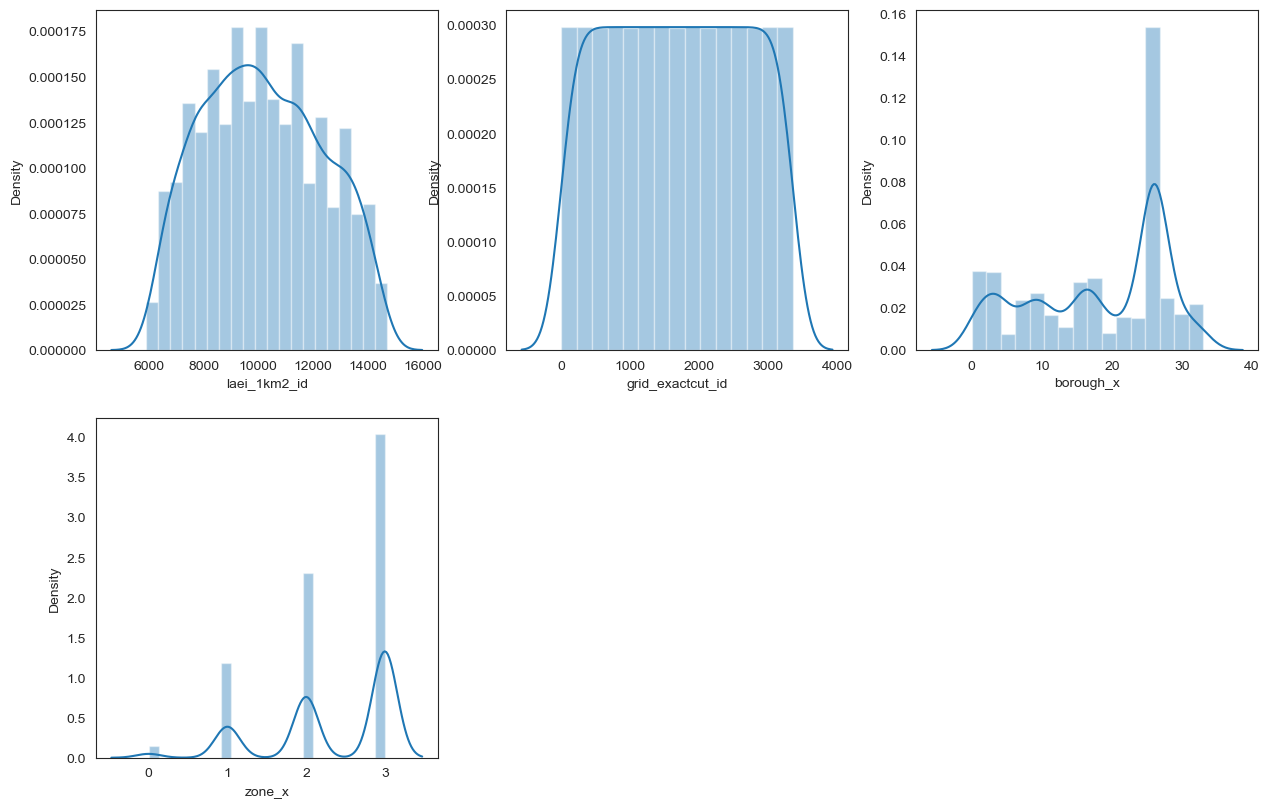

In [101]:
#Show the distribution of the features


fig=plt.figure(figsize=(15,15))

for i in range(0,4):
  ax=fig.add_subplot(3,3,i+1)
  sns.distplot(master_CO2_df.iloc[:,i], ax = ax)

    

<Axes: >

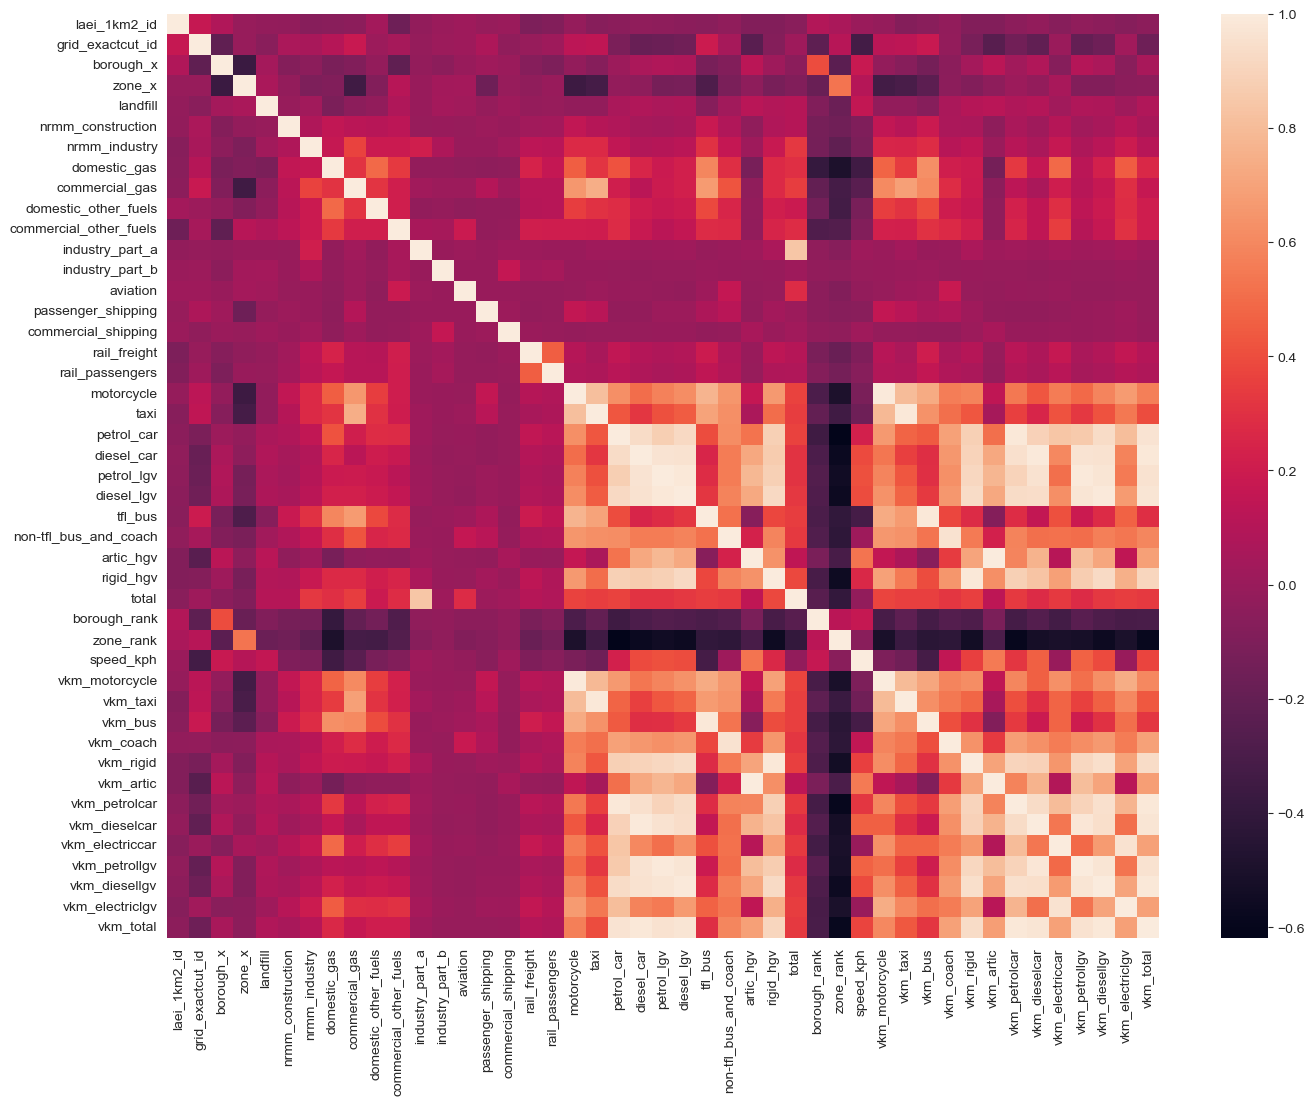

In [102]:
plt.figure(figsize = (16, 12))
sns.heatmap(co2_corr)     


#### Observation:
    * The emission of CO2 is substantially influenced by industrial activities represented by variable "industry_part_a,"          which exhibits a strong association with factors such as non-road mobile machinery (NRMM), commercial gas usage, and        the number of kilometers traveled by taxis.
    
     * It is noteworthy that a positive correlation exists between commercial gas usage and the number of kilometers        traveled by taxis, while both of them exhibit a strong negative correlation with another variable.speed 

<Axes: xlabel='industry_part_a', ylabel='total'>

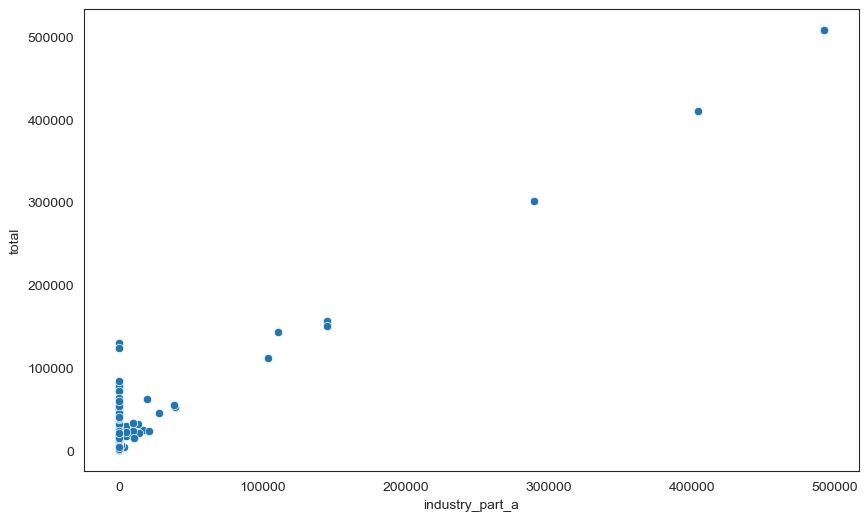

In [103]:
# visualize the relationship between total industry_part_a
plt.figure(figsize=(10,6))
sns.scatterplot(x=master_CO2_df['industry_part_a'],y=master_CO2_df['total'])

#### Observation:
 * The correlation coefficient between these two variables is strong almost = .8
 
 * It seems that to decrease the total emission of CO2 the large industry factory need to be monitored for appropriate ploices to ensure better air quality. 

<Figure size 10000x10000 with 0 Axes>

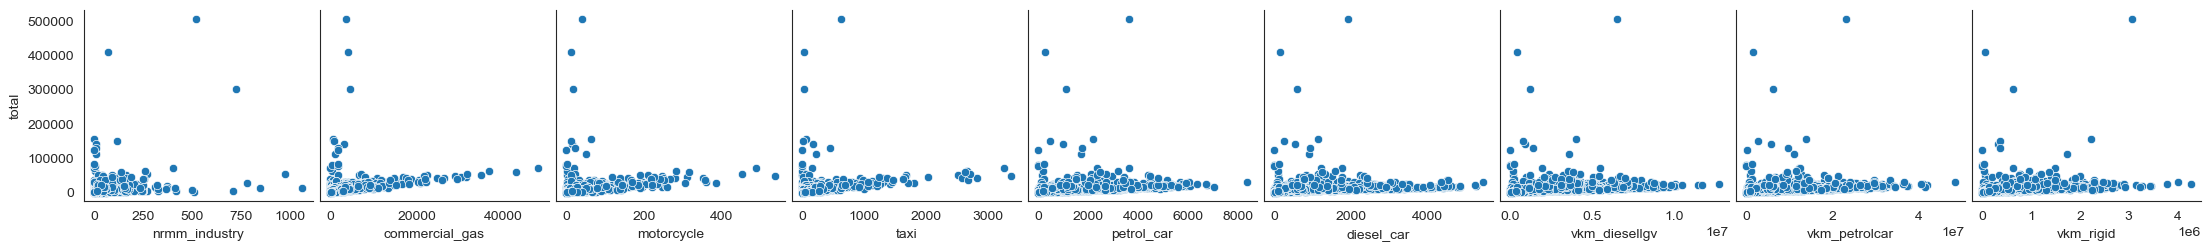

In [104]:
# create pairplot with  variable that moderatly correlated with target variable.
#1-nrmm_industry =.32
#2-commercial_gas=.34
#3- motorcycle =.367
#4-taxi =0.342674
#5- petrol_car=0.364705
#6-diesel_car =0.308915
#7-vkm_diesellgv =0.347298
#8-vkm_petrolcar=0.334708
#9-vkm_rigid=0.353528
plt.figure(figsize=(100,100))
data=master_CO2_df[['nrmm_industry','commercial_gas','motorcycle','taxi','petrol_car','diesel_car','vkm_diesellgv','vkm_petrolcar','vkm_rigid','total']]
sns.pairplot(data,y_vars='total',x_vars=['nrmm_industry','commercial_gas','motorcycle','taxi','petrol_car','diesel_car','vkm_diesellgv','vkm_petrolcar','vkm_rigid'])


### Obsevations:

* The correlation matrix shows that there is a moderate association with following variables that might affect the CO2 polution


In [105]:
## get the zones of industry_part_a
master_CO2_df.query("industry_part_a > 0")

laei_1km2_id  grid_exactcut_id  borough_x  zone_x      landfill  \
231          10428               232         26       2      0.000000   
233          10599               234         26       2   7797.780629   
615           7827               616         10       3    136.791804   
830           9561               831          0       3   1203.302125   
835           9690               836         17       3    120.995383   
858           9898               859         25       1      0.000000   
898          10238               899         11       3      0.000000   
959          10903               960         18       3   2482.587706   
1070         11939              1071         21       3      0.000000   
1303          7824              1304         10       3      0.000000   
1451          9188              1452          3       3      0.000000   
1465          9208              1466         25       1      0.000000   
1504          9556              1505         25       1      0.000000   
1507          9560              1508          0       3   1014.643906   
1571         10235              1572         23       1      0.000000   
1589         10257              1590         26       2    544.422252   
1733         11622              1734          2       3      0.000000   
1965          7795              1966         26       2      0.000000   
2218         10036              2219         17       3      0.000000   
2221         10038              2222         17       3    653.779610   
2250         10078              2251          2       3      0.000000   
2251         10080              2252         16       3  17636.286560   
2365         11415              2366         18       3      0.000000   
2597          6968              2598         10       3      0.000000   
2697          8322              2698         15       3      0.000000   
2978         10736              2979         28       3      0.000000   
3004         10894              3005         17       3      0.000000   
3143         12467              3144          8       3      0.000000   
3334          9715              3335         19       0      0.000000   

      nrmm_construction  nrmm_industry  domestic_gas  commercial_gas  \
231            0.000000     162.226314    142.608483     6763.637074   
233            0.000000       3.814604    265.774013      330.210488   
615            0.000000     521.692283    531.954994     3550.711767   
830            0.000000       0.000000    228.633748      722.025484   
835           11.775603       0.267695   3655.718817     1184.591852   
858            3.819115       7.577362   1299.713904     3208.544795   
898            0.000000       1.770037    282.923302      284.847154   
959            7.319969       4.576732   1731.764493      585.241332   
1070           0.000000      33.972237   2780.647826     1929.251768   
1303           5.410412       6.543882   5488.912638      833.806515   
1451          10.820824       2.076916   6498.631146     3150.029095   
1465          46.784153      33.892859  10985.104713     5214.308792   
1504           0.000000       9.818930    146.108103     1212.361099   
1507           0.000000     118.275844    164.577262      868.854430   
1571           0.000000      72.881422   1435.466870     4073.019442   
1589           0.000000     779.685545    136.630048     7892.220626   
1733           0.000000       0.713185    159.418268      413.707571   
1965           0.000000      41.265496   1082.812735       80.344863   
2218          11.139084     309.755562   3143.731679     5074.654996   
2221           0.000000     268.025475   1501.067840     7184.627308   
2250         165.813222      30.581501    407.569487     4525.354363   
2251           0.000000       0.000000     37.826532      209.943169   
2365         107.253466       0.987591   2214.572147     1753.856360   
2597           0.000000     722.649283   2368.643323     4568.834085   
2697          3

In [106]:
master_CO2_df.columns

Index(['laei_1km2_id', 'grid_exactcut_id', 'borough_x', 'zone_x', 'landfill',
       'nrmm_construction', 'nrmm_industry', 'domestic_gas', 'commercial_gas',
       'domestic_other_fuels', 'commercial_other_fuels', 'industry_part_a',
       'industry_part_b', 'aviation', 'passenger_shipping',
       'commercial_shipping', 'rail_freight', 'rail_passengers', 'motorcycle',
       'taxi', 'petrol_car', 'diesel_car', 'petrol_lgv', 'diesel_lgv',
       'tfl_bus', 'non-tfl_bus_and_coach', 'artic_hgv', 'rigid_hgv',
       'speed_kph', 'vkm_motorcycle', 'vkm_taxi', 'vkm_bus', 'vkm_coach',
       'vkm_rigid', 'vkm_artic', 'vkm_petrolcar', 'vkm_dieselcar',
       'vkm_electriccar', 'vkm_petrollgv', 'vkm_diesellgv', 'vkm_electriclgv',
       'total'],
      dtype='object')

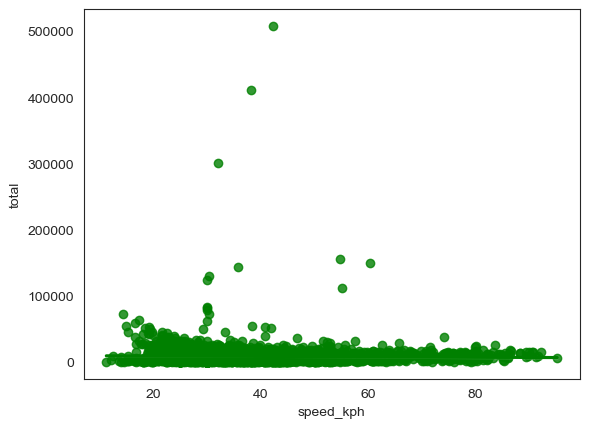

In [107]:

sns.regplot(x="speed_kph", y="total",color="g", data=master_CO2_df)
plt.show()

### 5.2 Analyze the NOx data set 

In [108]:
master_NOx_df.skew()

laei_1km2_id                         0.121716
grid_exactcut_id                     0.000000
household_and_garden                 0.800569
small_waste_and_accidental_fires     3.548170
agriculture                          1.085621
stw                                 28.929701
wts                                  0.000000
landfill                             0.000000
nrmm_construction                   11.665406
nrmm_industry                        8.864682
c&d_dust                             0.000000
domestic_gas                         1.397084
commercial_gas                       7.214252
domestic_other_fuels                 3.154246
commercial_other_fuels               2.364738
industry_part_a                     23.907660
industry_part_b                     27.034469
aviation                            19.207652
passenger_shipping                  18.800851
commercial_shipping                 27.575630
rail_freight                         5.201375
rail_passengers                   

#### Observations:
* Some variables such as commercial_shipping are highly positively skewed,


In [109]:
## Drop VKM_total as its highly correlated with most of vkms features 
master_NOx_df.drop(['vkm_total'], axis=1, inplace=True)

# Drop 'borough_rank','zone_rank' as the used for bivarate analysis
master_NOx_df.drop(['borough_rank','zone_rank'],axis=1,inplace=True)

In [110]:
#drop Unecessary variables as they dont have values 
master_NOx_df.drop(['landfill','wts', 'c&d_dust','resuspension','electric_car','electric_lgv' ], axis=1, inplace=True)

In [111]:
# Apply Label Encoder for categorical variables
NOx_ze = LabelEncoder()
NOx_le = LabelEncoder()
master_NOx_df['zone_x'] = NOx_ze.fit_transform(master_NOx_df['zone_x'])
master_NOx_df['borough_x'] = NOx_le.fit_transform(master_NOx_df['borough_x'])

master_NOx_df



laei_1km2_id  grid_exactcut_id  borough_x  zone_x  household_and_garden  \
0             5910                 1         26       2              0.003669   
1             5911                 2         26       2              0.011739   
2             5912                 3         26       2              0.007337   
3             5915                 4         26       2              0.011006   
4             5916                 5         26       2              0.009538   
...            ...               ...        ...     ...                   ...   
3350         10059              3351         29       1              0.000104   
3351         10059              3352         29       0              0.005430   
3352          9714              3353          5       0              0.005897   
3353          9716              3354         19       0              0.000066   
3354          9716              3355          6       0              0.000664   

      small_waste_and_accidental_fires  agriculture  stw  nrmm_construction  \
0                             0.000574     0.112469  0.0           0.000000   
1                             0.001173     0.110863  0.0           0.000000   
2                             0.002752     0.123716  0.0           0.000000   
3                             0.001260     0.114076  0.0           0.000000   
4                             0.000293     0.133356  0.0           0.000000   
...                                ...          ...  ...                ...   
3350                          0.000003     0.000019  0.0           0.000000   
3351                          0.034812     0.000991  0.0           2.041895   
3352                          0.122293     0.000000  0.0           0.642174   
3353                          0.004252     0.000289  0.0           0.004354   
3354                          0.030170     0.002909  0.0           0.840268   

      nrmm_industry  domestic_gas  commercial_gas  domestic_other_fuels  \
0          0.120304      0.107189        0.203546              0.035980   
1          0.068135      0.060659        0.232852              0.019930   
2          0.322059      0.169102        0.232850              0.019833   
3          0.081635      0.707152        0.469370              0.006177   
4          0.004262      0.732042        0.419513              0.008891   
...             ...           ...             ...                   ...   
3350       0.004002      0.037351        0.135706              0.001602   
3351       0.248102      3.386856        9.034128              0.076097   
3352       6.728697      4.107631       31.344069              0.204544   
3353       0.092792      0.105752        2.862924              0.007840   
3354       0.927918      0.746572       42.430803              0.034606   

      commercial_other_fuels  industry_part_a  industry_part_b  aviation  \
0                   0.262809              0.0              0.0       0.0   
1                   0.294406              0.0              0.0       0.0   
2                   0.294404              0.0              0.0       0.0   
3                   0.294406              0.0              0.0       0.0   
4                   0.294404              0.0              0.0       0.0   
...                      ...              ...              ...       ...   
3350                0.005819              0.0              0.0       0.0   
3351                0.302698              0.0              0.0       0.0   
3352                0.892093              0.0              0.0       0.0   
3353                0.113534              0.0              0.0       0.0   
3354                2.349550              0.0              0.0       0.0   

      passenger_shipping  commercial_shipping  rail_freight  rail_passengers  \
0                    0.0                  0.0           0.0              0.0   
1                    0.0                  0.0           0.0              0.0   
2                    0.0      

In [112]:
NOx_borough_mappings = {index: label for index, label in enumerate(NOx_le.classes_)}
NOx_borough_mappings

{0: 'Barking and Dagenham',
 1: 'Barnet',
 2: 'Bexley',
 3: 'Brent',
 4: 'Bromley',
 5: 'Camden',
 6: 'City',
 7: 'City of Westminster',
 8: 'Croydon',
 9: 'Ealing',
 10: 'Enfield',
 11: 'Greenwich',
 12: 'Hackney',
 13: 'Hammersmith and Fulham',
 14: 'Haringey',
 15: 'Harrow',
 16: 'Havering',
 17: 'Hillingdon',
 18: 'Hounslow',
 19: 'Islington',
 20: 'Kensington and Chelsea',
 21: 'Kingston',
 22: 'Lambeth',
 23: 'Lewisham',
 24: 'Merton',
 25: 'Newham',
 26: 'NonGLA',
 27: 'Redbridge',
 28: 'Richmond',
 29: 'Southwark',
 30: 'Sutton',
 31: 'Tower Hamlets',
 32: 'Waltham Forest',
 33: 'Wandsworth'}

In [113]:
NOx_zone_mappings = {index: label for index, label in enumerate(NOx_ze.classes_)}
NOx_zone_mappings

{0: 'Central', 1: 'Inner', 2: 'NonGLA', 3: 'Outer'}

In [114]:
# move the 'col1' column to the end of the DataFrame
cols = list(master_NOx_df.columns)
cols.append(cols.pop(cols.index('total')))
master_NOx_df = master_NOx_df[cols]


#### Standerizes master_NOx_df dataset

In [115]:
# create a robust scaler object
scaler = RobustScaler()

# apply the robust scaler to the data
scaler.fit(master_NOx_df)
# apply the scaling transformation to the data
scaled_master_NOx = scaler.transform(master_NOx_df)

# create a new pandas DataFrame with the scaled data
scaled_master_NOx = pd.DataFrame(scaled_master_NOx, columns=master_NOx_df.columns)

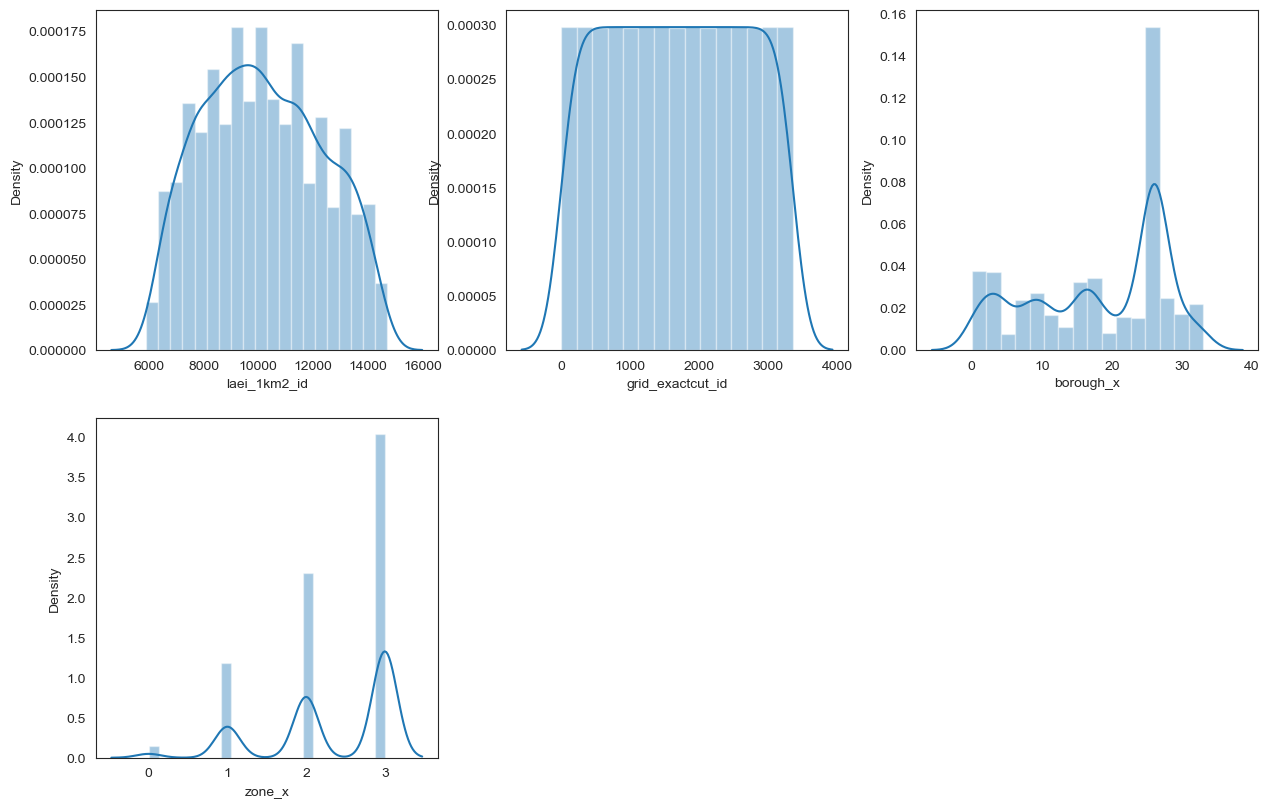

In [116]:
#Show the distribution of the features


fig=plt.figure(figsize=(15,15))

for i in range(0,4):
  ax=fig.add_subplot(3,3,i+1)
  sns.distplot(master_NOx_df.iloc[:,i], ax = ax)

In [117]:
scaled_master_NOx.corr()

laei_1km2_id  grid_exactcut_id  borough_x  \
laei_1km2_id                          1.000000          0.166879   0.089374   
grid_exactcut_id                      0.166879          1.000000  -0.216523   
borough_x                             0.089374         -0.216523   1.000000   
zone_x                               -0.007056         -0.005870  -0.367736   
household_and_garden                  0.044635          0.005416  -0.125850   
small_waste_and_accidental_fires     -0.064368          0.120751  -0.106801   
agriculture                           0.029020         -0.292027   0.177277   
stw                                   0.008625         -0.010972   0.013085   
nrmm_construction                    -0.028952          0.069676  -0.076738   
nrmm_industry                        -0.062088          0.057831  -0.044306   
domestic_gas                         -0.055994          0.104963  -0.114094   
commercial_gas                       -0.047002          0.183372  -0.091834   
domestic_other_fuels                  0.031688          0.012666  -0.020545   
commercial_other_fuels               -0.158454          0.047901  -0.214219   
industry_part_a                      -0.022701         -0.007168  -0.018677   
industry_part_b                      -0.000929          0.013231  -0.043368   
aviation                              0.016911          0.020606   0.004336   
passenger_shipping                   -0.004899          0.071683   0.018698   
commercial_shipping                   0.002874         -0.030103   0.000681   
rail_freight                         -0.103736         -0.010715  -0.072130   
rail_passengers                      -0.067722          0.018005  -0.093244   
motorcycle                           -0.012121          0.041843   0.016616   
taxi                                 -0.065424          0.151618  -0.075339   
petrol_car                           -0.064143         -0.083231  -0.016950   
diesel_car                           -0.036694         -0.188748   0.070931   
petrol_lgv                           -0.035333         -0.216609   0.113809   
diesel_lgv                           -0.054018         -0.143129   0.063140   
tfl_bus                              -0.059519          0.192087  -0.131839   
non-tfl_bus_and_coach                -0.029716          0.082156  -0.098880   
artic_hgv                            -0.073299         -0.219001   0.103620   
rigid_hgv                            -0.076660         -0.014419  -0.016354   
speed_kph                             0.004754         -0.330176   0.176220   
vkm_motorcycle                       -0.013633          0.123727  -0.020386   
vkm_taxi                             -0.075343          0.134803  -0.065178   
vkm_bus                              -0.058685          0.183737  -0.131866   
vkm_coach                            -0.027488         -0.018245  -0.052480   
vkm_rigid                            -0.080948         -0.122527   0.041849   
vkm_artic                            -0.081216         -0.245370   0.125848   
vkm_petrolcar                        -0.048012         -0.148249   0.031371   
vkm_dieselcar                        -0.027329         -0.211134   0.087812   
vkm_electriccar                      -0.067360          0.001630  -0.071679   
vkm_petrollgv                        -0.033039         -0.199419   0.099370   
vkm_diesellgv                        -0.046089         -0.158675   0.067175   
vkm_electriclgv                      -0.069563          0.028122  -0.058594   
conct                                -0.043447          0.168051  -0.082141   
total                                -0.055056          0.018496  -0.048433   

                                    zone_x  household_and_garden  \
laei_1km2_id                     -0.007056              0.044635   
grid_exactcut_id                 -0.005870              0.005416   
borough_x                        -0.367736             -0.125850   
zone_x                            1.000000      

In [118]:
scaled_master_NOx.corr()['total'].nlargest(20)

total                    1.000000
industry_part_a          0.581482
aviation                 0.528664
rigid_hgv                0.524396
petrol_car               0.473446
vkm_rigid                0.462892
diesel_lgv               0.462759
vkm_motorcycle           0.458708
vkm_coach                0.458421
non-tfl_bus_and_coach    0.456328
motorcycle               0.455008
vkm_petrolcar            0.447985
vkm_diesellgv            0.443219
vkm_bus                  0.437028
vkm_electriclgv          0.429802
diesel_car               0.424377
tfl_bus                  0.421504
vkm_taxi                 0.420610
vkm_electriccar          0.409743
taxi                     0.404388
Name: total, dtype: float64

In [119]:
scaled_master_NOx.corr()['total'].nsmallest(20)

agriculture            -0.138258
zone_x                 -0.091246
laei_1km2_id           -0.055056
borough_x              -0.048433
speed_kph              -0.008081
grid_exactcut_id        0.018496
passenger_shipping      0.047622
industry_part_b         0.096085
rail_passengers         0.137764
rail_freight            0.155405
household_and_garden    0.156820
commercial_shipping     0.176521
domestic_other_fuels    0.199337
vkm_artic               0.224817
nrmm_construction       0.232609
stw                     0.263324
artic_hgv               0.286207
domestic_gas            0.290651
conct                   0.304573
nrmm_industry           0.305317
Name: total, dtype: float64

<Axes: >

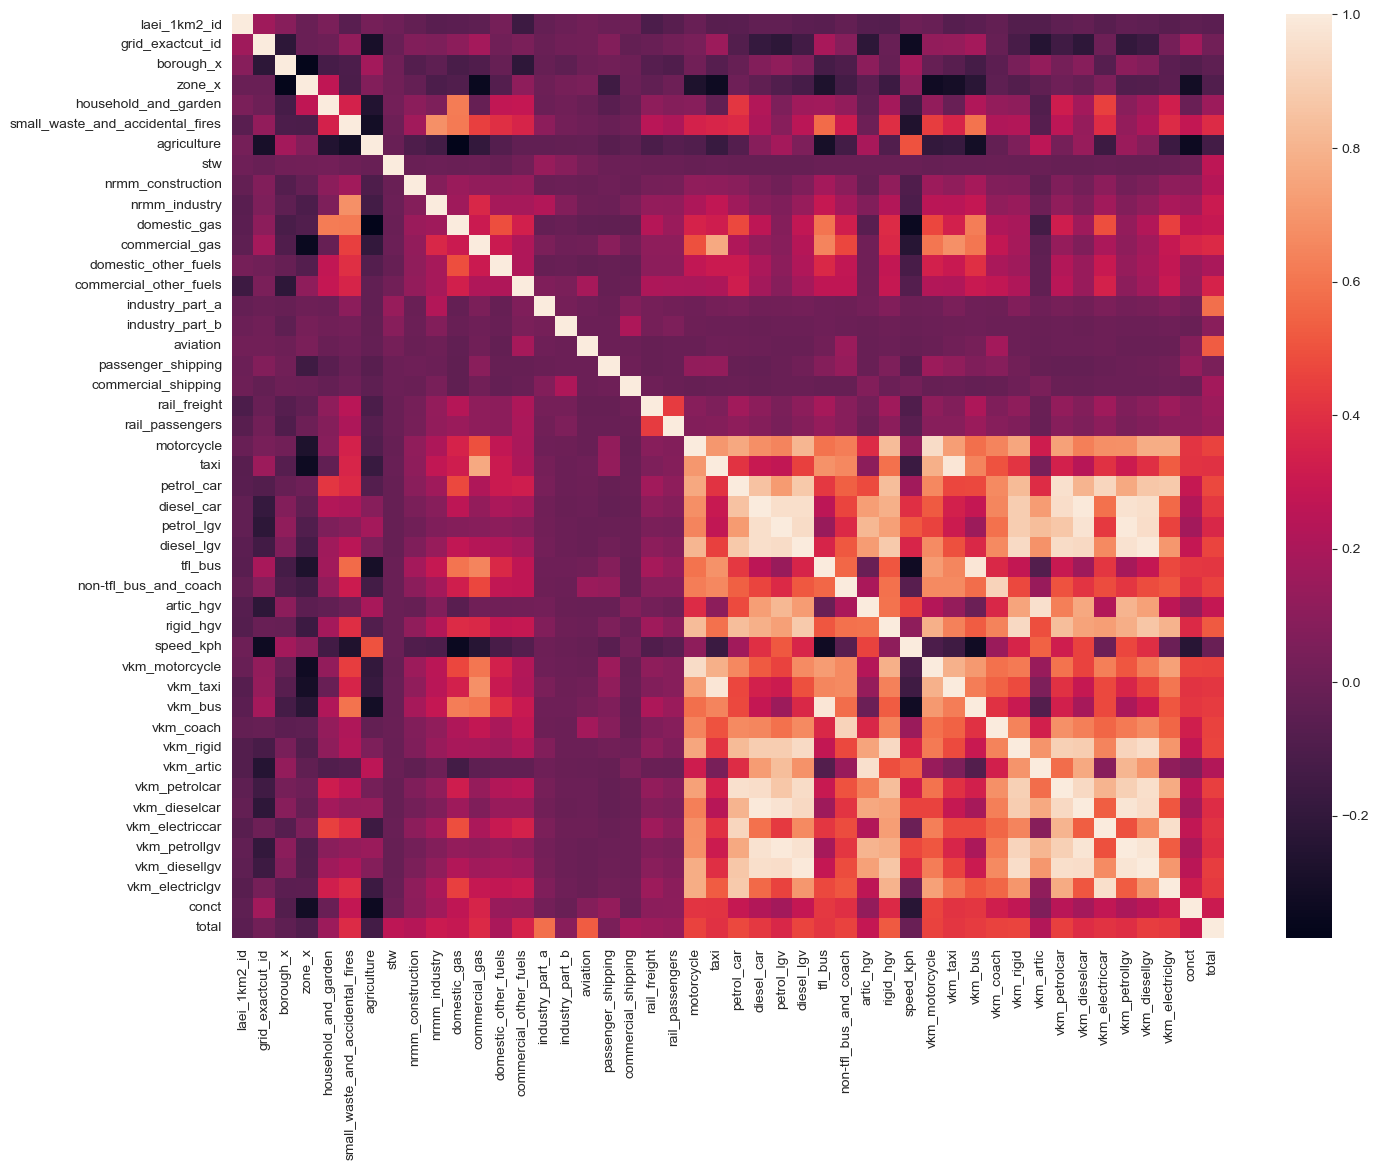

In [120]:
plt.figure(figsize = (16, 12))
sns.heatmap(scaled_master_NOx.corr())

### Observations:
    * As per the analysis, NOx exhibits a moderate positive correlation with industry_part_a, aviation, and rigid_hgv. Conversely, it displays a negative correlation with agriculture, speed_kph, and passenger_shipping.

In [121]:
## Lets study the consentration correlations
print(scaled_master_NOx.corr()['conct'].nlargest(10))
print(scaled_master_NOx.corr()['conct'].nsmallest(10))

conct                    1.000000
vkm_motorcycle           0.459774
tfl_bus                  0.424866
vkm_bus                  0.420516
motorcycle               0.413692
vkm_taxi                 0.407118
taxi                     0.406057
non-tfl_bus_and_coach    0.396521
rigid_hgv                0.375589
commercial_gas           0.354468
Name: conct, dtype: float64
agriculture            -0.338464
zone_x                 -0.313497
speed_kph              -0.235735
borough_x              -0.082141
laei_1km2_id           -0.043447
household_and_garden   -0.010132
industry_part_b        -0.007097
commercial_shipping    -0.004254
stw                     0.002833
industry_part_a         0.023890
Name: conct, dtype: float64


**Observation**

     Based on the analysis, there is a moderate correlation between NOx concentration and vkm_motorcycle, which in turn has a moderate correlation with Total. Additionally, NOx concentration is found to have a negative correlation with concentration. This implies that a slight increase in speed, calculated using the emission factor for all street intercepts with the exact_cut_ic, could lead to a reduction in NOx emissions in the respective areas.       

### 5.3 Analyzing master_PM10_df dataset

In [122]:
## Drop VKM_total as its highly correlated with most of vkms features 
master_PM10_df.drop(['vkm_total'], axis=1, inplace=True)

# Drop 'borough_rank','zone_rank' as the used for bivarate analysis
master_PM10_df.drop(['borough_rank','zone_rank'],axis=1,inplace=True)

#drop Unecessary variables as they dont have values 
master_PM10_df.drop(['stw'], axis=1, inplace=True)

In [123]:
# move the 'col1' column to the end of the DataFrame
cols = list(master_PM10_df.columns)
cols.append(cols.pop(cols.index('total')))
master_PM10_df = master_PM10_df[cols]
master_PM10_df


laei_1km2_id  grid_exactcut_id  borough_x   zone_x  \
0             5910                 1     NonGLA   NonGLA   
1             5911                 2     NonGLA   NonGLA   
2             5912                 3     NonGLA   NonGLA   
3             5915                 4     NonGLA   NonGLA   
4             5916                 5     NonGLA   NonGLA   
...            ...               ...        ...      ...   
3350         10059              3351  Southwark    Inner   
3351         10059              3352  Southwark  Central   
3352          9714              3353     Camden  Central   
3353          9716              3354  Islington  Central   
3354          9716              3355       City  Central   

      household_and_garden  small_waste_and_accidental_fires  agriculture  \
0                 0.000091                          0.006338     0.011741   
1                 0.000290                          0.018299     0.009654   
2                 0.000181                          0.017470     0.011879   
3                 0.000272                          0.017637     0.012895   
4                 0.000236                          0.012895     0.015345   
...                    ...                               ...          ...   
3350              0.000003                          0.000140     0.000002   
3351              0.000134                          0.170796     0.000118   
3352              0.000146                          0.445587     0.000000   
3353              0.000002                          0.022588     0.000036   
3354              0.000016                          0.107998     0.000361   

      wts  landfill  nrmm_construction  nrmm_industry  c&d_dust  domestic_gas  \
0     0.0  0.000038           0.000000       0.006436  0.000000      0.001381   
1     0.0  0.000000           0.000000       0.003645  0.000000      0.000781   
2     0.0  0.000000           0.000000       0.017229  0.000000      0.002178   
3     0.0  0.000000           0.000000       0.004367  0.000000      0.009109   
4     0.0  0.000000           0.000000       0.000228  0.000000      0.009429   
...   ...       ...                ...            ...       ...           ...   
3350  0.0  0.000000           0.000000       0.000214  0.000000      0.000471   
3351  0.0  0.000000           0.213007       0.013272  0.041106      0.042729   
3352  0.0  0.000000           0.066991       0.359953  0.012928      0.054683   
3353  0.0  0.000000           0.000454       0.004964  0.000088      0.001337   
3354  0.0  0.000000           0.087655       0.049639  0.016916      0.009441   

      commercial_gas  domestic_other_fuels  commercial_other_fuels  \
0           0.003075              0.012512                0.032046   
1           0.003518              0.002802                0.036826   
2           0.003518              0.003332                0.036826   
3           0.007091              0.000870                0.036826   
4           0.006338              0.000745                0.036826   
...              ...                   ...                     ...   
3350        0.002050              0.000069                0.000504   
3351        0.136481              0.018491                0.026224   
3352        0.473522              0.062054                0.072492   
3353        0.043251              0.000665                0.009714   
3354        0.641012              0.001483                0.196507   

      industry_part_a  industry_part_b  aviation  passenger_shipping  \
0                 0.0              0.0       0.0                 0.0   
1                 0.0              0.0       0.0                 0.0   
2                 0.0              0.0       0.0                 0.0   
3                 0.0              0.0       0.0                 0.0   
4                 0.0              0.0       0.0                 0.0   
...               ...              ...       ...                 ...   
3350              0.0              0.0    

In [124]:
# # 1-* Apply Label Encoder for categorical variables
PM10_ze = LabelEncoder()
PM10_le = LabelEncoder()
master_PM10_df['zone_x'] = PM10_ze.fit_transform(master_PM10_df['zone_x'])
master_PM10_df['borough_x'] = PM10_le.fit_transform(master_PM10_df['borough_x'])

master_PM10_df





laei_1km2_id  grid_exactcut_id  borough_x  zone_x  household_and_garden  \
0             5910                 1         26       2              0.000091   
1             5911                 2         26       2              0.000290   
2             5912                 3         26       2              0.000181   
3             5915                 4         26       2              0.000272   
4             5916                 5         26       2              0.000236   
...            ...               ...        ...     ...                   ...   
3350         10059              3351         29       1              0.000003   
3351         10059              3352         29       0              0.000134   
3352          9714              3353          5       0              0.000146   
3353          9716              3354         19       0              0.000002   
3354          9716              3355          6       0              0.000016   

      small_waste_and_accidental_fires  agriculture  wts  landfill  \
0                             0.006338     0.011741  0.0  0.000038   
1                             0.018299     0.009654  0.0  0.000000   
2                             0.017470     0.011879  0.0  0.000000   
3                             0.017637     0.012895  0.0  0.000000   
4                             0.012895     0.015345  0.0  0.000000   
...                                ...          ...  ...       ...   
3350                          0.000140     0.000002  0.0  0.000000   
3351                          0.170796     0.000118  0.0  0.000000   
3352                          0.445587     0.000000  0.0  0.000000   
3353                          0.022588     0.000036  0.0  0.000000   
3354                          0.107998     0.000361  0.0  0.000000   

      nrmm_construction  nrmm_industry  c&d_dust  domestic_gas  \
0              0.000000       0.006436  0.000000      0.001381   
1              0.000000       0.003645  0.000000      0.000781   
2              0.000000       0.017229  0.000000      0.002178   
3              0.000000       0.004367  0.000000      0.009109   
4              0.000000       0.000228  0.000000      0.009429   
...                 ...            ...       ...           ...   
3350           0.000000       0.000214  0.000000      0.000471   
3351           0.213007       0.013272  0.041106      0.042729   
3352           0.066991       0.359953  0.012928      0.054683   
3353           0.000454       0.004964  0.000088      0.001337   
3354           0.087655       0.049639  0.016916      0.009441   

      commercial_gas  domestic_other_fuels  commercial_other_fuels  \
0           0.003075              0.012512                0.032046   
1           0.003518              0.002802                0.036826   
2           0.003518              0.003332                0.036826   
3           0.007091              0.000870                0.036826   
4           0.006338              0.000745                0.036826   
...              ...                   ...                     ...   
3350        0.002050              0.000069                0.000504   
3351        0.136481              0.018491                0.026224   
3352        0.473522              0.062054                0.072492   
3353        0.043251              0.000665                0.009714   
3354        0.641012              0.001483                0.196507   

      industry_part_a  industry_part_b  aviation  passenger_shipping  \
0                 0.0              0.0       0.0                 0.0   
1                 0.0              0.0       0.0                 0.0   
2                 0.0              0.0       0.0                 0.0   
3                 0.0              0.0       0.0                 0.0   
4                 0.0              0.0       0.0                 0.0   
...               ...              ...       ...                 ...   
3350              0.0              0.0       0.0      

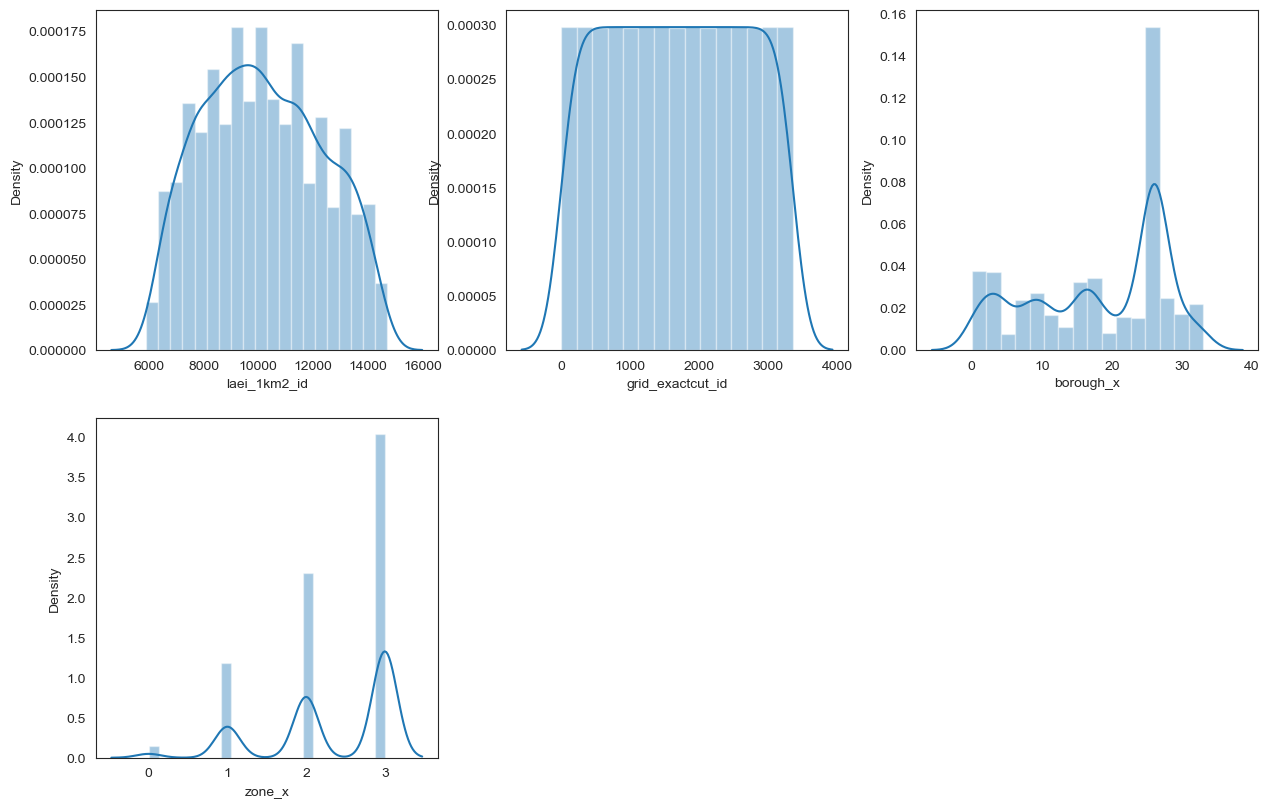

In [125]:
#Show the distribution of the features


fig=plt.figure(figsize=(15,15))

for i in range(0,4):
  ax=fig.add_subplot(3,3,i+1)
  sns.distplot(master_PM10_df.iloc[:,i], ax = ax)

In [126]:
PM10_borough_mappings = {index: label for index, label in enumerate(PM10_le.classes_)}
PM10_borough_mappings

{0: 'Barking and Dagenham',
 1: 'Barnet',
 2: 'Bexley',
 3: 'Brent',
 4: 'Bromley',
 5: 'Camden',
 6: 'City',
 7: 'City of Westminster',
 8: 'Croydon',
 9: 'Ealing',
 10: 'Enfield',
 11: 'Greenwich',
 12: 'Hackney',
 13: 'Hammersmith and Fulham',
 14: 'Haringey',
 15: 'Harrow',
 16: 'Havering',
 17: 'Hillingdon',
 18: 'Hounslow',
 19: 'Islington',
 20: 'Kensington and Chelsea',
 21: 'Kingston',
 22: 'Lambeth',
 23: 'Lewisham',
 24: 'Merton',
 25: 'Newham',
 26: 'NonGLA',
 27: 'Redbridge',
 28: 'Richmond',
 29: 'Southwark',
 30: 'Sutton',
 31: 'Tower Hamlets',
 32: 'Waltham Forest',
 33: 'Wandsworth'}

In [127]:
PM10_zone_mappings = {index: label for index, label in enumerate(PM10_ze.classes_)}
PM10_zone_mappings

{0: 'Central', 1: 'Inner', 2: 'NonGLA', 3: 'Outer'}

In [128]:
## Transform the dataset using robust scaler as its less sensitive to data skewness
# create a robust scaler object
scaler = RobustScaler()

# apply the robust scaler to the data
scaler.fit(master_PM10_df)
# apply the scaling transformation to the data
scaled_master_PM10 = scaler.transform(master_PM10_df)

# create a new pandas DataFrame with the scaled data
scaled_master_PM10 = pd.DataFrame(scaled_master_PM10, columns=master_PM10_df.columns)

In [129]:
scaled_master_PM10.corr()

laei_1km2_id  grid_exactcut_id  borough_x  \
laei_1km2_id                          1.000000          0.166879   0.089374   
grid_exactcut_id                      0.166879          1.000000  -0.216523   
borough_x                             0.089374         -0.216523   1.000000   
zone_x                               -0.007056         -0.005870  -0.367736   
household_and_garden                  0.044635          0.005416  -0.125850   
small_waste_and_accidental_fires     -0.047495          0.118242  -0.147858   
agriculture                           0.081488         -0.289903   0.215985   
wts                                  -0.029113         -0.004586  -0.029428   
landfill                              0.022308         -0.040044   0.043144   
nrmm_construction                    -0.028952          0.069676  -0.076738   
nrmm_industry                        -0.062088          0.057831  -0.044306   
c&d_dust                             -0.028952          0.069676  -0.076738   
domestic_gas                         -0.059678          0.102948  -0.115277   
commercial_gas                       -0.047002          0.183372  -0.091834   
domestic_other_fuels                 -0.007050          0.004462  -0.017132   
commercial_other_fuels               -0.208464         -0.061779  -0.078439   
industry_part_a                      -0.006142          0.018984  -0.013947   
industry_part_b                      -0.000787          0.021935  -0.050177   
aviation                              0.013403          0.017051  -0.003038   
passenger_shipping                   -0.004795          0.071695   0.017945   
commercial_shipping                   0.003219         -0.031364   0.004685   
rail_freight                         -0.103736         -0.010715  -0.072130   
rail_passengers                      -0.044988          0.020664  -0.074729   
resuspension                         -0.087771         -0.153093   0.054111   
motorcycle                           -0.015198          0.159568  -0.036925   
taxi                                 -0.058452          0.160017  -0.082960   
petrol_car                           -0.045245         -0.029861  -0.056518   
diesel_car                           -0.038533         -0.113223   0.005015   
electric_car                         -0.059327          0.049932  -0.108100   
petrol_lgv                           -0.028671         -0.070187   0.009312   
diesel_lgv                           -0.054486         -0.060013   0.005305   
electric_lgv                         -0.057143          0.087722  -0.094616   
tfl_bus                              -0.058292          0.188470  -0.134423   
non-tfl_bus_and_coach                -0.027801          0.068632  -0.096441   
artic_hgv                            -0.062212         -0.222850   0.105822   
rigid_hgv                            -0.068178         -0.002802  -0.028097   
speed_kph                             0.004754         -0.330176   0.176220   
vkm_motorcycle                       -0.013633          0.123727  -0.020386   
vkm_taxi                             -0.075343          0.134803  -0.065178   
vkm_bus                              -0.058685          0.183737  -0.131866   
vkm_coach                            -0.027488         -0.018245  -0.052480   
vkm_rigid                            -0.080948         -0.122527   0.041849   
vkm_artic                            -0.081216         -0.245370   0.125848   
vkm_petrolcar                        -0.048012         -0.148249   0.031371   
vkm_dieselcar                        -0.027329         -0.211134   0.087812   
vkm_electriccar                      -0.067360          0.001630  -0.071679   
vkm_petrollgv                        -0.033039         -0.199419   0.099370   
vkm_diesellgv                        -0.046089         -0.158675   0.067175   
vkm_electriclgv                      -0.069563          0.028122  -0.058594   
conct                                -0.043447          0.168051  -0.082141   
total

<Axes: >

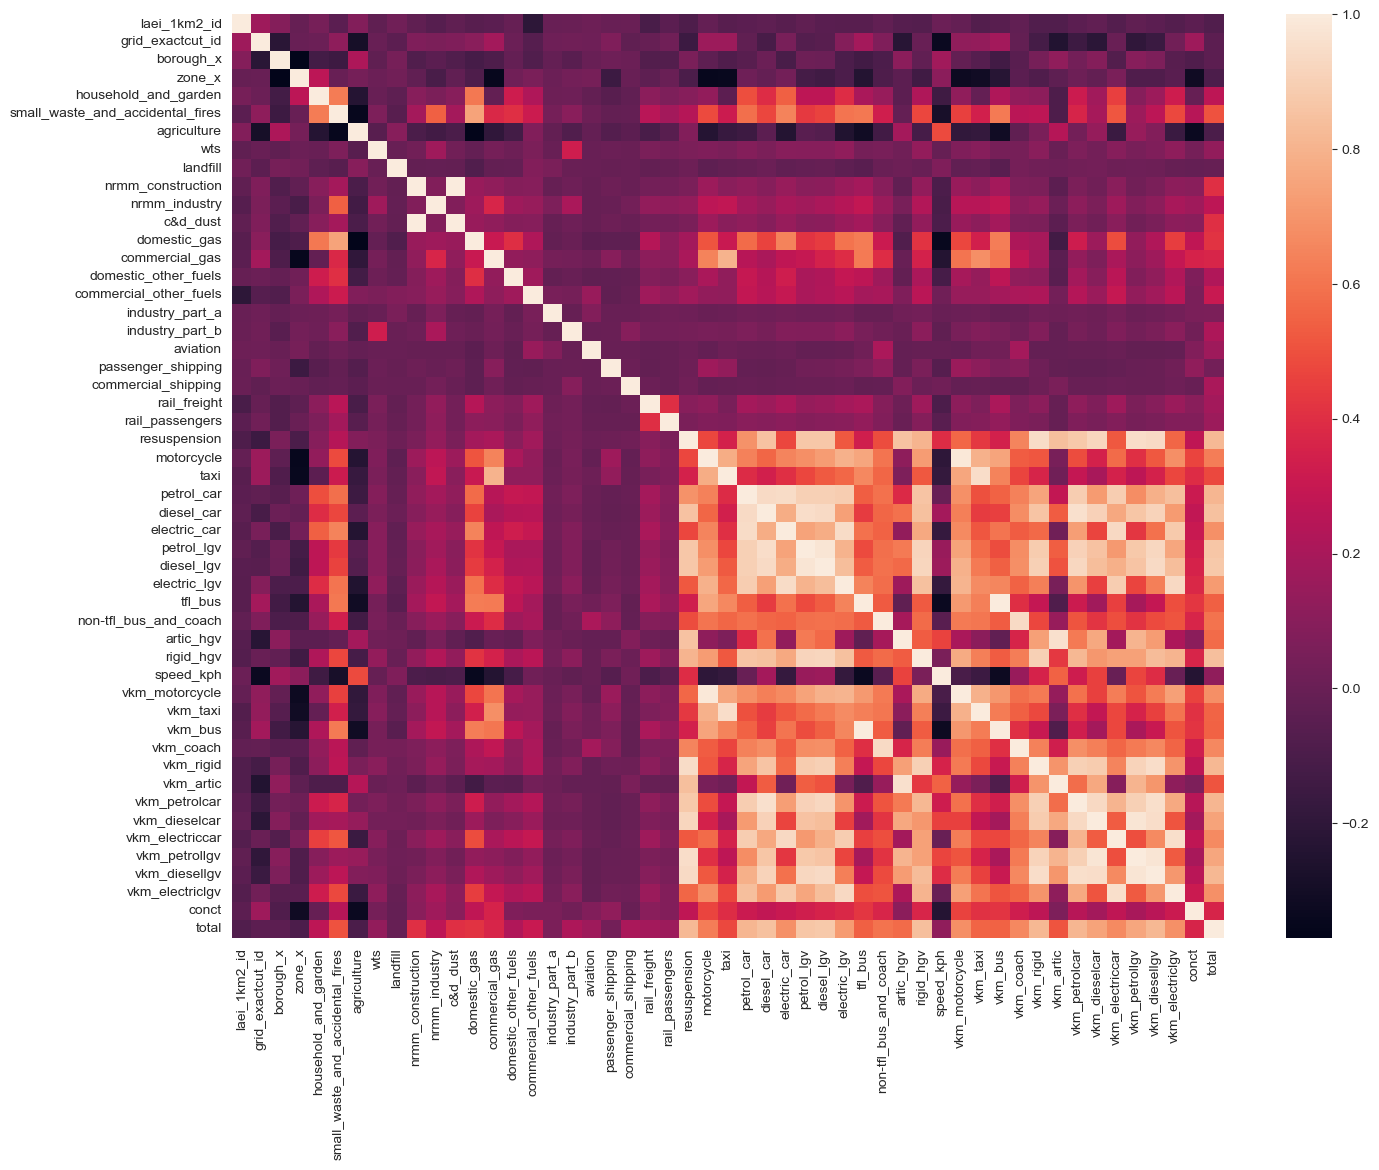

In [130]:
plt.figure(figsize = (16, 12))
sns.heatmap(scaled_master_PM10.corr())

In [131]:
print(scaled_master_PM10.corr()['total'].nlargest(20))
print(scaled_master_PM10.corr()['total'].nsmallest(20))

total                    1.000000
diesel_lgv               0.871609
petrol_lgv               0.863247
diesel_car               0.845961
rigid_hgv                0.842044
resuspension             0.820092
vkm_diesellgv            0.813859
vkm_rigid                0.812917
vkm_petrolcar            0.810671
petrol_car               0.808586
vkm_petrollgv            0.756589
vkm_dieselcar            0.747051
electric_lgv             0.721471
electric_car             0.689377
vkm_electriclgv          0.687444
vkm_motorcycle           0.681554
vkm_electriccar          0.665008
vkm_coach                0.660325
motorcycle               0.628539
non-tfl_bus_and_coach    0.593596
Name: total, dtype: float64
agriculture              -0.101160
zone_x                   -0.094093
laei_1km2_id             -0.080199
borough_x                -0.041870
grid_exactcut_id         -0.040332
landfill                 -0.007277
passenger_shipping        0.033589
industry_part_a           0.059078
speed_kph   

#### Observations:
   
       Based on the analysis, PM10 demonstrates a strong positive correlation with all vehicle types that use diesel and petrol, as well as resuspension. Therefore, reducing the density of road traffic in the respective intercept exact_cut id is expected to result in a significant reduction in PM10 emissions.

### 5.3 Analyzing master_PM25_df dataset

In [132]:
## Drop VKM_total as its highly correlated with most of vkms features 
master_PM25_df.drop(['vkm_total'], axis=1, inplace=True)

# Drop 'borough_rank','zone_rank' as the used for bivarate analysis
master_PM25_df.drop(['borough_rank','zone_rank'],axis=1,inplace=True)

#drop Unecessary variables as they dont have values 
master_PM25_df.drop(['stw'], axis=1, inplace=True)

In [133]:
master_PM25_df

laei_1km2_id  grid_exactcut_id borough_x  zone_x  household_and_garden  \
0             8137               218    NonGLA  NonGLA              0.000017   
1             8309               220    NonGLA  NonGLA              0.000034   
2             8481               222    NonGLA  NonGLA              0.000273   
3             8653               224    NonGLA  NonGLA              0.000273   
4             8825               226    NonGLA  NonGLA              0.000102   
...            ...               ...       ...     ...                   ...   
3350          9228              2818  Havering   Outer              0.000000   
3351          8885               754    NonGLA  NonGLA              0.000000   
3352          8885               755  Havering   Outer              0.000000   
3353          9057              2133    NonGLA  NonGLA              0.000000   
3354          9057              2134  Havering   Outer              0.000000   

      small_waste_and_accidental_fires  agriculture  wts  landfill  \
0                             0.000920     0.012957  0.0  0.000642   
1                             0.001824     0.008299  0.0  0.000088   
2                             0.014594     0.009028  0.0  0.000000   
3                             0.014764     0.011129  0.0  0.000000   
4                             0.005492     0.009892  0.0  0.000000   
...                                ...          ...  ...       ...   
3350                          0.000000     0.002013  0.0  0.000000   
3351                          0.000000     0.010000  0.0  0.000000   
3352                          0.000000     0.001905  0.0  0.000000   
3353                          0.000000     0.003198  0.0  0.000000   
3354                          0.000000     0.009143  0.0  0.000000   

      nrmm_construction  nrmm_industry  c&d_dust  domestic_gas  \
0                   0.0       0.000183       0.0      0.000197   
1                   0.0       0.000000       0.0      0.002510   
2                   0.0       0.000000       0.0      0.007726   
3                   0.0       0.000241       0.0      0.006249   
4                   0.0       0.000071       0.0      0.004300   
...                 ...            ...       ...           ...   
3350                0.0       0.000000       0.0      0.000056   
3351                0.0       0.000000       0.0      0.000134   
3352                0.0       0.000000       0.0      0.000059   
3353                0.0       0.000000       0.0      0.000041   
3354                0.0       0.000000       0.0      0.000272   

      commercial_gas  domestic_other_fuels  commercial_other_fuels  \
0           0.003562              0.000118                0.108395   
1           0.004083              0.000191                0.066472   
2           0.004280              0.000147                0.042327   
3           0.004279              0.000384                0.042327   
4           0.003098              0.003163                0.042327   
...              ...                   ...                     ...   
3350        0.000154              0.000606                0.004361   
3351        0.000590              0.000606                0.000124   
3352        0.000152              0.000638                0.004616   
3353        0.000182              0.000185                0.000024   
3354        0.000704              0.002969                0.021517   

      industry_part_a  industry_part_b  aviation  passenger_shipping  \
0                 0.0              0.0  0.000000                 0.0   
1                 0.0              0.0  0.000000                 0.0   
2                 0.0              0.0  0.000240                 0.0   
3                 0.0              0.0  0.001219                 0.0   
4                 0.0              0.0  0.000000                 0.0   
...               ...              ...       ...                 ...   
3350              0.0              0.0  0.000000                 0

In [134]:
# # 1-* Apply Label Encoder for categorical variables
PM25_ze = LabelEncoder()
PM25_le = LabelEncoder()
master_PM25_df['zone_x'] = PM25_ze.fit_transform(master_PM25_df['zone_x'])
master_PM25_df['borough_x'] = PM25_le.fit_transform(master_PM25_df['borough_x'])


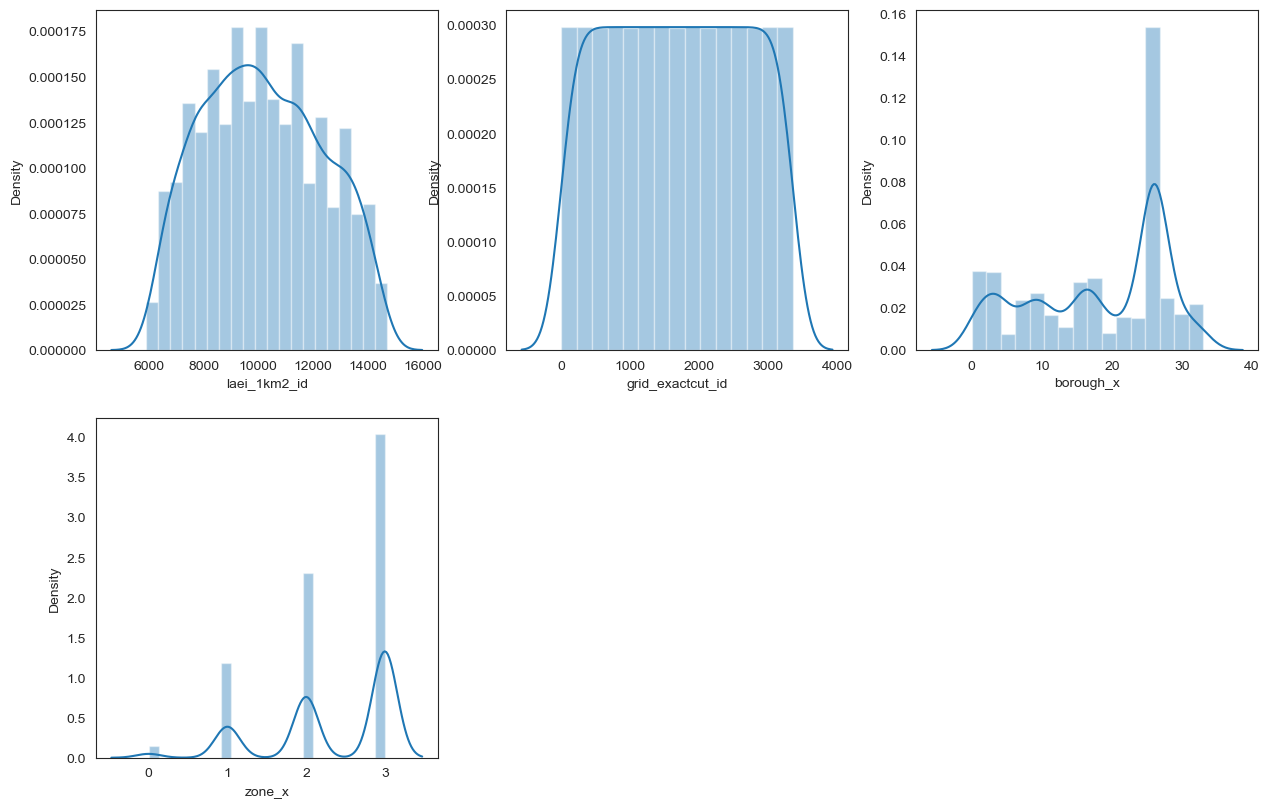

In [135]:
#Show the distribution of the features


fig=plt.figure(figsize=(15,15))

for i in range(0,4):
  ax=fig.add_subplot(3,3,i+1)
  sns.distplot(master_PM25_df.iloc[:,i], ax = ax)

In [136]:
PM25_borough_mappings = {index: label for index, label in enumerate(PM25_le.classes_)}
PM25_borough_mappings

{0: 'Barking and Dagenham',
 1: 'Barnet',
 2: 'Bexley',
 3: 'Brent',
 4: 'Bromley',
 5: 'Camden',
 6: 'City',
 7: 'City of Westminster',
 8: 'Croydon',
 9: 'Ealing',
 10: 'Enfield',
 11: 'Greenwich',
 12: 'Hackney',
 13: 'Hammersmith and Fulham',
 14: 'Haringey',
 15: 'Harrow',
 16: 'Havering',
 17: 'Hillingdon',
 18: 'Hounslow',
 19: 'Islington',
 20: 'Kensington and Chelsea',
 21: 'Kingston',
 22: 'Lambeth',
 23: 'Lewisham',
 24: 'Merton',
 25: 'Newham',
 26: 'NonGLA',
 27: 'Redbridge',
 28: 'Richmond',
 29: 'Southwark',
 30: 'Sutton',
 31: 'Tower Hamlets',
 32: 'Waltham Forest',
 33: 'Wandsworth'}

In [137]:
PM10_zone_mappings = {index: label for index, label in enumerate(PM25_ze.classes_)}
PM10_zone_mappings

{0: 'Central', 1: 'Inner', 2: 'NonGLA', 3: 'Outer'}

In [138]:
## Transform the dataset using robust scaler as its less sensitive to data skewness
# create a robust scaler object
scaler = RobustScaler()

# apply the robust scaler to the data
scaler.fit(master_PM25_df)
# apply the scaling transformation to the data
scaled_master_PM25 = scaler.transform(master_PM25_df)

# create a new pandas DataFrame with the scaled data
scaled_master_PM25 = pd.DataFrame(scaled_master_PM25, columns=master_PM25_df.columns)

In [139]:
scaled_master_PM25

laei_1km2_id  grid_exactcut_id  borough_x  zone_x  household_and_garden  \
0        -0.580752         -0.870602     0.3125    -1.0             -0.385132   
1        -0.528781         -0.869410     0.3125    -1.0             -0.362477   
2        -0.476809         -0.868217     0.3125    -1.0             -0.045310   
3        -0.424838         -0.867024     0.3125    -1.0             -0.045310   
4        -0.372866         -0.865832     0.3125    -1.0             -0.271858   
...            ...               ...        ...     ...                   ...   
3350     -0.251095          0.679785    -0.3125     0.0             -0.407787   
3351     -0.354736         -0.550984     0.3125    -1.0             -0.407787   
3352     -0.354736         -0.550388    -0.3125     0.0             -0.407787   
3353     -0.302765          0.271318     0.3125    -1.0             -0.407787   
3354     -0.302765          0.271914    -0.3125     0.0             -0.407787   

      small_waste_and_accidental_fires  agriculture  wts  landfill  \
0                            -0.370195     1.767038  0.0  0.000642   
1                            -0.360309     1.009324  0.0  0.000088   
2                            -0.220666     1.127813  0.0  0.000000   
3                            -0.218815     1.469559  0.0  0.000000   
4                            -0.320205     1.268336  0.0  0.000000   
...                                ...          ...  ...       ...   
3350                         -0.380258    -0.013237  0.0  0.000000   
3351                         -0.380258     1.286036  0.0  0.000000   
3352                         -0.380258    -0.030721  0.0  0.000000   
3353                         -0.380258     0.179560  0.0  0.000000   
3354                         -0.380258     1.146520  0.0  0.000000   

      nrmm_construction  nrmm_industry  c&d_dust  domestic_gas  \
0                   0.0      -0.180504       0.0     -0.324907   
1                   0.0      -0.216188       0.0     -0.266992   
2                   0.0      -0.216188       0.0     -0.136352   
3                   0.0      -0.169307       0.0     -0.173343   
4                   0.0      -0.202295       0.0     -0.222142   
...                 ...            ...       ...           ...   
3350                0.0      -0.216188       0.0     -0.328446   
3351                0.0      -0.216188       0.0     -0.326495   
3352                0.0      -0.216188       0.0     -0.328378   
3353                0.0      -0.216188       0.0     -0.328814   
3354                0.0      -0.216188       0.0     -0.323027   

      commercial_gas  domestic_other_fuels  commercial_other_fuels  \
0          -0.198035             -0.142636                3.640292   
1          -0.160865             -0.138639                1.988210   
2          -0.146829             -0.141037                1.036724   
3          -0.146939             -0.128088                1.036741   
4          -0.231111              0.023747                1.036741   
...              ...                   ...                     ...   
3350       -0.440926             -0.115982               -0.459373   
3351       -0.409792             -0.115994               -0.626339   
3352       -0.441045             -0.114244               -0.449344   
3353       -0.438893             -0.138955               -0.630275   
3354       -0.401681              0.013127                0.216697   

      industry_part_a  industry_part_b  aviation  passenger_shipping  \
0                 0.0              0.0  0.000000                 0.0   
1                 0.0              0.0  0.000000                 0.0   
2                 0.0              0.0  0.000240                 0.0   
3                 0.0              0.0  0.001219                 0.0   
4                 0.0              0.0  0.000000                 0.0   
...               ...              ...       ...                 ...   
3350              0.0              0.0  0.000000      

In [140]:
# move the 'total' column to the end of the DataFrame
cols = list(scaled_master_PM25.columns)
cols.append(cols.pop(cols.index('total')))
scaled_master_PM25 = scaled_master_PM25[cols]



<Axes: >

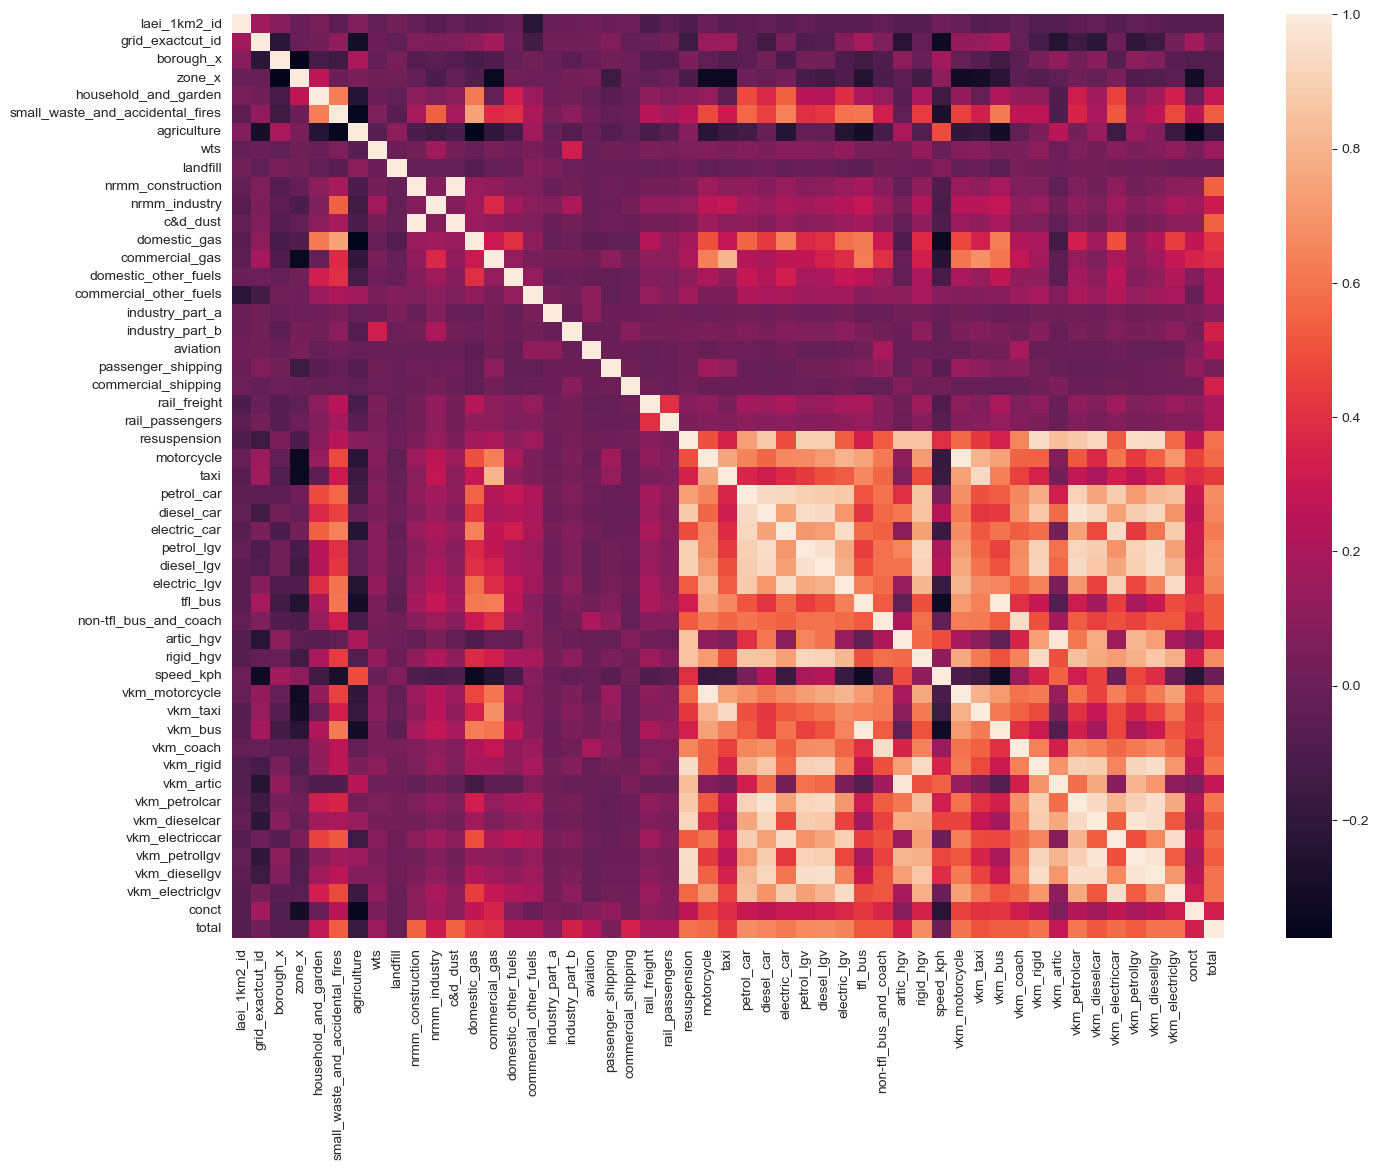

In [141]:
plt.figure(figsize = (16, 12))
sns.heatmap(scaled_master_PM25.corr())

In [142]:
print(scaled_master_PM25.corr()['total'].nlargest(20))
print(scaled_master_PM25.corr()['total'].nsmallest(20))

total                1.000000
rigid_hgv            0.675373
diesel_lgv           0.673933
petrol_car           0.673497
petrol_lgv           0.664633
diesel_car           0.650012
electric_lgv         0.644837
electric_car         0.617543
vkm_petrolcar        0.611934
vkm_diesellgv        0.595514
vkm_rigid            0.595188
vkm_electriclgv      0.591921
vkm_motorcycle       0.591801
resuspension         0.587648
motorcycle           0.573608
vkm_electriccar      0.573440
nrmm_construction    0.546736
c&d_dust             0.546736
vkm_bus              0.530249
vkm_coach            0.528109
Name: total, dtype: float64
agriculture              -0.168294
zone_x                   -0.080838
borough_x                -0.076793
laei_1km2_id             -0.066648
landfill                 -0.014313
speed_kph                -0.003956
grid_exactcut_id          0.014475
passenger_shipping        0.039492
industry_part_a           0.089820
wts                       0.153263
rail_freight          

In [143]:
print(scaled_master_PM25.corr()['rigid_hgv'].nlargest(10))
print(scaled_master_PM25.corr()['rigid_hgv'].nsmallest(20))
print(scaled_master_PM25.corr()['electric_lgv'].nsmallest(10))

rigid_hgv        1.000000
vkm_rigid        0.935899
petrol_lgv       0.922928
diesel_lgv       0.911707
vkm_diesellgv    0.867743
petrol_car       0.856720
resuspension     0.853988
diesel_car       0.853053
vkm_petrolcar    0.843632
electric_lgv     0.813180
Name: rigid_hgv, dtype: float64
zone_x                   -0.140001
agriculture              -0.085487
laei_1km2_id             -0.070986
grid_exactcut_id         -0.025953
borough_x                -0.013748
aviation                 -0.008691
landfill                 -0.001049
commercial_shipping       0.007787
industry_part_a           0.028583
passenger_shipping        0.049392
rail_passengers           0.083391
industry_part_b           0.102952
speed_kph                 0.113570
nrmm_construction         0.117050
c&d_dust                  0.117050
wts                       0.128597
rail_freight              0.159115
commercial_other_fuels    0.193331
domestic_other_fuels      0.195300
household_and_garden      0.198805
Name: ri

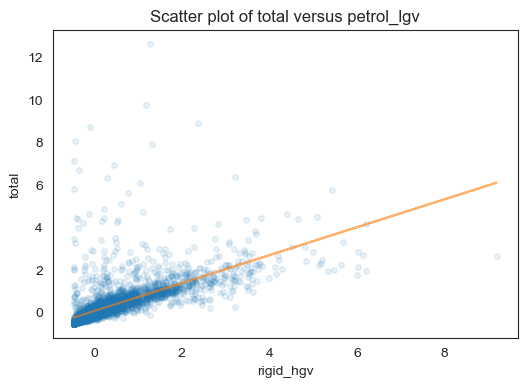

In [144]:
res = linregress(scaled_master_PM25['rigid_hgv'], scaled_master_PM25['total'])
pred_iq = res.intercept + res.slope * scaled_master_PM25['rigid_hgv']

plt.figure(figsize=(6,4))
plt.plot(scaled_master_PM25['rigid_hgv'], scaled_master_PM25['total'], 'o', alpha=0.1, markersize=4)
plt.plot(scaled_master_PM25['rigid_hgv'], pred_iq, alpha=0.6)

plt.xlabel('rigid_hgv')
plt.ylabel('total')
plt.title('Scatter plot of total versus petrol_lgv');

#### Observations:
   
       Based on the analysis, PM25 demonstrates a positive correlation with all LGV and Rigid types that use diesel and petrol, as well as electric_lgv. Therefore, reducing the density of road traffic in the respective intercept exact_cut id is expected to result in a significant reduction in PM25 emissions.

### <font color='blue'> 6- Features Engineering


* Apply Feature selection technique to utilise the important features only.
* The selection depends on choosing the variables with the highest correlation coeffcient (with the target variable "Total")    

In [145]:
scaled_master_CO2.drop('vkm_total', axis=1, inplace= True)

In [146]:
CO2_selected_features = scaled_master_CO2.corr()['total'].nlargest(21).index[1:]
CO2_selected_features

Index(['industry_part_a', 'rigid_hgv', 'vkm_motorcycle', 'motorcycle',
       'petrol_car', 'vkm_rigid', 'vkm_taxi', 'vkm_bus', 'commercial_gas',
       'vkm_electriclgv', 'tfl_bus', 'taxi', 'non-tfl_bus_and_coach',
       'vkm_petrolcar', 'vkm_electriccar', 'nrmm_industry', 'diesel_lgv',
       'vkm_diesellgv', 'vkm_coach', 'diesel_car'],
      dtype='object')

In [147]:
master_CO2_df

laei_1km2_id  grid_exactcut_id  borough_x  zone_x     landfill  \
0             5910                 1         26       2    30.771862   
1             5911                 2         26       2     0.000000   
2             5912                 3         26       2     0.000000   
3             5915                 4         26       2  7648.680119   
4             5916                 5         26       2  2647.389495   
...            ...               ...        ...     ...          ...   
3350         10059              3351         29       1     0.000000   
3351         10059              3352         29       0     0.000000   
3352          9714              3353          5       0     0.000000   
3353          9716              3354         19       0     0.000000   
3354          9716              3355          6       0     0.000000   

      nrmm_construction  nrmm_industry  domestic_gas  commercial_gas  \
0              0.000000      17.438226    140.989217      205.551058   
1              0.000000       9.876312     79.786433      235.145195   
2              0.000000      46.682868    222.424536      235.143255   
3              0.000000      11.833086    930.138644      473.992924   
4              0.000000       0.617749    962.877492      423.644940   
...                 ...            ...           ...             ...   
3350           0.000000       0.580043     48.118730      137.042860   
3351         298.527451      35.962694   4363.242678     9123.098450   
3352          93.886565     975.332360   5583.915009    31652.753264   
3353           0.636519      13.450284    136.563330     2891.118496   
3354         122.848184     134.502843    964.058018    42848.672915   

      domestic_other_fuels  commercial_other_fuels  industry_part_a  \
0                33.359346              117.389451              0.0   
1                19.031179              131.454671              0.0   
2                18.832564              131.453587              0.0   
3                 5.898459              131.454671              0.0   
4                 8.588090              131.453587              0.0   
...                    ...                     ...              ...   
3350              1.559848                2.609887              0.0   
3351             71.903081              135.768286              0.0   
3352            191.474635              400.380345              0.0   
3353              7.587731               50.929356              0.0   
3354             33.703328             1054.208441              0.0   

      industry_part_b  aviation  passenger_shipping  commercial_shipping  \
0                 0.0       0.0                 0.0                  0.0   
1                 0.0       0.0                 0.0                  0.0   
2                 0.0       0.0                 0.0                  0.0   
3                 0.0       0.0                 0.0                  0.0   
4                 0.0       0.0                 0.0                  0.0   
...               ...       ...                 ...                  ...   
3350              0.0       0.0                 0.0                  0.0   
3351              0.0       0.0                 0.0                  0.0   
3352              0.0       0.0                 0.0                  0.0   
3353              0.0       0.0                 0.0                  0.0   
3354              0.0       0.0                 0.0                  0.0   

      rail_freight  rail_passengers  motorcycle         taxi   petrol_car  \
0              0.0              0.0    0.774054     0.723672    56.270062   
1              0.0              0.0   39.496883    96.311449  4371.946372   
2              0.0              0.0   12.542140    47.097267  1948.728458   
3              0.0              0.0    0.772024     0.721706    56.084401   
4              0.0              0.0    0.696501     0.651233    50.638572   
...            ...              ...         ... 

In [148]:
X = master_CO2_df[CO2_selected_features]
y = master_CO2_df['total'].values

In [149]:
#split data into train ,validation and testing sets beore feature selection to avoid overfitting
CO2_X_train, CO2_X_test, CO2_y_train, CO2_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
print(CO2_X_train.shape)
print(CO2_X_test.shape)
print(CO2_y_train.shape)
print(CO2_y_test.shape)

(2684, 20)
(671, 20)
(2684,)
(671,)


### <font color='blue'> 7- Building the ML Model for CO2

As this is a regression problem, then the first go algorithem is linear regression.
we will check the R2_Score, then will apply the rother models (RF, DT, & MLP)


#### <font color='green'> 7.1- Linear Regression Model

In [151]:
#Building and fitting Linear Regression Model
lin_reg=LinearRegression()
lin_reg.fit(CO2_X_train,CO2_y_train)

LinearRegression()

In [152]:
# look for model coeffient
for idx, col_name in enumerate(CO2_X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg.coef_[idx]))

The coefficient for industry_part_a is 1.0019515569542043
The coefficient for rigid_hgv is 7.3569864250351635
The coefficient for vkm_motorcycle is -0.014947947383813805
The coefficient for motorcycle is 108.21550275885672
The coefficient for petrol_car is -15.195036525642815
The coefficient for vkm_rigid is -0.0031160678786458862
The coefficient for vkm_taxi is 0.0034860138896672544
The coefficient for vkm_bus is 0.0037047636056838614
The coefficient for commercial_gas is 1.1438782087197321
The coefficient for vkm_electriclgv is -1.7616402778718905
The coefficient for tfl_bus is 1.0172807325671736
The coefficient for taxi is -14.256865632529344
The coefficient for non-tfl_bus_and_coach is -31.326471101605463
The coefficient for vkm_petrolcar is -0.005893040324229398
The coefficient for vkm_electriccar is 7.843783494143507
The coefficient for nrmm_industry is 3.656292638183987
The coefficient for diesel_lgv is -9.961938122548617
The coefficient for vkm_diesellgv is 0.003041162100922174

In [153]:
print(np.round(lin_reg.score(CO2_X_test, CO2_y_test)*100, 1))

95.6


In [154]:
#Predection 
y_predict=lin_reg.predict(CO2_X_test)

In [155]:
y_predict

array([  3441.6722867 ,   2086.56757861,   1623.68214934,   8230.5771658 ,
        19734.85067271,   2541.37701287,  16775.7591419 ,   9926.90624521,
         4159.44712672,  18415.28669476,   2077.9262561 ,   2273.5686198 ,
         2627.63936084,  10168.49599766,   3470.05778071,   1619.51607841,
         8703.90265328,  16976.86338772,   3000.37774292,  19104.3942299 ,
         2465.08434854,  11986.34126315,   5377.37283876,   2485.66535556,
         3734.91634152,   2023.47221032,   2285.54800398,   4150.27810873,
        12794.94432846,   1625.36122373,   5907.10184017,  10977.8975253 ,
        12082.43463245,   1625.99244584,   2962.48385484,  39679.86579955,
        10177.88827101,  13573.20402017,   4019.80745269,   6760.04173423,
         1692.22173283,   6500.1740522 ,   7387.4949341 ,   5829.91300709,
         5679.0926993 ,   7695.26961423,  17273.60428758,   2349.74324829,
         1740.17847538,   2239.36818256,   7250.26919643,   1655.85109015,
         4624.72877413,  

In [156]:

# performance
def get_performance (model_obj,model_name,n,p):
    model=model_obj
    Training_score=model.score(CO2_X_train,CO2_y_train)
    Testing_score=model.score(CO2_X_test,CO2_y_test)
    R2_score=r2_score(CO2_y_test,y_predict)
    RMSE_score=math.sqrt(mean_squared_error(CO2_y_test,y_predict))
    out_put=pd.DataFrame({'Model':[model_name],'Training_score':[Training_score],'Testing_score':[Testing_score],'R2_score':[R2_score],' RMSE_score':[RMSE_score],'Features_Num':[n],'Pollutant' :[p]})
    return out_put


In [157]:
result_df=get_performance(lin_reg,'Linear Regression',CO2_X_train.shape[1],'CO2')
result_df

Model  Training_score  Testing_score  R2_score   RMSE_score  \
0  Linear Regression        0.898037       0.955826  0.955826  3109.427777   

   Features_Num Pollutant  
0            20       CO2

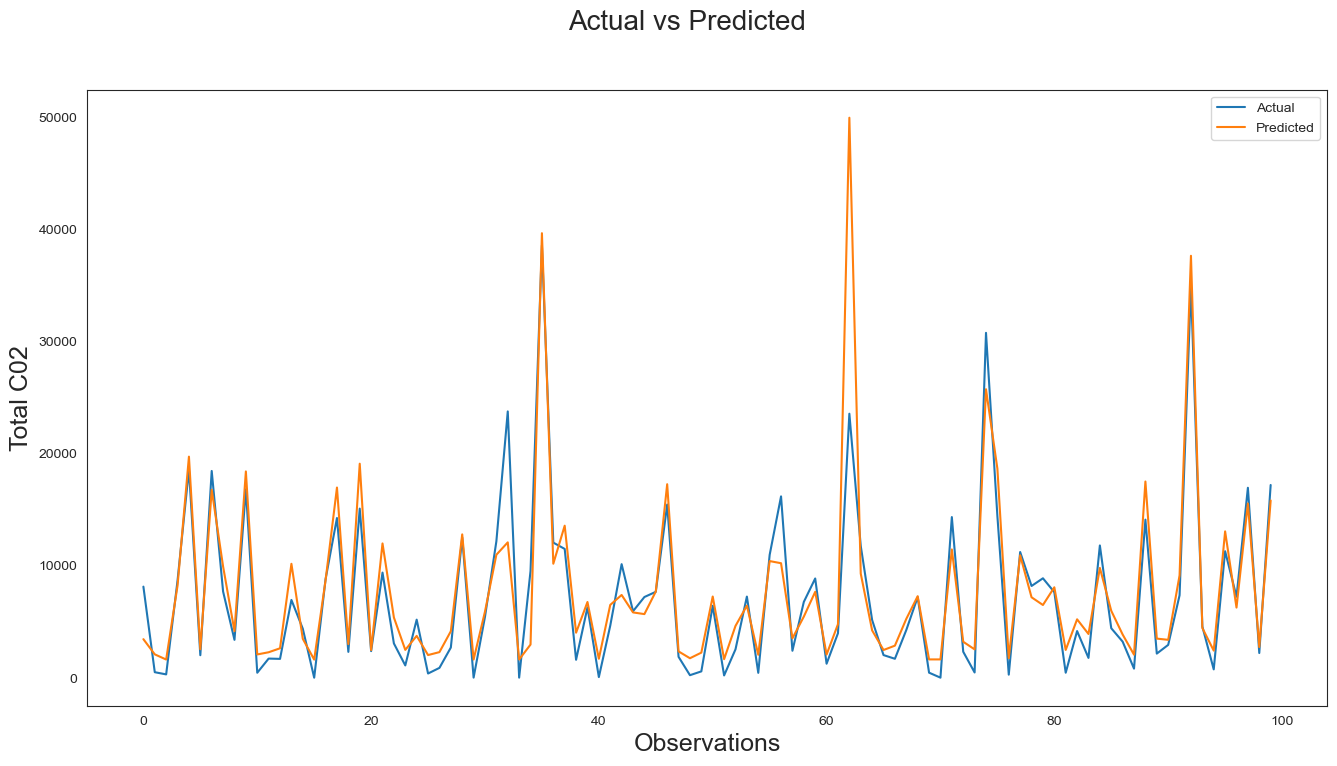

In [158]:
results = pd.DataFrame({'Actual': CO2_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total C02',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

The linear regression model has performed very well as the r2 score = 0.95
the model also not overfitting

#### <font color='green'> 7.2- Random Forest Model

In [159]:
#Building and fitting Random Forest model
efr = RandomForestRegressor(n_estimators=100, random_state=10)

In [160]:
efr.fit(CO2_X_train,CO2_y_train)

RandomForestRegressor(random_state=10)

In [161]:
print(np.round(efr.score(CO2_X_test, CO2_y_test)*100, 1))

90.4


In [162]:
y_predict=efr.predict(CO2_X_test)

In [163]:
result_df= result_df.append(get_performance(efr,'Random Forest Regressor Regression',CO2_X_train.shape[1],'CO2'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.898037       0.955826   
0  Random Forest Regressor Regression        0.968588       0.903506   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.955826  3109.427777            20       CO2  
0  0.903506  4595.661332            20       CO2

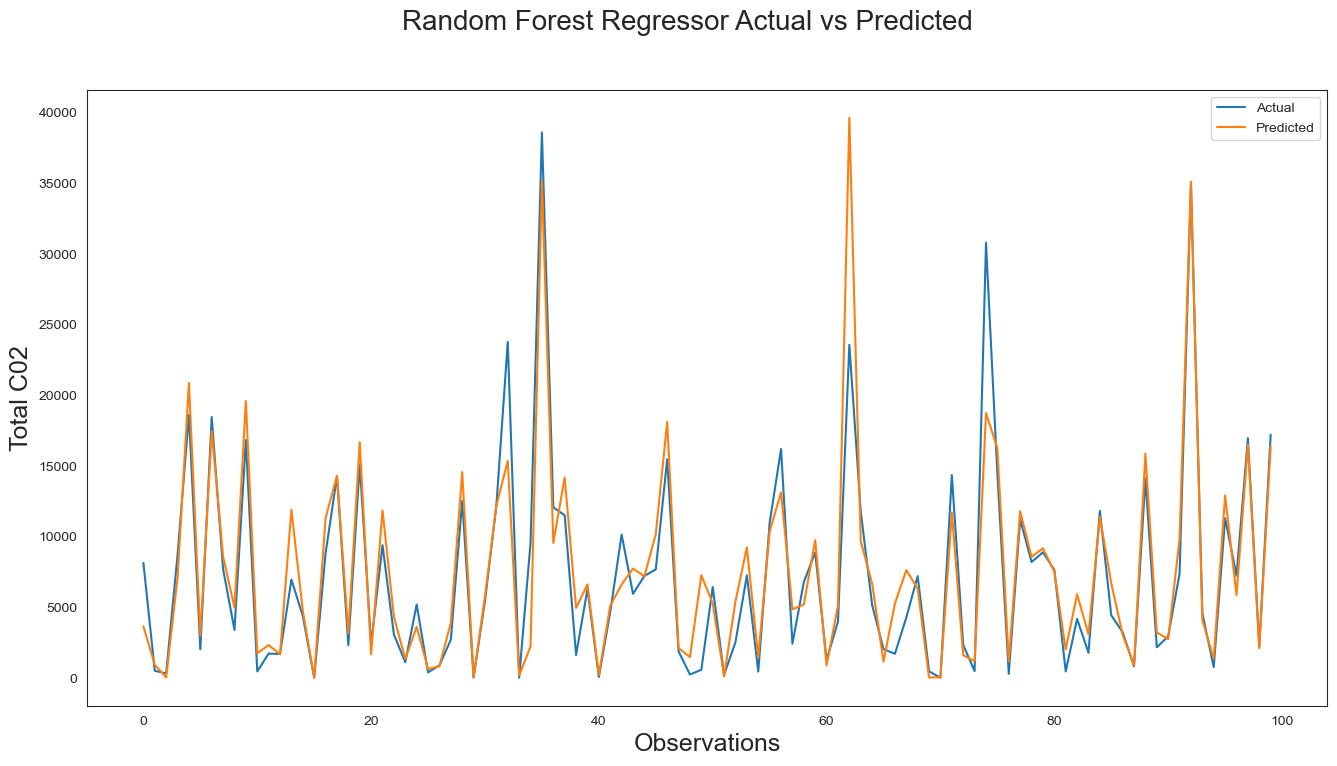

In [164]:
results = pd.DataFrame({'Actual': CO2_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Random Forest Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total C02',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

* Random Forest performing well on CO2 dataset 
* The model testing accuracey =.90
* RF model is overfitting as the training accuracy is higher than the testing accuracy, further analysis is required. 

#### <font color='green'> 7.3- MLP Model

In [166]:
# MLP Regressor


estimator=MLPRegressor()


param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(CO2_X_train, CO2_y_train)


best_params = grid_result.best_params_

MLP_reg_CO2 = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],
                        max_iter= 5000, n_iter_no_change = 200
                           )


MLP_reg_CO2.fit(CO2_X_train,CO2_y_train)

MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=5000,
             n_iter_no_change=200)

In [167]:
MLP_reg_CO2.fit(CO2_X_train,CO2_y_train)

MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=5000,
             n_iter_no_change=200)

In [168]:
print(np.round(MLP_reg_CO2.score(CO2_X_test, CO2_y_test)*100, 1))

88.6


In [169]:
y_predict=MLP_reg_CO2.predict(CO2_X_test)

In [170]:
result_df= result_df.append(get_performance(MLP_reg_CO2,'MLPRegressor',CO2_X_train.shape[1],'CO2'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.898037       0.955826   
0  Random Forest Regressor Regression        0.968588       0.903506   
0                        MLPRegressor        0.934735       0.885875   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.955826  3109.427777            20       CO2  
0  0.903506  4595.661332            20       CO2  
0  0.885875  4997.919185            20       CO2

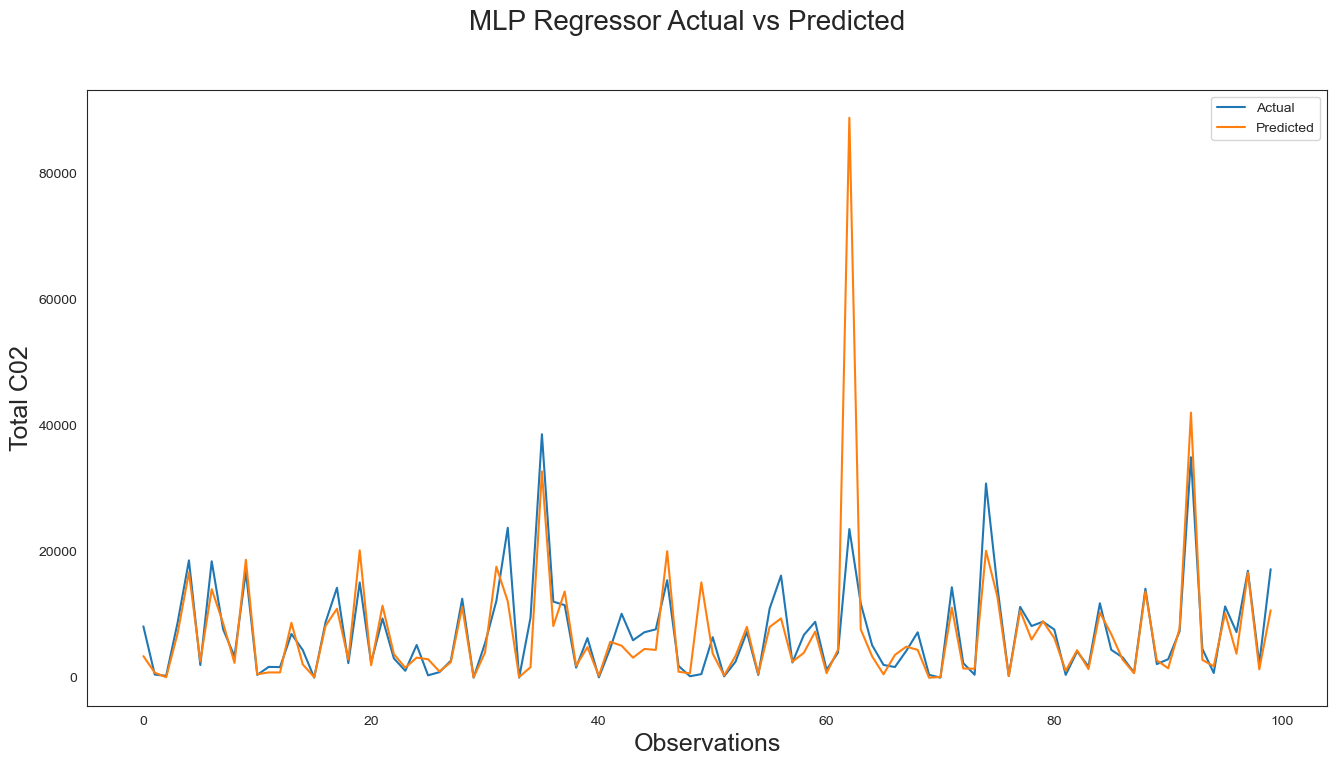

In [171]:
results = pd.DataFrame({'Actual': CO2_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('MLP Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total C02',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

* MLP Regressor performing well on CO2 dataset 
* The model testing accuracey =.93
* MLP Regressor is overfitting as the training accuracy is higher than the testing accuracy, further analysis is required. 

* After applying the three models on CO2 dataset , the best model is Linear Regression Model with Testing score around 95%

### <font color='blue'/> 8- Building the ML Model for NOx

In [172]:
NOx_selected_features = scaled_master_NOx.corr()['total'].nlargest(21).index[1:]
NOx_selected_features

Index(['industry_part_a', 'aviation', 'rigid_hgv', 'petrol_car', 'vkm_rigid',
       'diesel_lgv', 'vkm_motorcycle', 'vkm_coach', 'non-tfl_bus_and_coach',
       'motorcycle', 'vkm_petrolcar', 'vkm_diesellgv', 'vkm_bus',
       'vkm_electriclgv', 'diesel_car', 'tfl_bus', 'vkm_taxi',
       'vkm_electriccar', 'taxi', 'vkm_petrollgv'],
      dtype='object')

In [173]:
X = scaled_master_NOx[NOx_selected_features]
y = scaled_master_NOx['total'].values

In [174]:
NOx_X_train, NOx_X_test, NOx_y_train, NOx_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [175]:
lin_reg_NOx=LinearRegression()
lin_reg_NOx.fit(NOx_X_train,NOx_y_train)

LinearRegression()

In [176]:
print(np.round(lin_reg_NOx.score(NOx_X_test, NOx_y_test)*100, 1))

89.3


In [177]:
y_predict=lin_reg_NOx.predict(NOx_X_test)

In [178]:
# performance
def get_performance_NOx (model_obj,model_name,n,p):
    model=model_obj
    Training_score=model.score(NOx_X_train,NOx_y_train)
    Testing_score=model.score(NOx_X_test,NOx_y_test)
    R2_score=r2_score(NOx_y_test,y_predict)
    RMSE_score=math.sqrt(mean_squared_error(NOx_y_test,y_predict))
    out_put=pd.DataFrame({'Model':[model_name],'Training_score':[Training_score],'Testing_score':[Testing_score],'R2_score':[R2_score],' RMSE_score':[RMSE_score],'Features_Num':[n],'Pollutant' :[p]})
    return out_put


In [179]:
result_df=get_performance_NOx(lin_reg_NOx,'Linear Regression',NOx_X_train.shape[1],'NOx')
result_df

Model  Training_score  Testing_score  R2_score   RMSE_score  \
0  Linear Regression        0.905049       0.893318  0.893318      0.30774   

   Features_Num Pollutant  
0            20       NOx

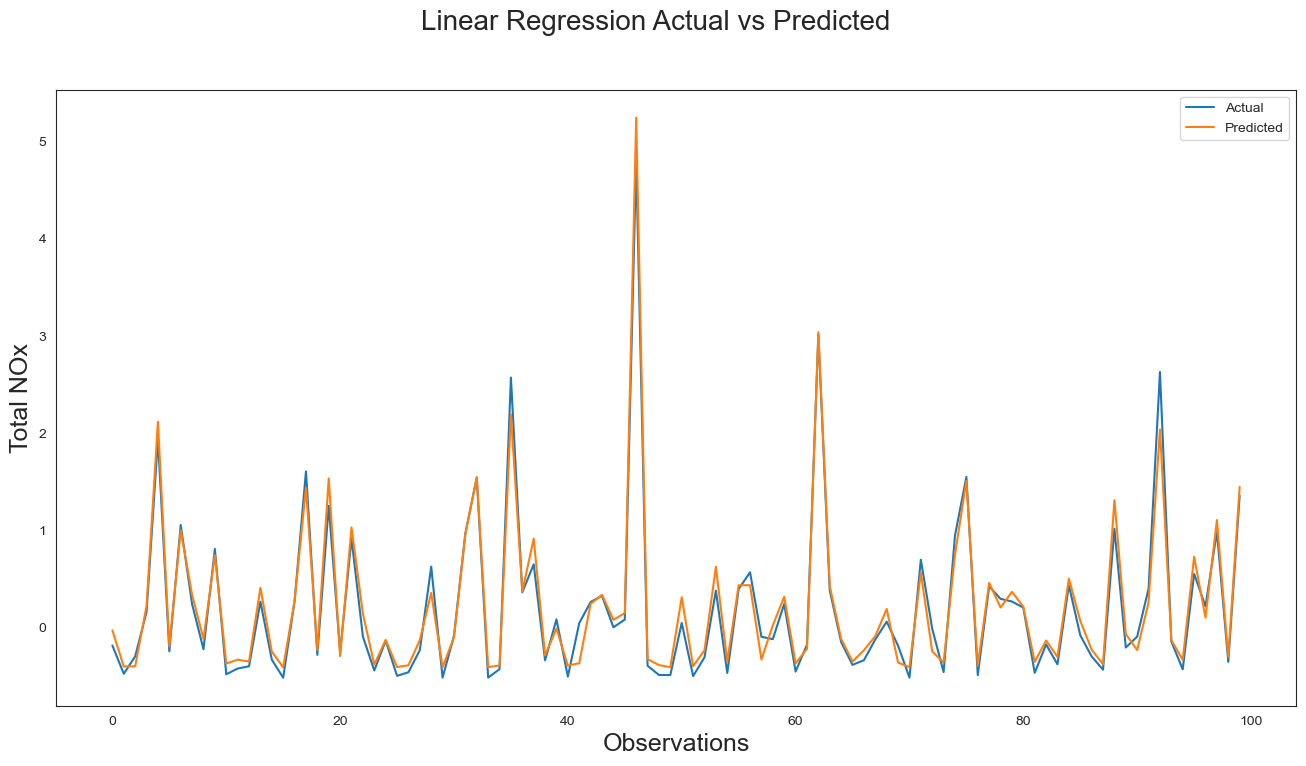

In [180]:
results = pd.DataFrame({'Actual': NOx_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Linear Regression Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total NOx',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

In [181]:
# Random Forest
efr_NOx = RandomForestRegressor(n_estimators=100, random_state=10)
efr_NOx.fit(NOx_X_train,NOx_y_train)

RandomForestRegressor(random_state=10)

In [182]:
print(np.round(efr_NOx.score(NOx_X_test, NOx_y_test)*100, 1))

84.0


In [183]:
y_predict=efr_NOx.predict(NOx_X_test)

In [184]:
result_df= result_df.append(get_performance_NOx(efr_NOx,'Random Forest Regressor Regression',NOx_X_train.shape[1],'NOx'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.905049       0.893318   
0  Random Forest Regressor Regression        0.973286       0.839975   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.893318     0.307740            20       NOx  
0  0.839975     0.376906            20       NOx

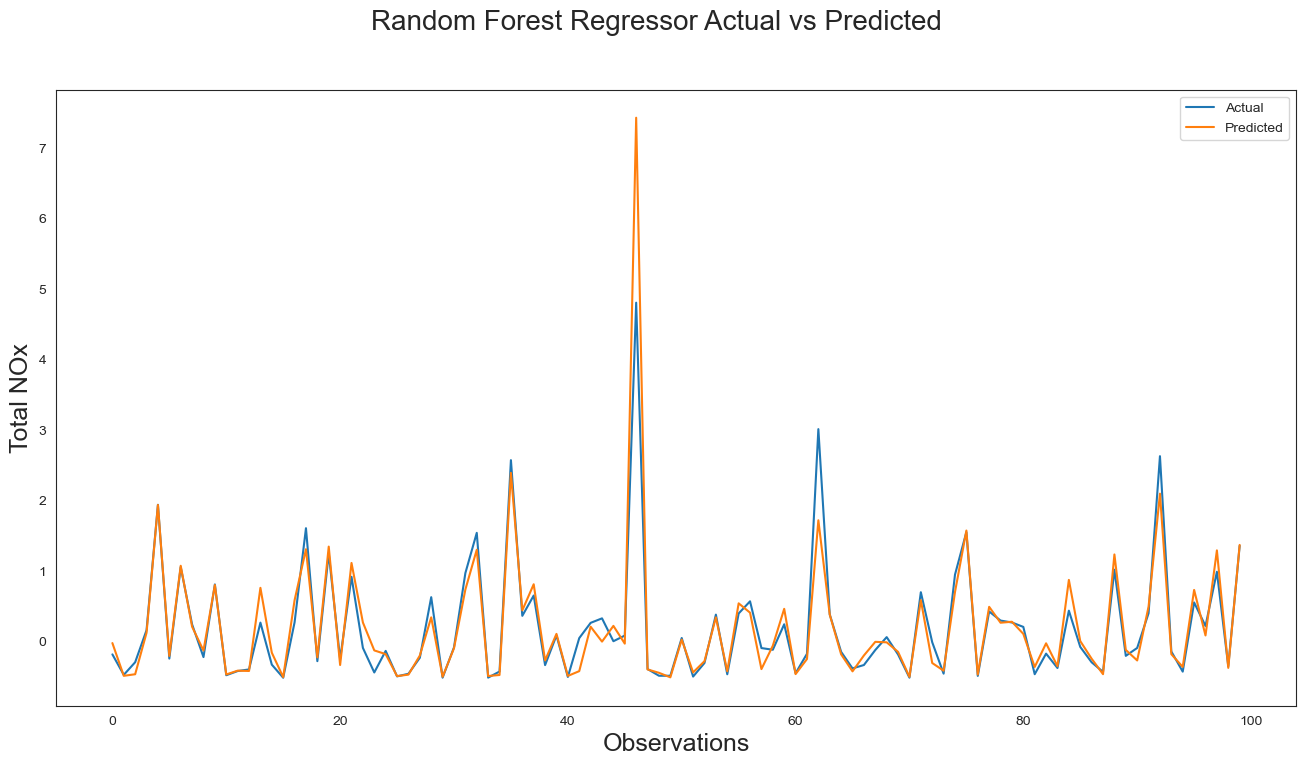

In [185]:
results = pd.DataFrame({'Actual': NOx_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Random Forest Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total NOx',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

In [186]:
# MLP Regressor


estimator=MLPRegressor()


param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(NOx_X_train, NOx_y_train)


best_params = grid_result.best_params_

MLP_reg_NOx = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],
                        max_iter= 5000, n_iter_no_change = 200
                           )


MLP_reg_NOx.fit(NOx_X_train,NOx_y_train)

MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=5000,
             n_iter_no_change=200)

In [187]:
print(np.round(MLP_reg_NOx.score(NOx_X_test, NOx_y_test)*100, 1))

76.3


In [188]:
y_predict=MLP_reg_NOx.predict(NOx_X_test)

In [189]:
result_df= result_df.append(get_performance_NOx(MLP_reg_NOx,'MLP Regressor Regression',NOx_X_train.shape[1],'NOx'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.905049       0.893318   
0  Random Forest Regressor Regression        0.973286       0.839975   
0            MLP Regressor Regression        0.979367       0.763034   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.893318     0.307740            20       NOx  
0  0.839975     0.376906            20       NOx  
0  0.763034     0.458651            20       NOx

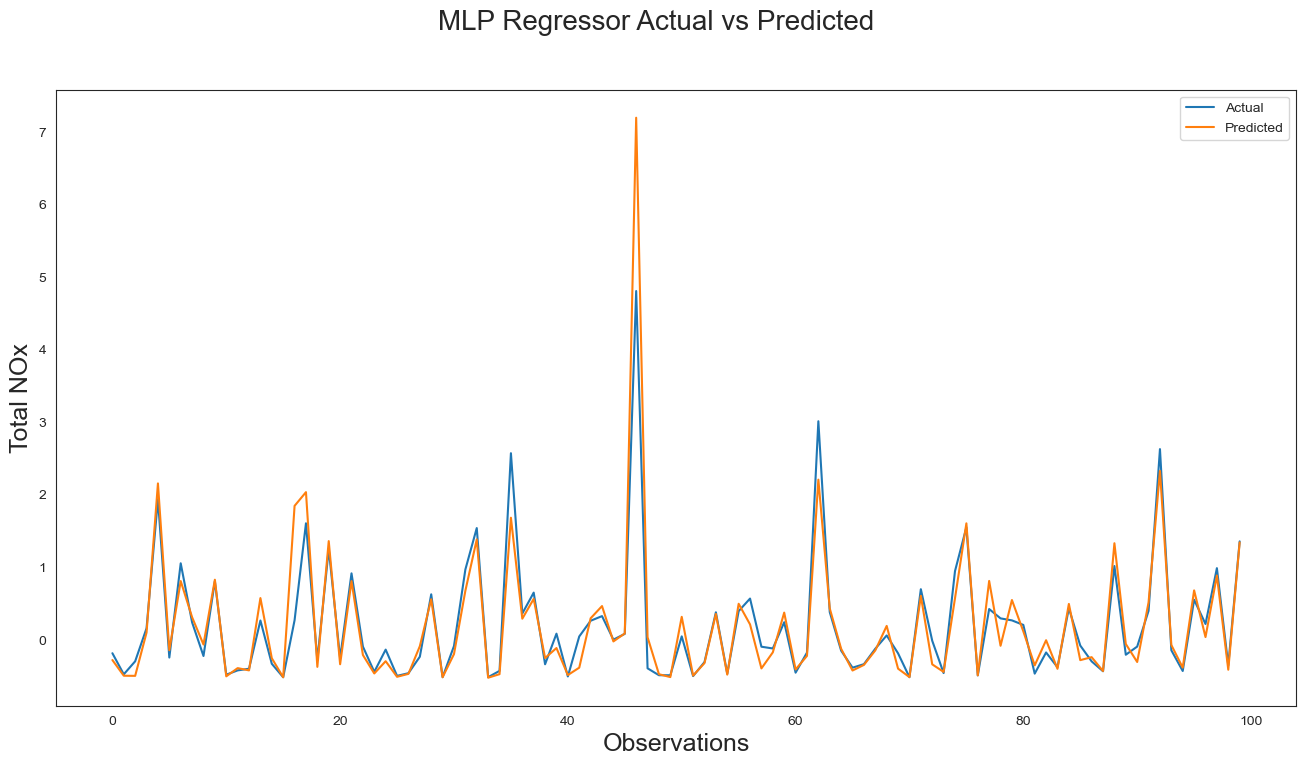

In [190]:
results = pd.DataFrame({'Actual': NOx_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('MLP Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total NOx',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

**Observations:**
    
    * After applying the three models to predict the total emission of NOx pollutant we observed that Linear Regression has the best accuracy score, however the RF and MlP models need more hyper-parameters tweacking to avoid the overfitting.
   

### <font color='blue'/> 9- Building the ML Model for PM10

In [191]:
PM10_selected_features = scaled_master_PM10.corr()['total'].nlargest(21).index[1:]
PM10_selected_features

Index(['diesel_lgv', 'petrol_lgv', 'diesel_car', 'rigid_hgv', 'resuspension',
       'vkm_diesellgv', 'vkm_rigid', 'vkm_petrolcar', 'petrol_car',
       'vkm_petrollgv', 'vkm_dieselcar', 'electric_lgv', 'electric_car',
       'vkm_electriclgv', 'vkm_motorcycle', 'vkm_electriccar', 'vkm_coach',
       'motorcycle', 'non-tfl_bus_and_coach', 'artic_hgv'],
      dtype='object')

In [193]:
X = scaled_master_PM10[PM10_selected_features]
y = scaled_master_PM10['total'].values

In [194]:
PM10_X_train, PM10_X_test, PM10_y_train, PM10_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [195]:
lin_reg_PM10=LinearRegression()
lin_reg_PM10.fit(PM10_X_train,PM10_y_train)

LinearRegression()

In [196]:
y_predict=lin_reg_PM10.predict(PM10_X_test)

In [197]:
# performance
def get_performance_PM10 (model_obj,model_name,n,p):
    model=model_obj
    Training_score=model.score(PM10_X_train,PM10_y_train)
    Testing_score=model.score(PM10_X_test,PM10_y_test)
    R2_score=r2_score(PM10_y_test,y_predict)
    RMSE_score=math.sqrt(mean_squared_error(NOx_y_test,y_predict))
    out_put=pd.DataFrame({'Model':[model_name],'Training_score':[Training_score],'Testing_score':[Testing_score],'R2_score':[R2_score],' RMSE_score':[RMSE_score],'Features_Num':[n],'Pollutant' :[p]})
    return out_put


In [198]:
result_df=get_performance_PM10(lin_reg_PM10,'Linear Regression',PM10_X_train.shape[1],'PM10')
result_df

Model  Training_score  Testing_score  R2_score   RMSE_score  \
0  Linear Regression        0.809253       0.843836  0.843836     0.598308   

   Features_Num Pollutant  
0            20      PM10

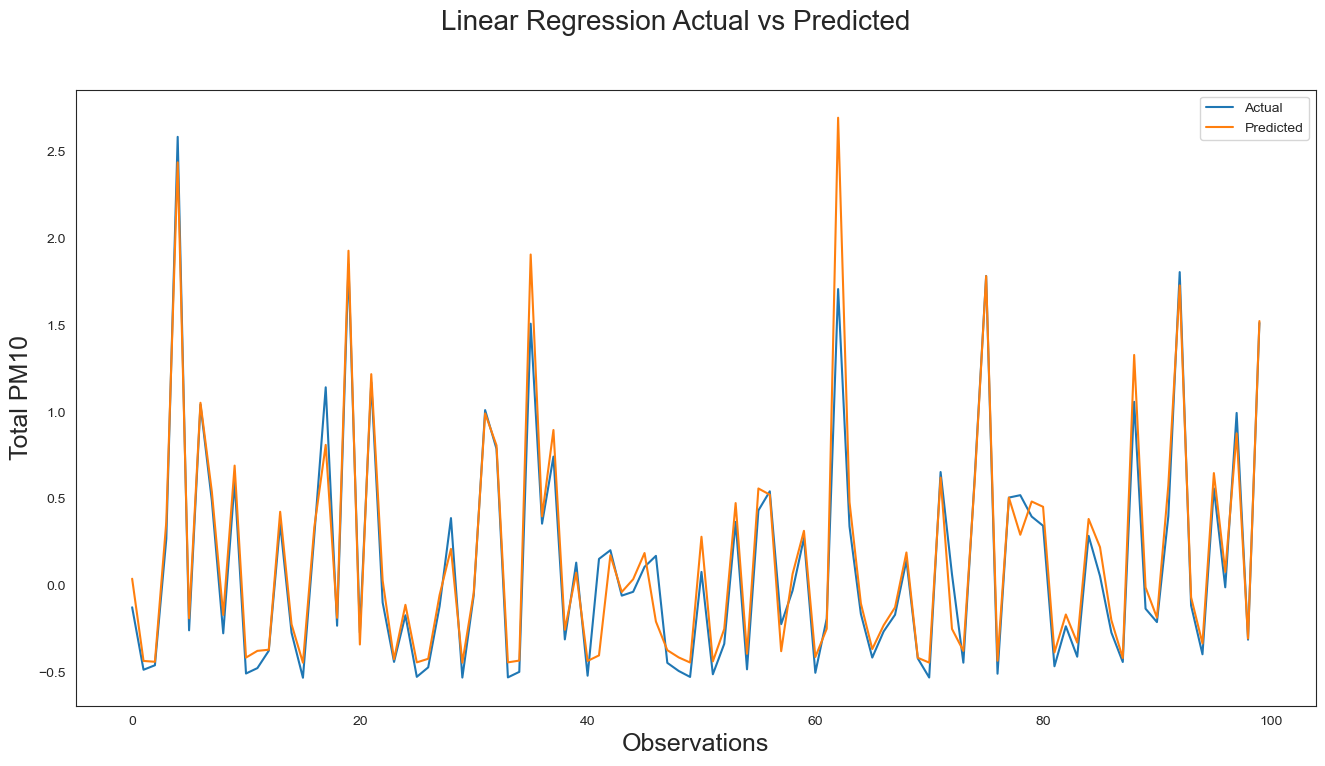

In [199]:
results = pd.DataFrame({'Actual': PM10_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Linear Regression Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total PM10',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

In [200]:
# Random Forest
efr_PM10 = RandomForestRegressor(n_estimators=100, random_state=10)
efr_PM10.fit(PM10_X_train,PM10_y_train)

RandomForestRegressor(random_state=10)

In [201]:
y_predict=efr_PM10.predict(PM10_X_test)


In [202]:
result_df= result_df.append(get_performance_PM10(efr_PM10,'Random Forest Regressor Regression',PM10_X_train.shape[1],'PM10'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.809253       0.843836   
0  Random Forest Regressor Regression        0.972126       0.825639   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.843836     0.598308            20      PM10  
0  0.825639     0.603166            20      PM10

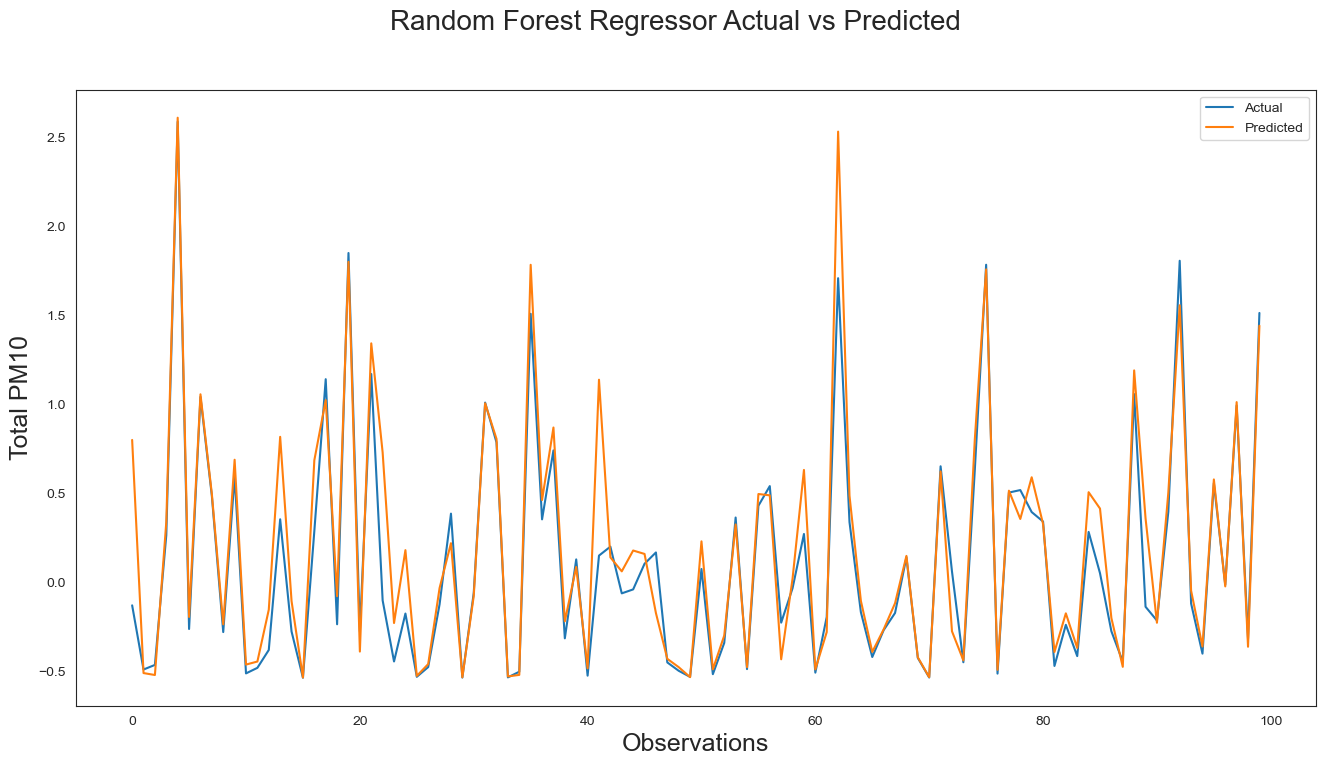

In [203]:
results = pd.DataFrame({'Actual': PM10_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Random Forest Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total PM10',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

In [204]:
# MLP Regressor


estimator=MLPRegressor()


param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(PM10_X_train, PM10_y_train)


best_params = grid_result.best_params_

MLP_reg_PM10 = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],
                        max_iter= 5000, n_iter_no_change = 200
                           )

In [205]:
MLP_reg_PM10.fit(PM10_X_train, PM10_y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 50, 50), max_iter=5000,
             n_iter_no_change=200)

In [206]:
y_predict=MLP_reg_PM10.predict(PM10_X_test)


In [207]:
result_df= result_df.append(get_performance_PM10(MLP_reg_PM10,'MLP Regressor Regression',PM10_X_train.shape[1],'PM10'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.809253       0.843836   
0  Random Forest Regressor Regression        0.972126       0.825639   
0            MLP Regressor Regression        0.981475       0.631165   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.843836     0.598308            20      PM10  
0  0.825639     0.603166            20      PM10  
0  0.631165     0.659577            20      PM10

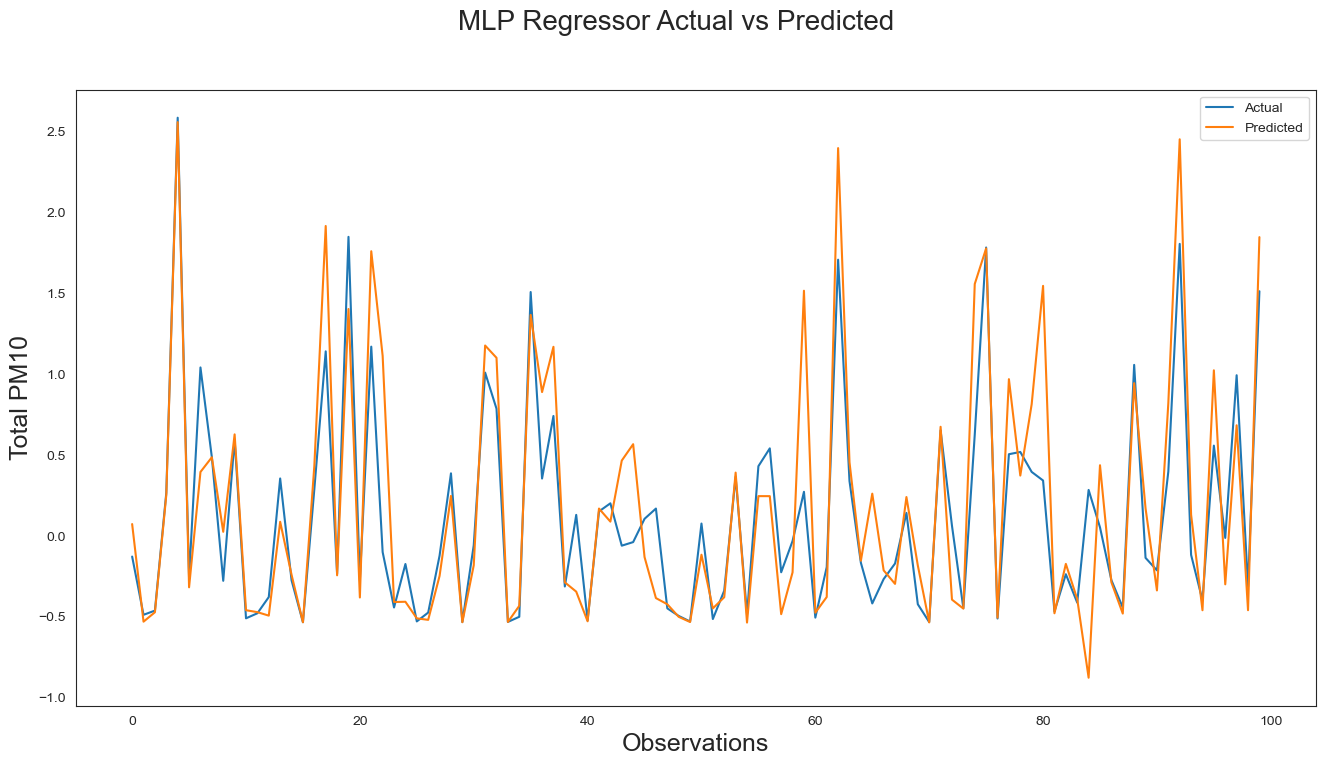

In [208]:
results = pd.DataFrame({'Actual': PM10_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('MLP Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total PM10',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

**Observations:**
    
    * After applying the three models to predict the total emission of PM10 pollutant we observed again that Linear Regression has the best testing accuracy score, however the RF and MlP models are preforming better on training data and they need more hyper-parameters tweacking to avoid the overfitting.
   

### <font color='blue'/> 10- Building the ML Model for PM25


In [209]:
PM25_selected_features = scaled_master_PM25.corr()['total'].nlargest(21).index[1:]
PM25_selected_features

Index(['rigid_hgv', 'diesel_lgv', 'petrol_car', 'petrol_lgv', 'diesel_car',
       'electric_lgv', 'electric_car', 'vkm_petrolcar', 'vkm_diesellgv',
       'vkm_rigid', 'vkm_electriclgv', 'vkm_motorcycle', 'resuspension',
       'motorcycle', 'vkm_electriccar', 'nrmm_construction', 'c&d_dust',
       'vkm_bus', 'vkm_coach', 'small_waste_and_accidental_fires'],
      dtype='object')

In [210]:
X = scaled_master_PM25[PM25_selected_features]
y = scaled_master_PM25['total'].values

In [211]:
PM25_X_train, PM25_X_test, PM25_y_train, PM25_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [212]:
lin_reg_PM25=LinearRegression()
lin_reg_PM25.fit(PM25_X_train,PM25_y_train)

LinearRegression()

In [213]:
y_predict=lin_reg_PM25.predict(PM25_X_test)


In [214]:
# performance
def get_performance_PM25 (model_obj,model_name,n,p):
    model=model_obj
    Training_score=model.score(PM25_X_train,PM25_y_train)
    Testing_score=model.score(PM25_X_test,PM25_y_test)
    R2_score=r2_score(PM25_y_test,y_predict)
    RMSE_score=math.sqrt(mean_squared_error(PM25_y_test,y_predict))
    out_put=pd.DataFrame({'Model':[model_name],'Training_score':[Training_score],'Testing_score':[Testing_score],'R2_score':[R2_score],' RMSE_score':[RMSE_score],'Features_Num':[n],'Pollutant' :[p]})
    return out_put

In [215]:
result_df=get_performance_PM25(lin_reg_PM25,'Linear Regression',PM25_X_train.shape[1],'PM25')
result_df

Model  Training_score  Testing_score  R2_score   RMSE_score  \
0  Linear Regression        0.795163       0.603124  0.603124     0.655872   

   Features_Num Pollutant  
0            20      PM25

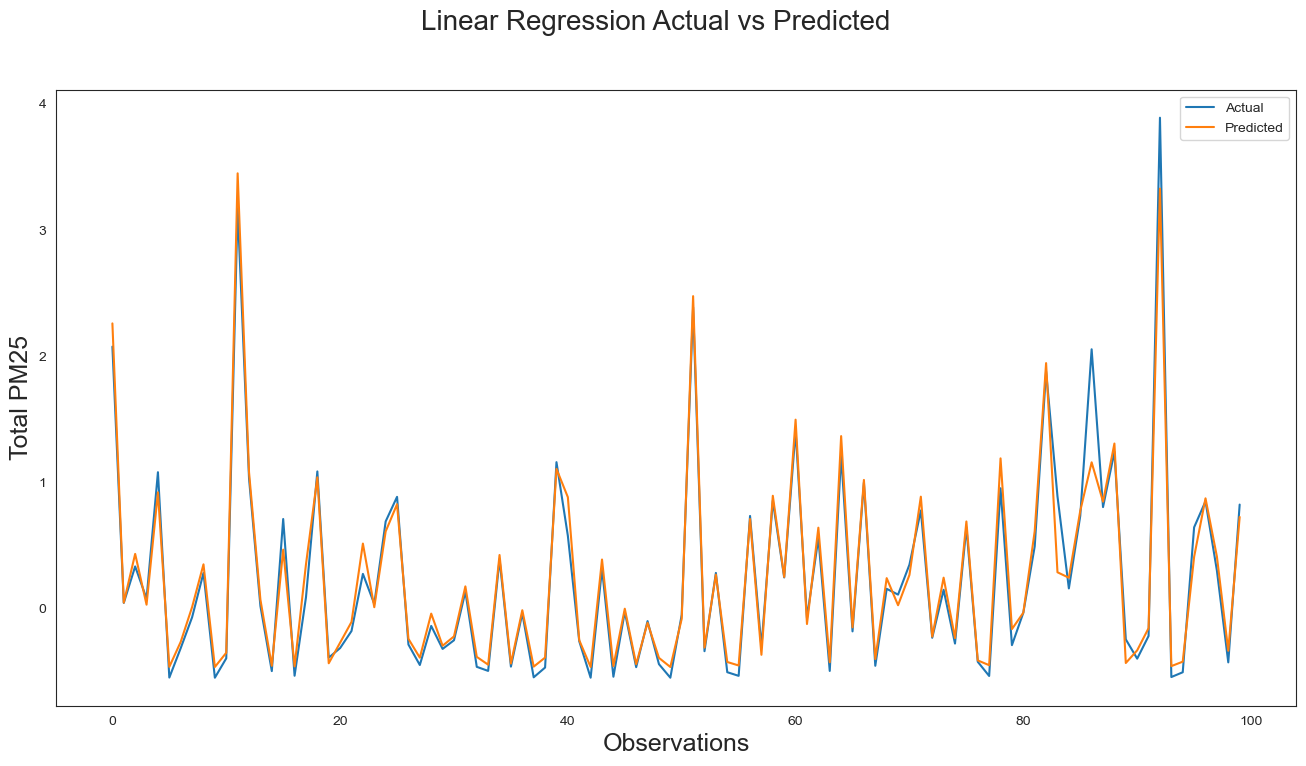

In [216]:
results = pd.DataFrame({'Actual': PM25_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Linear Regression Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total PM25',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

In [217]:
# Random Forest
efr_PM25 = RandomForestRegressor(n_estimators=100, random_state=10)
efr_PM25.fit(PM25_X_train,PM25_y_train)

RandomForestRegressor(random_state=10)

In [218]:
y_predict=efr_PM25.predict(PM25_X_test)

In [219]:
result_df= result_df.append(get_performance_PM25(efr_PM25,'Random Forest Regressor Regression',PM25_X_train.shape[1],'PM25'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.795163       0.603124   
0  Random Forest Regressor Regression        0.964486       0.703932   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.603124     0.655872            20      PM25  
0  0.703932     0.566483            20      PM25

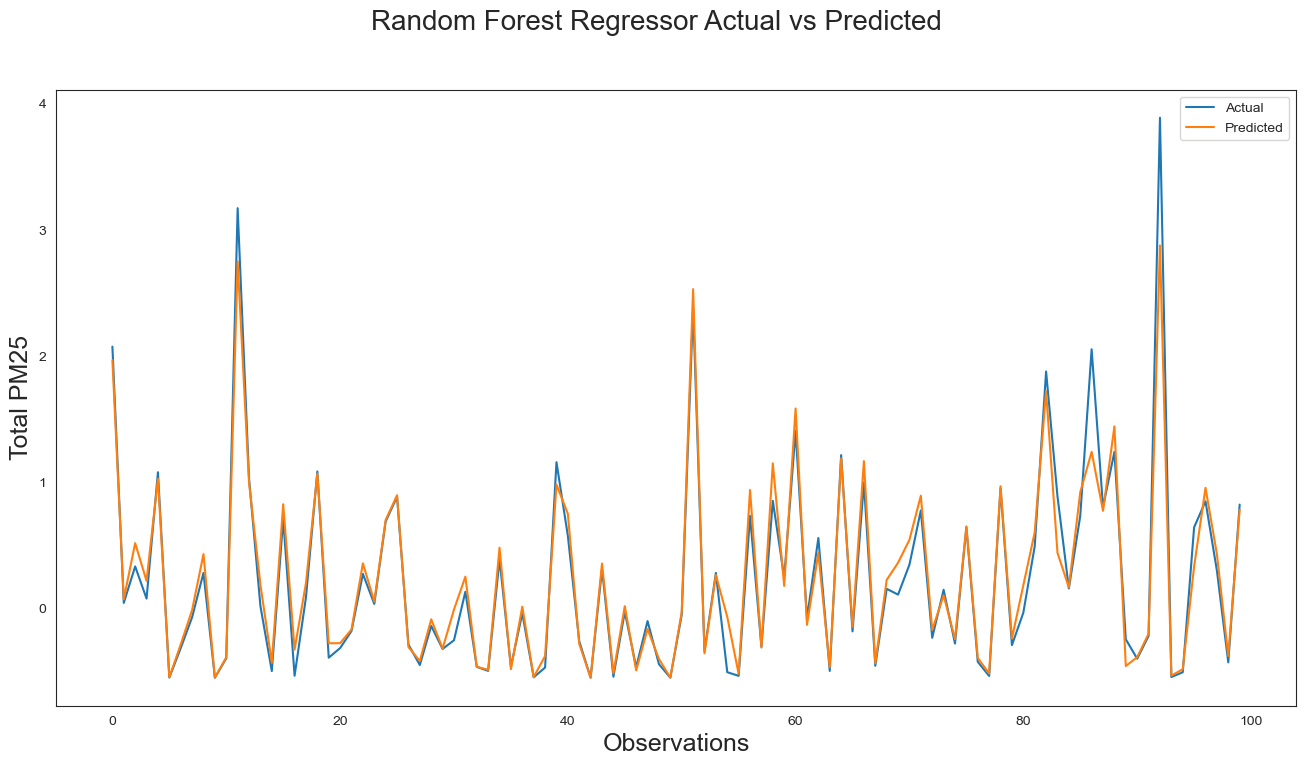

In [220]:
results = pd.DataFrame({'Actual': PM25_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('Random Forest Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total PM25',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

In [221]:
# MLP Regressor


estimator=MLPRegressor()


param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='r2', verbose=0, n_jobs=-1)

grid_result = gsc.fit(PM25_X_train, PM25_y_train)


best_params = grid_result.best_params_

MLP_reg_PM25 = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],
                        max_iter= 5000, n_iter_no_change = 200
                           )

In [222]:
MLP_reg_PM25.fit(PM25_X_train, PM25_y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(50, 50, 50),
             max_iter=5000, n_iter_no_change=200)

In [223]:
y_predict=MLP_reg_PM25.predict(PM25_X_test)

In [224]:
result_df= result_df.append(get_performance_PM25(MLP_reg_PM25,'MLP Regressor Regression',PM25_X_train.shape[1],'PM25'))
result_df

Model  Training_score  Testing_score  \
0                   Linear Regression        0.795163       0.603124   
0  Random Forest Regressor Regression        0.964486       0.703932   
0            MLP Regressor Regression        0.917333       0.716535   

   R2_score   RMSE_score  Features_Num Pollutant  
0  0.603124     0.655872            20      PM25  
0  0.703932     0.566483            20      PM25  
0  0.716535     0.554296            20      PM25

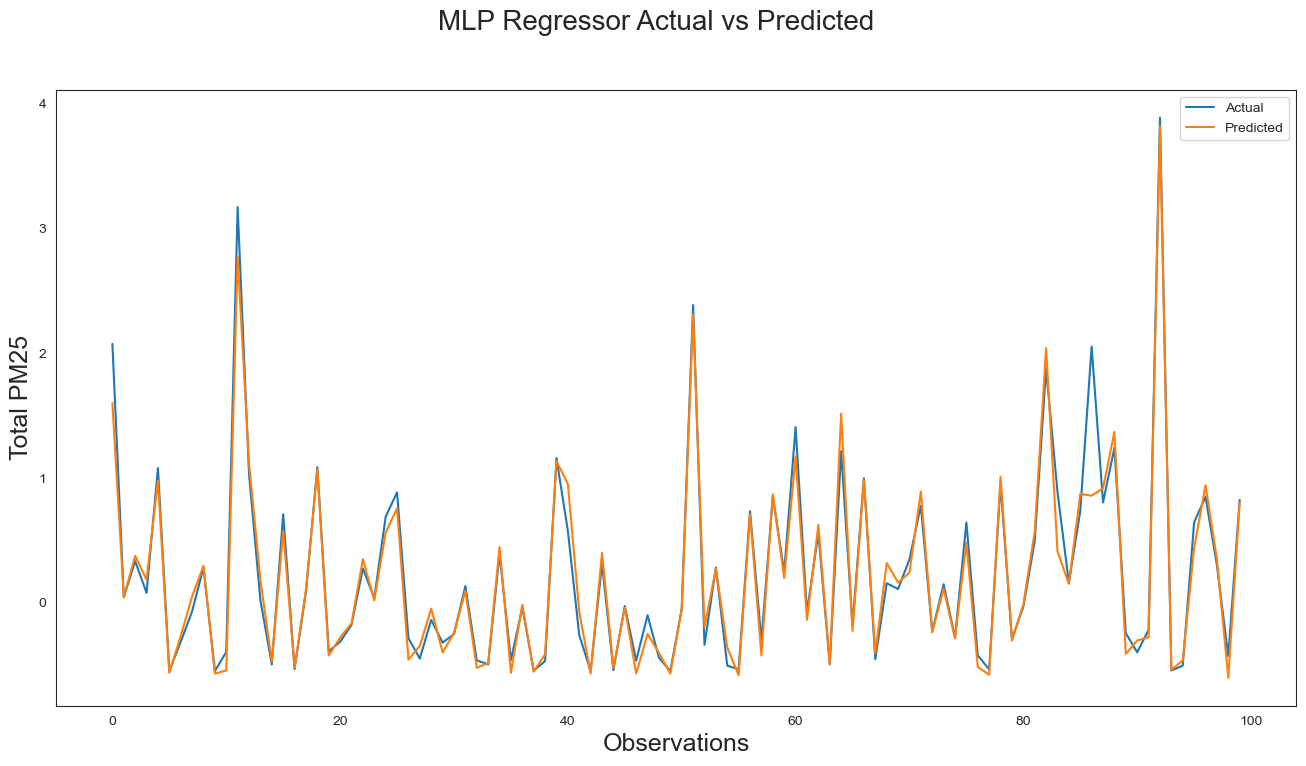

In [225]:
results = pd.DataFrame({'Actual': PM25_y_test, 'Predicted': y_predict})
results = results[:100]

fig = plt.figure(figsize = (16, 8))
plt.plot(results)
plt.suptitle('MLP Regressor Actual vs Predicted', fontsize = 20)
plt.xlabel('Observations',          fontsize = 18)
plt.ylabel('Total PM25',             fontsize = 18)
plt.legend(['Actual', 'Predicted'])

**Observations:**
    
    * After applying the three models to predict the total emission of PM25 pollutant we observed that MLP Regressor has   the best testing accuracy score, however the RF model is performing best on training data.
    
    *The three models are overfitting and need more hyper-parameters tweacking to avoid the overfitting.
   